0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5,1,'EWS5')

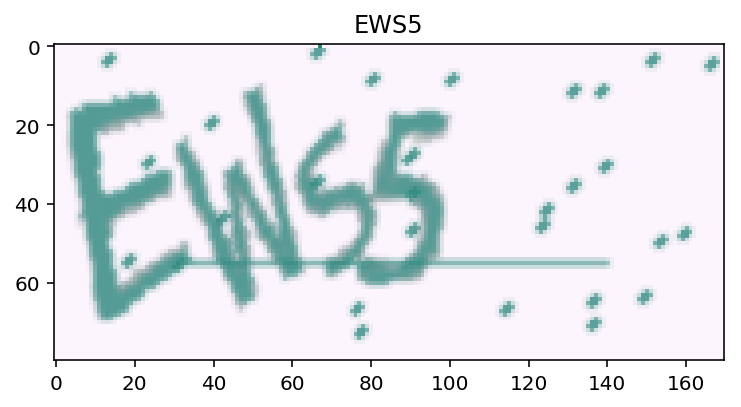

In [70]:
#package requires, captcha for image generate, matplotlib to show the image
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
import pydot
import graphviz

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#using digits and upper case letters
import string
characters = string.digits + string.ascii_uppercase
print(characters)

#define the size of each picture
width, height, n_len, n_class = 170, 80, 4, len(characters)

#trial to generate picture base on the settings
generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

#visualize
plt.imshow(img)
plt.title(random_str)

In [71]:
#able to generate 32 samples at a time
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

Text(0.5,1,'ILEL')

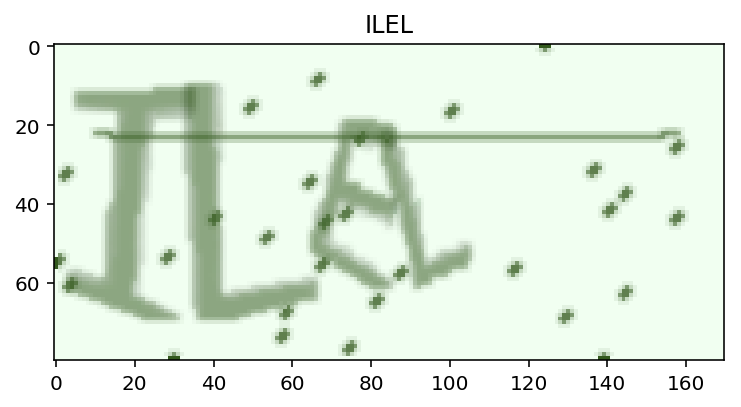

In [72]:
#decode to see the character of the picture
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

X, y = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))

In [79]:
#building CGG16 neural model
from keras.models import *
from keras.layers import *

input_tensor = Input((height, width, 3))
x = input_tensor
for i in range(4):
    x = Conv2D(32*2**i, (3, 3), activation="relu")(x)
    x = Conv2D(32*2**i, (3, 3), activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
model = Model(inputs=input_tensor, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

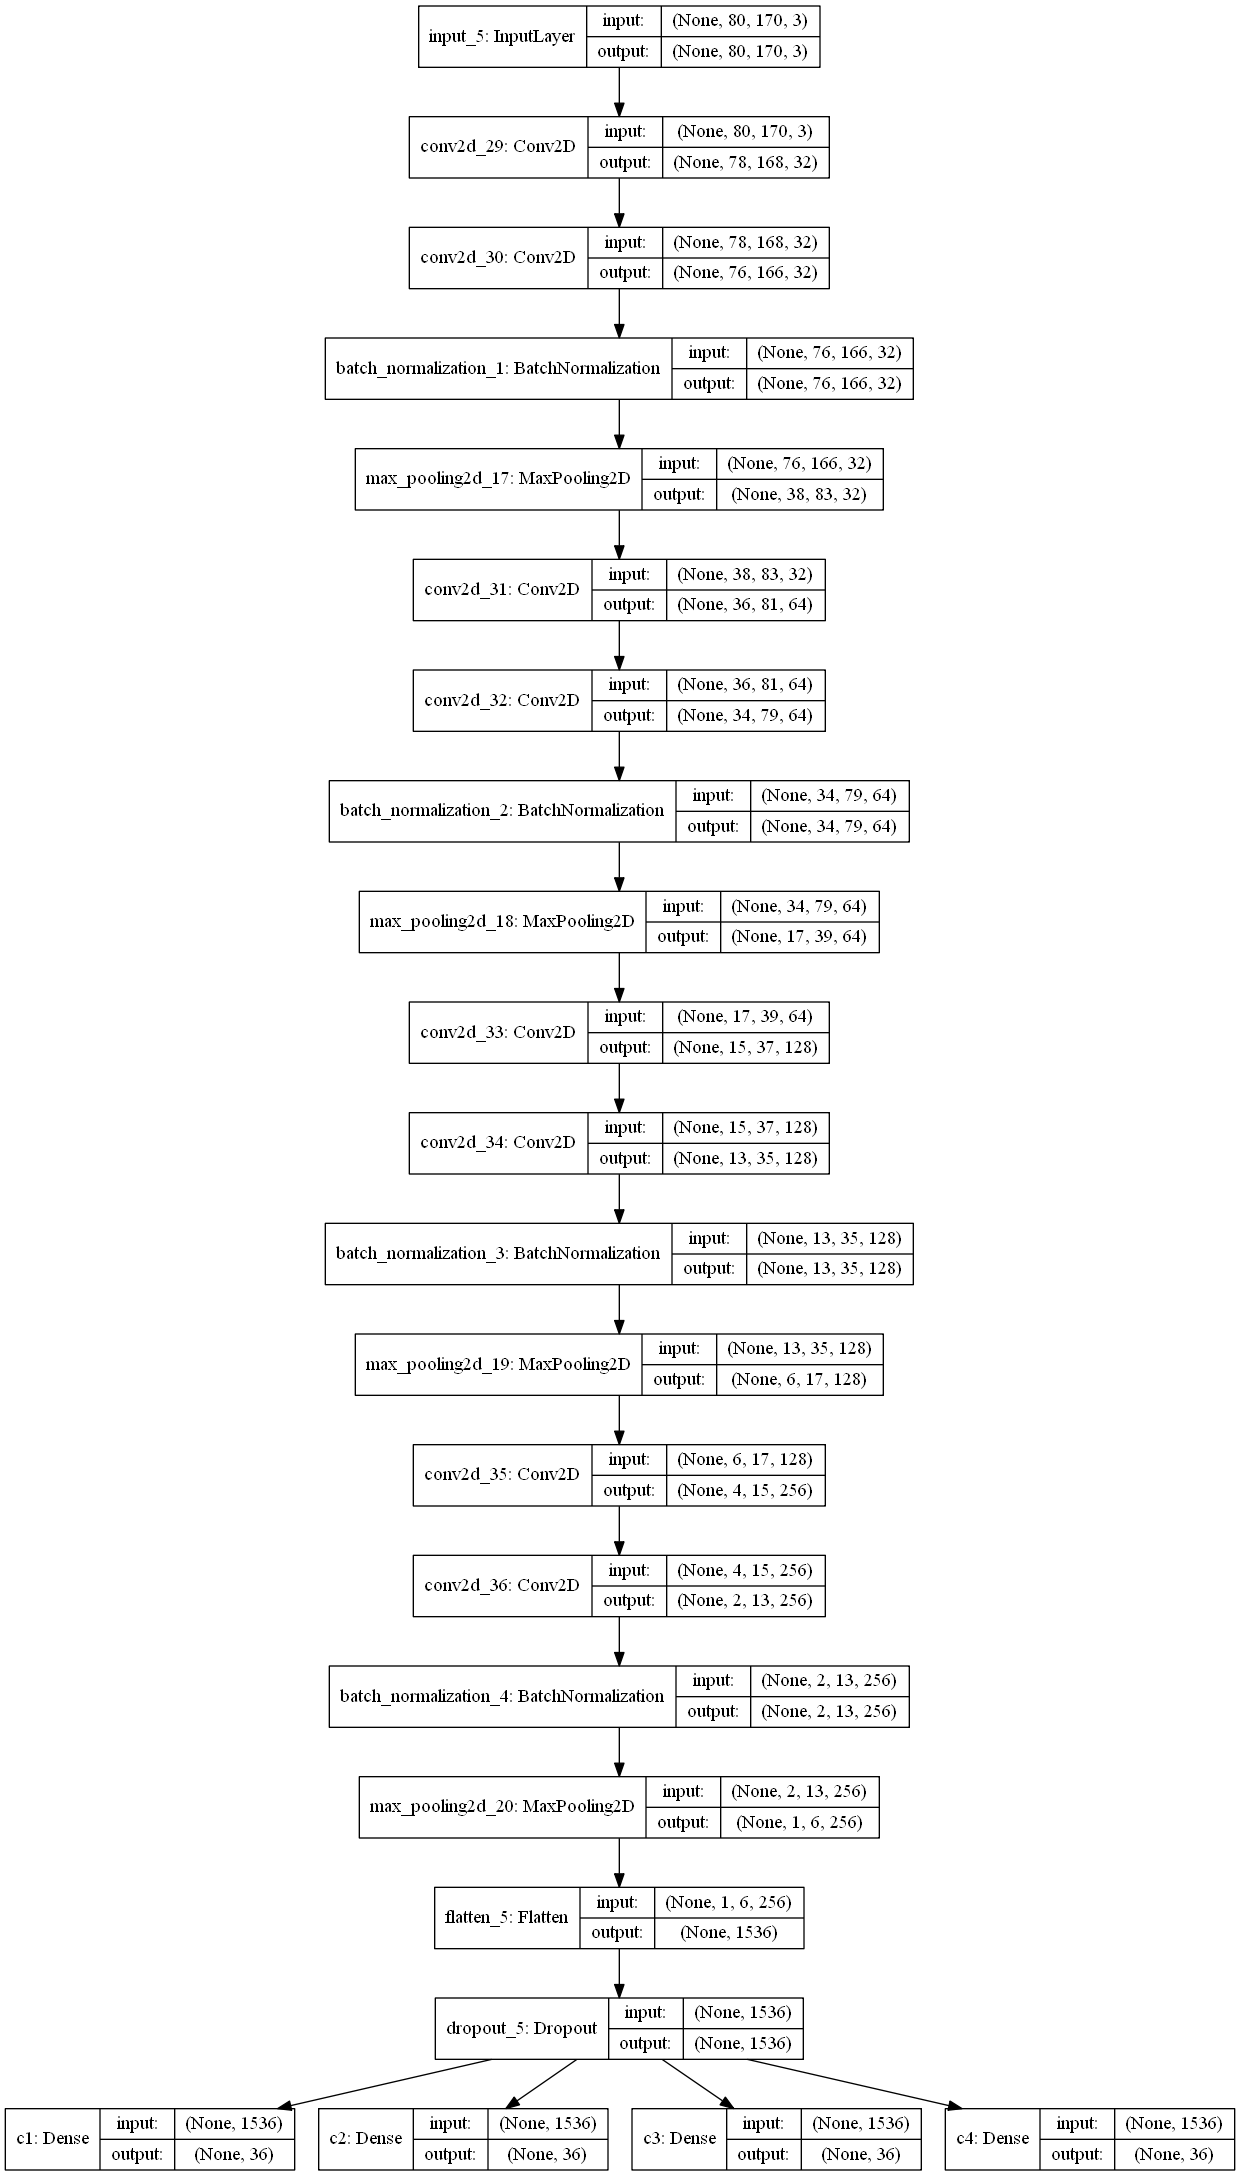

In [80]:
#visualize the architecture of the VGG16 neural network
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True)
Image('model.png')

In [85]:
#train data
model.fit_generator(gen(), steps_per_epoch = 2000, epochs=5, workers = 4,
                    validation_data=gen(), validation_steps=800)

Epoch 1/5


  49/2000 [..............................] - ETA: 2:37:04 - loss: 2.2202 - c1_loss: 0.4406 - c2_loss: 0.3450 - c3_loss: 0.7690 - c4_loss: 0.6655 - c1_acc: 0.9688 - c2_acc: 0.8438 - c3_acc: 0.9062 - c4_acc: 0.90 - ETA: 2:34:46 - loss: 1.6364 - c1_loss: 0.2524 - c2_loss: 0.2165 - c3_loss: 0.7009 - c4_loss: 0.4667 - c1_acc: 0.9688 - c2_acc: 0.9062 - c3_acc: 0.8906 - c4_acc: 0.90 - ETA: 2:32:43 - loss: 1.3666 - c1_loss: 0.2453 - c2_loss: 0.2343 - c3_loss: 0.5386 - c4_loss: 0.3484 - c1_acc: 0.9583 - c2_acc: 0.9167 - c3_acc: 0.8958 - c4_acc: 0.91 - ETA: 2:31:44 - loss: 1.2805 - c1_loss: 0.2341 - c2_loss: 0.1891 - c3_loss: 0.5541 - c4_loss: 0.3032 - c1_acc: 0.9453 - c2_acc: 0.9375 - c3_acc: 0.8906 - c4_acc: 0.92 - ETA: 2:30:56 - loss: 1.1101 - c1_loss: 0.2045 - c2_loss: 0.1618 - c3_loss: 0.4842 - c4_loss: 0.2596 - c1_acc: 0.9500 - c2_acc: 0.9500 - c3_acc: 0.8875 - c4_acc: 0.93 - ETA: 2:30:08 - loss: 0.9938 - c1_loss: 0.1850 - c2_loss: 0.1414 - c3_loss: 0.4423 - c4_loss: 0.2250 - c1_acc: 0.958

 147/2000 [=>............................] - ETA: 2:26:44 - loss: 0.8750 - c1_loss: 0.1702 - c2_loss: 0.1830 - c3_loss: 0.3038 - c4_loss: 0.2181 - c1_acc: 0.9454 - c2_acc: 0.9441 - c3_acc: 0.9148 - c4_acc: 0.93 - ETA: 2:26:44 - loss: 0.8737 - c1_loss: 0.1692 - c2_loss: 0.1821 - c3_loss: 0.3028 - c4_loss: 0.2196 - c1_acc: 0.9456 - c2_acc: 0.9444 - c3_acc: 0.9147 - c4_acc: 0.93 - ETA: 2:26:48 - loss: 0.8761 - c1_loss: 0.1688 - c2_loss: 0.1809 - c3_loss: 0.3051 - c4_loss: 0.2212 - c1_acc: 0.9459 - c2_acc: 0.9446 - c3_acc: 0.9140 - c4_acc: 0.93 - ETA: 2:26:49 - loss: 0.8765 - c1_loss: 0.1677 - c2_loss: 0.1812 - c3_loss: 0.3042 - c4_loss: 0.2234 - c1_acc: 0.9461 - c2_acc: 0.9439 - c3_acc: 0.9136 - c4_acc: 0.93 - ETA: 2:26:52 - loss: 0.8761 - c1_loss: 0.1700 - c2_loss: 0.1802 - c3_loss: 0.3030 - c4_loss: 0.2229 - c1_acc: 0.9460 - c2_acc: 0.9442 - c3_acc: 0.9141 - c4_acc: 0.93 - ETA: 2:26:51 - loss: 0.8731 - c1_loss: 0.1687 - c2_loss: 0.1794 - c3_loss: 0.3031 - c4_loss: 0.2220 - c1_acc: 0.946

 196/2000 [=>............................] - ETA: 2:22:17 - loss: 0.8436 - c1_loss: 0.1599 - c2_loss: 0.1728 - c3_loss: 0.3005 - c4_loss: 0.2104 - c1_acc: 0.9493 - c2_acc: 0.9449 - c3_acc: 0.9141 - c4_acc: 0.93 - ETA: 2:22:11 - loss: 0.8417 - c1_loss: 0.1591 - c2_loss: 0.1727 - c3_loss: 0.2987 - c4_loss: 0.2112 - c1_acc: 0.9497 - c2_acc: 0.9451 - c3_acc: 0.9146 - c4_acc: 0.93 - ETA: 2:22:04 - loss: 0.8441 - c1_loss: 0.1594 - c2_loss: 0.1748 - c3_loss: 0.2985 - c4_loss: 0.2114 - c1_acc: 0.9496 - c2_acc: 0.9448 - c3_acc: 0.9146 - c4_acc: 0.93 - ETA: 2:21:59 - loss: 0.8436 - c1_loss: 0.1586 - c2_loss: 0.1742 - c3_loss: 0.3002 - c4_loss: 0.2106 - c1_acc: 0.9499 - c2_acc: 0.9450 - c3_acc: 0.9145 - c4_acc: 0.94 - ETA: 2:21:52 - loss: 0.8467 - c1_loss: 0.1592 - c2_loss: 0.1752 - c3_loss: 0.3021 - c4_loss: 0.2103 - c1_acc: 0.9498 - c2_acc: 0.9447 - c3_acc: 0.9143 - c4_acc: 0.94 - ETA: 2:21:46 - loss: 0.8446 - c1_loss: 0.1586 - c2_loss: 0.1747 - c3_loss: 0.3016 - c4_loss: 0.2097 - c1_acc: 0.950

 245/2000 [==>...........................] - ETA: 2:17:25 - loss: 0.8154 - c1_loss: 0.1499 - c2_loss: 0.1662 - c3_loss: 0.2960 - c4_loss: 0.2032 - c1_acc: 0.9526 - c2_acc: 0.9465 - c3_acc: 0.9151 - c4_acc: 0.94 - ETA: 2:17:20 - loss: 0.8155 - c1_loss: 0.1500 - c2_loss: 0.1654 - c3_loss: 0.2951 - c4_loss: 0.2050 - c1_acc: 0.9525 - c2_acc: 0.9468 - c3_acc: 0.9152 - c4_acc: 0.94 - ETA: 2:17:15 - loss: 0.8228 - c1_loss: 0.1519 - c2_loss: 0.1667 - c3_loss: 0.2976 - c4_loss: 0.2067 - c1_acc: 0.9521 - c2_acc: 0.9466 - c3_acc: 0.9152 - c4_acc: 0.94 - ETA: 2:17:09 - loss: 0.8317 - c1_loss: 0.1545 - c2_loss: 0.1686 - c3_loss: 0.2990 - c4_loss: 0.2096 - c1_acc: 0.9520 - c2_acc: 0.9464 - c3_acc: 0.9152 - c4_acc: 0.94 - ETA: 2:17:04 - loss: 0.8300 - c1_loss: 0.1538 - c2_loss: 0.1681 - c3_loss: 0.2983 - c4_loss: 0.2098 - c1_acc: 0.9523 - c2_acc: 0.9465 - c3_acc: 0.9153 - c4_acc: 0.94 - ETA: 2:16:59 - loss: 0.8276 - c1_loss: 0.1536 - c2_loss: 0.1674 - c3_loss: 0.2974 - c4_loss: 0.2092 - c1_acc: 0.952

 294/2000 [===>..........................] - ETA: 2:13:09 - loss: 0.8315 - c1_loss: 0.1562 - c2_loss: 0.1671 - c3_loss: 0.2991 - c4_loss: 0.2090 - c1_acc: 0.9508 - c2_acc: 0.9469 - c3_acc: 0.9150 - c4_acc: 0.94 - ETA: 2:13:04 - loss: 0.8325 - c1_loss: 0.1565 - c2_loss: 0.1666 - c3_loss: 0.3004 - c4_loss: 0.2090 - c1_acc: 0.9507 - c2_acc: 0.9470 - c3_acc: 0.9149 - c4_acc: 0.94 - ETA: 2:12:58 - loss: 0.8337 - c1_loss: 0.1561 - c2_loss: 0.1666 - c3_loss: 0.3020 - c4_loss: 0.2089 - c1_acc: 0.9507 - c2_acc: 0.9468 - c3_acc: 0.9146 - c4_acc: 0.93 - ETA: 2:12:53 - loss: 0.8323 - c1_loss: 0.1555 - c2_loss: 0.1667 - c3_loss: 0.3009 - c4_loss: 0.2092 - c1_acc: 0.9509 - c2_acc: 0.9468 - c3_acc: 0.9149 - c4_acc: 0.93 - ETA: 2:12:48 - loss: 0.8308 - c1_loss: 0.1558 - c2_loss: 0.1663 - c3_loss: 0.3002 - c4_loss: 0.2084 - c1_acc: 0.9506 - c2_acc: 0.9469 - c3_acc: 0.9150 - c4_acc: 0.94 - ETA: 2:12:43 - loss: 0.8298 - c1_loss: 0.1558 - c2_loss: 0.1659 - c3_loss: 0.2996 - c4_loss: 0.2084 - c1_acc: 0.950

 343/2000 [====>.........................] - ETA: 2:09:06 - loss: 0.8154 - c1_loss: 0.1562 - c2_loss: 0.1667 - c3_loss: 0.2928 - c4_loss: 0.1996 - c1_acc: 0.9512 - c2_acc: 0.9474 - c3_acc: 0.9150 - c4_acc: 0.94 - ETA: 2:09:01 - loss: 0.8168 - c1_loss: 0.1564 - c2_loss: 0.1669 - c3_loss: 0.2930 - c4_loss: 0.2005 - c1_acc: 0.9511 - c2_acc: 0.9474 - c3_acc: 0.9149 - c4_acc: 0.94 - ETA: 2:08:56 - loss: 0.8169 - c1_loss: 0.1569 - c2_loss: 0.1667 - c3_loss: 0.2924 - c4_loss: 0.2009 - c1_acc: 0.9510 - c2_acc: 0.9476 - c3_acc: 0.9150 - c4_acc: 0.94 - ETA: 2:08:51 - loss: 0.8187 - c1_loss: 0.1570 - c2_loss: 0.1667 - c3_loss: 0.2936 - c4_loss: 0.2014 - c1_acc: 0.9509 - c2_acc: 0.9477 - c3_acc: 0.9147 - c4_acc: 0.94 - ETA: 2:08:47 - loss: 0.8179 - c1_loss: 0.1566 - c2_loss: 0.1663 - c3_loss: 0.2939 - c4_loss: 0.2011 - c1_acc: 0.9511 - c2_acc: 0.9477 - c3_acc: 0.9148 - c4_acc: 0.94 - ETA: 2:08:42 - loss: 0.8200 - c1_loss: 0.1566 - c2_loss: 0.1682 - c3_loss: 0.2938 - c4_loss: 0.2014 - c1_acc: 0.951

 392/2000 [====>.........................] - ETA: 2:05:06 - loss: 0.8185 - c1_loss: 0.1564 - c2_loss: 0.1644 - c3_loss: 0.2946 - c4_loss: 0.2031 - c1_acc: 0.9510 - c2_acc: 0.9489 - c3_acc: 0.9157 - c4_acc: 0.94 - ETA: 2:05:01 - loss: 0.8189 - c1_loss: 0.1567 - c2_loss: 0.1644 - c3_loss: 0.2944 - c4_loss: 0.2034 - c1_acc: 0.9510 - c2_acc: 0.9490 - c3_acc: 0.9157 - c4_acc: 0.94 - ETA: 2:04:56 - loss: 0.8181 - c1_loss: 0.1566 - c2_loss: 0.1641 - c3_loss: 0.2945 - c4_loss: 0.2030 - c1_acc: 0.9510 - c2_acc: 0.9491 - c3_acc: 0.9157 - c4_acc: 0.94 - ETA: 2:04:52 - loss: 0.8213 - c1_loss: 0.1575 - c2_loss: 0.1650 - c3_loss: 0.2956 - c4_loss: 0.2032 - c1_acc: 0.9510 - c2_acc: 0.9491 - c3_acc: 0.9156 - c4_acc: 0.94 - ETA: 2:04:47 - loss: 0.8203 - c1_loss: 0.1571 - c2_loss: 0.1650 - c3_loss: 0.2954 - c4_loss: 0.2028 - c1_acc: 0.9511 - c2_acc: 0.9492 - c3_acc: 0.9158 - c4_acc: 0.94 - ETA: 2:04:42 - loss: 0.8200 - c1_loss: 0.1577 - c2_loss: 0.1646 - c3_loss: 0.2951 - c4_loss: 0.2026 - c1_acc: 0.950

 441/2000 [=====>........................] - ETA: 2:01:16 - loss: 0.8006 - c1_loss: 0.1527 - c2_loss: 0.1608 - c3_loss: 0.2885 - c4_loss: 0.1986 - c1_acc: 0.9519 - c2_acc: 0.9499 - c3_acc: 0.9171 - c4_acc: 0.94 - ETA: 2:01:11 - loss: 0.8007 - c1_loss: 0.1530 - c2_loss: 0.1608 - c3_loss: 0.2887 - c4_loss: 0.1982 - c1_acc: 0.9519 - c2_acc: 0.9498 - c3_acc: 0.9171 - c4_acc: 0.94 - ETA: 2:01:06 - loss: 0.8007 - c1_loss: 0.1528 - c2_loss: 0.1610 - c3_loss: 0.2886 - c4_loss: 0.1984 - c1_acc: 0.9519 - c2_acc: 0.9498 - c3_acc: 0.9170 - c4_acc: 0.94 - ETA: 2:01:01 - loss: 0.7993 - c1_loss: 0.1524 - c2_loss: 0.1608 - c3_loss: 0.2880 - c4_loss: 0.1981 - c1_acc: 0.9520 - c2_acc: 0.9498 - c3_acc: 0.9171 - c4_acc: 0.94 - ETA: 2:00:57 - loss: 0.7986 - c1_loss: 0.1522 - c2_loss: 0.1609 - c3_loss: 0.2877 - c4_loss: 0.1978 - c1_acc: 0.9521 - c2_acc: 0.9498 - c3_acc: 0.9173 - c4_acc: 0.94 - ETA: 2:00:52 - loss: 0.7986 - c1_loss: 0.1521 - c2_loss: 0.1616 - c3_loss: 0.2872 - c4_loss: 0.1976 - c1_acc: 0.952

 490/2000 [======>.......................] - ETA: 1:57:26 - loss: 0.7869 - c1_loss: 0.1485 - c2_loss: 0.1602 - c3_loss: 0.2834 - c4_loss: 0.1949 - c1_acc: 0.9535 - c2_acc: 0.9498 - c3_acc: 0.9186 - c4_acc: 0.94 - ETA: 1:57:21 - loss: 0.7866 - c1_loss: 0.1483 - c2_loss: 0.1607 - c3_loss: 0.2831 - c4_loss: 0.1945 - c1_acc: 0.9536 - c2_acc: 0.9495 - c3_acc: 0.9187 - c4_acc: 0.94 - ETA: 1:57:16 - loss: 0.7884 - c1_loss: 0.1481 - c2_loss: 0.1623 - c3_loss: 0.2832 - c4_loss: 0.1949 - c1_acc: 0.9537 - c2_acc: 0.9492 - c3_acc: 0.9187 - c4_acc: 0.94 - ETA: 1:57:11 - loss: 0.7891 - c1_loss: 0.1487 - c2_loss: 0.1621 - c3_loss: 0.2835 - c4_loss: 0.1949 - c1_acc: 0.9536 - c2_acc: 0.9492 - c3_acc: 0.9186 - c4_acc: 0.94 - ETA: 1:57:07 - loss: 0.7900 - c1_loss: 0.1485 - c2_loss: 0.1628 - c3_loss: 0.2833 - c4_loss: 0.1955 - c1_acc: 0.9537 - c2_acc: 0.9493 - c3_acc: 0.9187 - c4_acc: 0.94 - ETA: 1:57:02 - loss: 0.7895 - c1_loss: 0.1482 - c2_loss: 0.1627 - c3_loss: 0.2829 - c4_loss: 0.1956 - c1_acc: 0.953

 539/2000 [=======>......................] - ETA: 1:54:13 - loss: 0.7899 - c1_loss: 0.1477 - c2_loss: 0.1611 - c3_loss: 0.2841 - c4_loss: 0.1970 - c1_acc: 0.9541 - c2_acc: 0.9504 - c3_acc: 0.9190 - c4_acc: 0.94 - ETA: 1:54:10 - loss: 0.7898 - c1_loss: 0.1477 - c2_loss: 0.1610 - c3_loss: 0.2844 - c4_loss: 0.1967 - c1_acc: 0.9541 - c2_acc: 0.9503 - c3_acc: 0.9190 - c4_acc: 0.94 - ETA: 1:54:06 - loss: 0.7893 - c1_loss: 0.1476 - c2_loss: 0.1610 - c3_loss: 0.2842 - c4_loss: 0.1966 - c1_acc: 0.9542 - c2_acc: 0.9502 - c3_acc: 0.9191 - c4_acc: 0.94 - ETA: 1:54:03 - loss: 0.7884 - c1_loss: 0.1474 - c2_loss: 0.1611 - c3_loss: 0.2837 - c4_loss: 0.1962 - c1_acc: 0.9541 - c2_acc: 0.9503 - c3_acc: 0.9192 - c4_acc: 0.94 - ETA: 1:54:00 - loss: 0.7884 - c1_loss: 0.1473 - c2_loss: 0.1610 - c3_loss: 0.2843 - c4_loss: 0.1959 - c1_acc: 0.9542 - c2_acc: 0.9503 - c3_acc: 0.9192 - c4_acc: 0.94 - ETA: 1:53:57 - loss: 0.7881 - c1_loss: 0.1472 - c2_loss: 0.1610 - c3_loss: 0.2842 - c4_loss: 0.1957 - c1_acc: 0.954

 588/2000 [=======>......................] - ETA: 1:50:39 - loss: 0.7771 - c1_loss: 0.1462 - c2_loss: 0.1579 - c3_loss: 0.2806 - c4_loss: 0.1924 - c1_acc: 0.9539 - c2_acc: 0.9512 - c3_acc: 0.9206 - c4_acc: 0.94 - ETA: 1:50:34 - loss: 0.7773 - c1_loss: 0.1460 - c2_loss: 0.1577 - c3_loss: 0.2812 - c4_loss: 0.1924 - c1_acc: 0.9540 - c2_acc: 0.9512 - c3_acc: 0.9205 - c4_acc: 0.94 - ETA: 1:50:29 - loss: 0.7779 - c1_loss: 0.1458 - c2_loss: 0.1578 - c3_loss: 0.2818 - c4_loss: 0.1925 - c1_acc: 0.9540 - c2_acc: 0.9512 - c3_acc: 0.9204 - c4_acc: 0.94 - ETA: 1:50:24 - loss: 0.7773 - c1_loss: 0.1457 - c2_loss: 0.1576 - c3_loss: 0.2818 - c4_loss: 0.1922 - c1_acc: 0.9540 - c2_acc: 0.9513 - c3_acc: 0.9204 - c4_acc: 0.94 - ETA: 1:50:20 - loss: 0.7773 - c1_loss: 0.1457 - c2_loss: 0.1575 - c3_loss: 0.2817 - c4_loss: 0.1925 - c1_acc: 0.9540 - c2_acc: 0.9513 - c3_acc: 0.9204 - c4_acc: 0.94 - ETA: 1:50:15 - loss: 0.7771 - c1_loss: 0.1455 - c2_loss: 0.1577 - c3_loss: 0.2813 - c4_loss: 0.1927 - c1_acc: 0.954

 637/2000 [========>.....................] - ETA: 1:46:46 - loss: 0.7749 - c1_loss: 0.1451 - c2_loss: 0.1572 - c3_loss: 0.2824 - c4_loss: 0.1903 - c1_acc: 0.9541 - c2_acc: 0.9513 - c3_acc: 0.9208 - c4_acc: 0.94 - ETA: 1:46:41 - loss: 0.7746 - c1_loss: 0.1452 - c2_loss: 0.1570 - c3_loss: 0.2823 - c4_loss: 0.1901 - c1_acc: 0.9540 - c2_acc: 0.9514 - c3_acc: 0.9208 - c4_acc: 0.94 - ETA: 1:46:37 - loss: 0.7750 - c1_loss: 0.1453 - c2_loss: 0.1568 - c3_loss: 0.2826 - c4_loss: 0.1903 - c1_acc: 0.9539 - c2_acc: 0.9514 - c3_acc: 0.9208 - c4_acc: 0.94 - ETA: 1:46:32 - loss: 0.7752 - c1_loss: 0.1456 - c2_loss: 0.1570 - c3_loss: 0.2823 - c4_loss: 0.1903 - c1_acc: 0.9538 - c2_acc: 0.9513 - c3_acc: 0.9208 - c4_acc: 0.94 - ETA: 1:46:27 - loss: 0.7756 - c1_loss: 0.1454 - c2_loss: 0.1574 - c3_loss: 0.2826 - c4_loss: 0.1903 - c1_acc: 0.9539 - c2_acc: 0.9513 - c3_acc: 0.9207 - c4_acc: 0.94 - ETA: 1:46:22 - loss: 0.7751 - c1_loss: 0.1453 - c2_loss: 0.1572 - c3_loss: 0.2825 - c4_loss: 0.1901 - c1_acc: 0.953

 686/2000 [=========>....................] - ETA: 1:42:56 - loss: 0.7771 - c1_loss: 0.1432 - c2_loss: 0.1578 - c3_loss: 0.2839 - c4_loss: 0.1922 - c1_acc: 0.9545 - c2_acc: 0.9509 - c3_acc: 0.9202 - c4_acc: 0.94 - ETA: 1:42:51 - loss: 0.7764 - c1_loss: 0.1431 - c2_loss: 0.1577 - c3_loss: 0.2836 - c4_loss: 0.1921 - c1_acc: 0.9545 - c2_acc: 0.9509 - c3_acc: 0.9202 - c4_acc: 0.94 - ETA: 1:42:46 - loss: 0.7756 - c1_loss: 0.1430 - c2_loss: 0.1575 - c3_loss: 0.2832 - c4_loss: 0.1918 - c1_acc: 0.9545 - c2_acc: 0.9510 - c3_acc: 0.9203 - c4_acc: 0.94 - ETA: 1:42:42 - loss: 0.7767 - c1_loss: 0.1439 - c2_loss: 0.1582 - c3_loss: 0.2829 - c4_loss: 0.1917 - c1_acc: 0.9544 - c2_acc: 0.9509 - c3_acc: 0.9203 - c4_acc: 0.94 - ETA: 1:42:37 - loss: 0.7762 - c1_loss: 0.1438 - c2_loss: 0.1582 - c3_loss: 0.2827 - c4_loss: 0.1915 - c1_acc: 0.9544 - c2_acc: 0.9508 - c3_acc: 0.9204 - c4_acc: 0.94 - ETA: 1:42:32 - loss: 0.7755 - c1_loss: 0.1436 - c2_loss: 0.1582 - c3_loss: 0.2823 - c4_loss: 0.1914 - c1_acc: 0.954

 735/2000 [==========>...................] - ETA: 1:39:07 - loss: 0.7657 - c1_loss: 0.1426 - c2_loss: 0.1565 - c3_loss: 0.2790 - c4_loss: 0.1876 - c1_acc: 0.9546 - c2_acc: 0.9516 - c3_acc: 0.9212 - c4_acc: 0.94 - ETA: 1:39:02 - loss: 0.7658 - c1_loss: 0.1426 - c2_loss: 0.1564 - c3_loss: 0.2792 - c4_loss: 0.1877 - c1_acc: 0.9546 - c2_acc: 0.9516 - c3_acc: 0.9211 - c4_acc: 0.94 - ETA: 1:38:58 - loss: 0.7656 - c1_loss: 0.1424 - c2_loss: 0.1565 - c3_loss: 0.2792 - c4_loss: 0.1876 - c1_acc: 0.9546 - c2_acc: 0.9516 - c3_acc: 0.9210 - c4_acc: 0.94 - ETA: 1:38:53 - loss: 0.7661 - c1_loss: 0.1427 - c2_loss: 0.1568 - c3_loss: 0.2792 - c4_loss: 0.1874 - c1_acc: 0.9546 - c2_acc: 0.9515 - c3_acc: 0.9211 - c4_acc: 0.94 - ETA: 1:38:49 - loss: 0.7659 - c1_loss: 0.1427 - c2_loss: 0.1567 - c3_loss: 0.2792 - c4_loss: 0.1874 - c1_acc: 0.9546 - c2_acc: 0.9516 - c3_acc: 0.9211 - c4_acc: 0.94 - ETA: 1:38:44 - loss: 0.7655 - c1_loss: 0.1426 - c2_loss: 0.1566 - c3_loss: 0.2791 - c4_loss: 0.1873 - c1_acc: 0.954

 784/2000 [==========>...................] - ETA: 1:35:21 - loss: 0.7621 - c1_loss: 0.1432 - c2_loss: 0.1565 - c3_loss: 0.2757 - c4_loss: 0.1867 - c1_acc: 0.9544 - c2_acc: 0.9517 - c3_acc: 0.9219 - c4_acc: 0.94 - ETA: 1:35:16 - loss: 0.7618 - c1_loss: 0.1433 - c2_loss: 0.1564 - c3_loss: 0.2756 - c4_loss: 0.1865 - c1_acc: 0.9543 - c2_acc: 0.9517 - c3_acc: 0.9219 - c4_acc: 0.94 - ETA: 1:35:11 - loss: 0.7618 - c1_loss: 0.1433 - c2_loss: 0.1564 - c3_loss: 0.2757 - c4_loss: 0.1863 - c1_acc: 0.9543 - c2_acc: 0.9517 - c3_acc: 0.9218 - c4_acc: 0.94 - ETA: 1:35:07 - loss: 0.7616 - c1_loss: 0.1432 - c2_loss: 0.1563 - c3_loss: 0.2758 - c4_loss: 0.1864 - c1_acc: 0.9543 - c2_acc: 0.9518 - c3_acc: 0.9218 - c4_acc: 0.94 - ETA: 1:35:02 - loss: 0.7611 - c1_loss: 0.1430 - c2_loss: 0.1562 - c3_loss: 0.2757 - c4_loss: 0.1862 - c1_acc: 0.9543 - c2_acc: 0.9517 - c3_acc: 0.9218 - c4_acc: 0.94 - ETA: 1:34:58 - loss: 0.7609 - c1_loss: 0.1431 - c2_loss: 0.1561 - c3_loss: 0.2757 - c4_loss: 0.1859 - c1_acc: 0.954

 833/2000 [===========>..................] - ETA: 1:31:35 - loss: 0.7576 - c1_loss: 0.1441 - c2_loss: 0.1547 - c3_loss: 0.2743 - c4_loss: 0.1846 - c1_acc: 0.9546 - c2_acc: 0.9523 - c3_acc: 0.9227 - c4_acc: 0.94 - ETA: 1:31:30 - loss: 0.7570 - c1_loss: 0.1440 - c2_loss: 0.1546 - c3_loss: 0.2740 - c4_loss: 0.1844 - c1_acc: 0.9546 - c2_acc: 0.9523 - c3_acc: 0.9228 - c4_acc: 0.94 - ETA: 1:31:27 - loss: 0.7569 - c1_loss: 0.1439 - c2_loss: 0.1546 - c3_loss: 0.2742 - c4_loss: 0.1842 - c1_acc: 0.9547 - c2_acc: 0.9523 - c3_acc: 0.9227 - c4_acc: 0.94 - ETA: 1:31:22 - loss: 0.7570 - c1_loss: 0.1440 - c2_loss: 0.1545 - c3_loss: 0.2743 - c4_loss: 0.1842 - c1_acc: 0.9546 - c2_acc: 0.9523 - c3_acc: 0.9228 - c4_acc: 0.94 - ETA: 1:31:17 - loss: 0.7570 - c1_loss: 0.1439 - c2_loss: 0.1547 - c3_loss: 0.2742 - c4_loss: 0.1841 - c1_acc: 0.9546 - c2_acc: 0.9522 - c3_acc: 0.9228 - c4_acc: 0.94 - ETA: 1:31:13 - loss: 0.7564 - c1_loss: 0.1439 - c2_loss: 0.1545 - c3_loss: 0.2740 - c4_loss: 0.1840 - c1_acc: 0.954

 882/2000 [============>.................] - ETA: 1:27:51 - loss: 0.7527 - c1_loss: 0.1451 - c2_loss: 0.1543 - c3_loss: 0.2697 - c4_loss: 0.1836 - c1_acc: 0.9546 - c2_acc: 0.9526 - c3_acc: 0.9237 - c4_acc: 0.94 - ETA: 1:27:46 - loss: 0.7525 - c1_loss: 0.1451 - c2_loss: 0.1542 - c3_loss: 0.2696 - c4_loss: 0.1837 - c1_acc: 0.9546 - c2_acc: 0.9526 - c3_acc: 0.9238 - c4_acc: 0.94 - ETA: 1:27:42 - loss: 0.7527 - c1_loss: 0.1452 - c2_loss: 0.1541 - c3_loss: 0.2698 - c4_loss: 0.1837 - c1_acc: 0.9546 - c2_acc: 0.9526 - c3_acc: 0.9238 - c4_acc: 0.94 - ETA: 1:27:37 - loss: 0.7526 - c1_loss: 0.1451 - c2_loss: 0.1539 - c3_loss: 0.2699 - c4_loss: 0.1837 - c1_acc: 0.9546 - c2_acc: 0.9527 - c3_acc: 0.9238 - c4_acc: 0.94 - ETA: 1:27:32 - loss: 0.7526 - c1_loss: 0.1454 - c2_loss: 0.1538 - c3_loss: 0.2698 - c4_loss: 0.1836 - c1_acc: 0.9546 - c2_acc: 0.9527 - c3_acc: 0.9238 - c4_acc: 0.94 - ETA: 1:27:28 - loss: 0.7531 - c1_loss: 0.1459 - c2_loss: 0.1538 - c3_loss: 0.2698 - c4_loss: 0.1836 - c1_acc: 0.954

 931/2000 [============>.................] - ETA: 1:24:16 - loss: 0.7528 - c1_loss: 0.1469 - c2_loss: 0.1524 - c3_loss: 0.2703 - c4_loss: 0.1833 - c1_acc: 0.9545 - c2_acc: 0.9529 - c3_acc: 0.9239 - c4_acc: 0.94 - ETA: 1:24:12 - loss: 0.7525 - c1_loss: 0.1467 - c2_loss: 0.1525 - c3_loss: 0.2700 - c4_loss: 0.1833 - c1_acc: 0.9545 - c2_acc: 0.9529 - c3_acc: 0.9240 - c4_acc: 0.94 - ETA: 1:24:08 - loss: 0.7522 - c1_loss: 0.1469 - c2_loss: 0.1524 - c3_loss: 0.2697 - c4_loss: 0.1832 - c1_acc: 0.9544 - c2_acc: 0.9529 - c3_acc: 0.9241 - c4_acc: 0.94 - ETA: 1:24:04 - loss: 0.7524 - c1_loss: 0.1470 - c2_loss: 0.1523 - c3_loss: 0.2698 - c4_loss: 0.1833 - c1_acc: 0.9544 - c2_acc: 0.9529 - c3_acc: 0.9241 - c4_acc: 0.94 - ETA: 1:24:00 - loss: 0.7522 - c1_loss: 0.1470 - c2_loss: 0.1523 - c3_loss: 0.2695 - c4_loss: 0.1833 - c1_acc: 0.9543 - c2_acc: 0.9529 - c3_acc: 0.9241 - c4_acc: 0.94 - ETA: 1:23:56 - loss: 0.7524 - c1_loss: 0.1472 - c2_loss: 0.1523 - c3_loss: 0.2695 - c4_loss: 0.1833 - c1_acc: 0.954

 980/2000 [=============>................] - ETA: 1:20:43 - loss: 0.7478 - c1_loss: 0.1461 - c2_loss: 0.1521 - c3_loss: 0.2673 - c4_loss: 0.1823 - c1_acc: 0.9545 - c2_acc: 0.9531 - c3_acc: 0.9247 - c4_acc: 0.94 - ETA: 1:20:38 - loss: 0.7474 - c1_loss: 0.1460 - c2_loss: 0.1520 - c3_loss: 0.2672 - c4_loss: 0.1821 - c1_acc: 0.9545 - c2_acc: 0.9531 - c3_acc: 0.9247 - c4_acc: 0.94 - ETA: 1:20:34 - loss: 0.7472 - c1_loss: 0.1460 - c2_loss: 0.1520 - c3_loss: 0.2673 - c4_loss: 0.1820 - c1_acc: 0.9545 - c2_acc: 0.9532 - c3_acc: 0.9247 - c4_acc: 0.94 - ETA: 1:20:29 - loss: 0.7469 - c1_loss: 0.1459 - c2_loss: 0.1519 - c3_loss: 0.2671 - c4_loss: 0.1820 - c1_acc: 0.9545 - c2_acc: 0.9531 - c3_acc: 0.9247 - c4_acc: 0.94 - ETA: 1:20:25 - loss: 0.7467 - c1_loss: 0.1459 - c2_loss: 0.1520 - c3_loss: 0.2669 - c4_loss: 0.1819 - c1_acc: 0.9545 - c2_acc: 0.9531 - c3_acc: 0.9248 - c4_acc: 0.94 - ETA: 1:20:20 - loss: 0.7469 - c1_loss: 0.1459 - c2_loss: 0.1523 - c3_loss: 0.2668 - c4_loss: 0.1819 - c1_acc: 0.954

1029/2000 [==============>...............] - ETA: 1:16:58 - loss: 0.7432 - c1_loss: 0.1468 - c2_loss: 0.1516 - c3_loss: 0.2642 - c4_loss: 0.1806 - c1_acc: 0.9542 - c2_acc: 0.9533 - c3_acc: 0.9255 - c4_acc: 0.94 - ETA: 1:16:53 - loss: 0.7427 - c1_loss: 0.1468 - c2_loss: 0.1515 - c3_loss: 0.2640 - c4_loss: 0.1805 - c1_acc: 0.9541 - c2_acc: 0.9533 - c3_acc: 0.9255 - c4_acc: 0.94 - ETA: 1:16:48 - loss: 0.7429 - c1_loss: 0.1468 - c2_loss: 0.1516 - c3_loss: 0.2642 - c4_loss: 0.1804 - c1_acc: 0.9541 - c2_acc: 0.9533 - c3_acc: 0.9255 - c4_acc: 0.94 - ETA: 1:16:44 - loss: 0.7426 - c1_loss: 0.1468 - c2_loss: 0.1514 - c3_loss: 0.2641 - c4_loss: 0.1803 - c1_acc: 0.9541 - c2_acc: 0.9533 - c3_acc: 0.9256 - c4_acc: 0.94 - ETA: 1:16:39 - loss: 0.7420 - c1_loss: 0.1467 - c2_loss: 0.1513 - c3_loss: 0.2638 - c4_loss: 0.1803 - c1_acc: 0.9541 - c2_acc: 0.9534 - c3_acc: 0.9256 - c4_acc: 0.94 - ETA: 1:16:35 - loss: 0.7416 - c1_loss: 0.1465 - c2_loss: 0.1513 - c3_loss: 0.2636 - c4_loss: 0.1801 - c1_acc: 0.954

1078/2000 [===============>..............] - ETA: 1:13:14 - loss: 0.7393 - c1_loss: 0.1452 - c2_loss: 0.1508 - c3_loss: 0.2631 - c4_loss: 0.1802 - c1_acc: 0.9546 - c2_acc: 0.9540 - c3_acc: 0.9259 - c4_acc: 0.94 - ETA: 1:13:09 - loss: 0.7393 - c1_loss: 0.1451 - c2_loss: 0.1507 - c3_loss: 0.2630 - c4_loss: 0.1805 - c1_acc: 0.9546 - c2_acc: 0.9540 - c3_acc: 0.9260 - c4_acc: 0.94 - ETA: 1:13:05 - loss: 0.7389 - c1_loss: 0.1450 - c2_loss: 0.1507 - c3_loss: 0.2628 - c4_loss: 0.1803 - c1_acc: 0.9547 - c2_acc: 0.9540 - c3_acc: 0.9260 - c4_acc: 0.94 - ETA: 1:13:00 - loss: 0.7387 - c1_loss: 0.1450 - c2_loss: 0.1508 - c3_loss: 0.2627 - c4_loss: 0.1803 - c1_acc: 0.9547 - c2_acc: 0.9540 - c3_acc: 0.9261 - c4_acc: 0.94 - ETA: 1:12:55 - loss: 0.7385 - c1_loss: 0.1449 - c2_loss: 0.1507 - c3_loss: 0.2626 - c4_loss: 0.1804 - c1_acc: 0.9547 - c2_acc: 0.9540 - c3_acc: 0.9261 - c4_acc: 0.94 - ETA: 1:12:51 - loss: 0.7384 - c1_loss: 0.1450 - c2_loss: 0.1505 - c3_loss: 0.2624 - c4_loss: 0.1804 - c1_acc: 0.954

1127/2000 [===============>..............] - ETA: 1:09:31 - loss: 0.7351 - c1_loss: 0.1432 - c2_loss: 0.1502 - c3_loss: 0.2610 - c4_loss: 0.1807 - c1_acc: 0.9553 - c2_acc: 0.9545 - c3_acc: 0.9271 - c4_acc: 0.94 - ETA: 1:09:27 - loss: 0.7359 - c1_loss: 0.1431 - c2_loss: 0.1502 - c3_loss: 0.2614 - c4_loss: 0.1812 - c1_acc: 0.9554 - c2_acc: 0.9545 - c3_acc: 0.9270 - c4_acc: 0.94 - ETA: 1:09:22 - loss: 0.7356 - c1_loss: 0.1430 - c2_loss: 0.1501 - c3_loss: 0.2613 - c4_loss: 0.1812 - c1_acc: 0.9554 - c2_acc: 0.9546 - c3_acc: 0.9270 - c4_acc: 0.94 - ETA: 1:09:18 - loss: 0.7355 - c1_loss: 0.1430 - c2_loss: 0.1500 - c3_loss: 0.2615 - c4_loss: 0.1810 - c1_acc: 0.9553 - c2_acc: 0.9546 - c3_acc: 0.9270 - c4_acc: 0.94 - ETA: 1:09:13 - loss: 0.7355 - c1_loss: 0.1429 - c2_loss: 0.1500 - c3_loss: 0.2613 - c4_loss: 0.1812 - c1_acc: 0.9554 - c2_acc: 0.9546 - c3_acc: 0.9270 - c4_acc: 0.94 - ETA: 1:09:08 - loss: 0.7353 - c1_loss: 0.1430 - c2_loss: 0.1501 - c3_loss: 0.2611 - c4_loss: 0.1811 - c1_acc: 0.955

1176/2000 [================>.............] - ETA: 1:05:47 - loss: 0.7342 - c1_loss: 0.1414 - c2_loss: 0.1498 - c3_loss: 0.2604 - c4_loss: 0.1825 - c1_acc: 0.9557 - c2_acc: 0.9545 - c3_acc: 0.9272 - c4_acc: 0.94 - ETA: 1:05:42 - loss: 0.7356 - c1_loss: 0.1421 - c2_loss: 0.1500 - c3_loss: 0.2606 - c4_loss: 0.1829 - c1_acc: 0.9556 - c2_acc: 0.9544 - c3_acc: 0.9272 - c4_acc: 0.94 - ETA: 1:05:38 - loss: 0.7357 - c1_loss: 0.1420 - c2_loss: 0.1499 - c3_loss: 0.2610 - c4_loss: 0.1828 - c1_acc: 0.9557 - c2_acc: 0.9545 - c3_acc: 0.9271 - c4_acc: 0.94 - ETA: 1:05:33 - loss: 0.7353 - c1_loss: 0.1419 - c2_loss: 0.1498 - c3_loss: 0.2609 - c4_loss: 0.1828 - c1_acc: 0.9557 - c2_acc: 0.9545 - c3_acc: 0.9271 - c4_acc: 0.94 - ETA: 1:05:29 - loss: 0.7353 - c1_loss: 0.1418 - c2_loss: 0.1498 - c3_loss: 0.2610 - c4_loss: 0.1827 - c1_acc: 0.9557 - c2_acc: 0.9545 - c3_acc: 0.9271 - c4_acc: 0.94 - ETA: 1:05:24 - loss: 0.7353 - c1_loss: 0.1418 - c2_loss: 0.1498 - c3_loss: 0.2611 - c4_loss: 0.1826 - c1_acc: 0.955

1225/2000 [=================>............] - ETA: 1:02:03 - loss: 0.7345 - c1_loss: 0.1418 - c2_loss: 0.1509 - c3_loss: 0.2600 - c4_loss: 0.1818 - c1_acc: 0.9559 - c2_acc: 0.9544 - c3_acc: 0.9278 - c4_acc: 0.94 - ETA: 1:01:58 - loss: 0.7345 - c1_loss: 0.1417 - c2_loss: 0.1510 - c3_loss: 0.2600 - c4_loss: 0.1818 - c1_acc: 0.9559 - c2_acc: 0.9544 - c3_acc: 0.9278 - c4_acc: 0.94 - ETA: 1:01:54 - loss: 0.7349 - c1_loss: 0.1419 - c2_loss: 0.1511 - c3_loss: 0.2602 - c4_loss: 0.1817 - c1_acc: 0.9558 - c2_acc: 0.9544 - c3_acc: 0.9277 - c4_acc: 0.94 - ETA: 1:01:49 - loss: 0.7350 - c1_loss: 0.1418 - c2_loss: 0.1510 - c3_loss: 0.2605 - c4_loss: 0.1817 - c1_acc: 0.9559 - c2_acc: 0.9544 - c3_acc: 0.9277 - c4_acc: 0.94 - ETA: 1:01:45 - loss: 0.7354 - c1_loss: 0.1418 - c2_loss: 0.1511 - c3_loss: 0.2605 - c4_loss: 0.1820 - c1_acc: 0.9559 - c2_acc: 0.9544 - c3_acc: 0.9277 - c4_acc: 0.94 - ETA: 1:01:40 - loss: 0.7353 - c1_loss: 0.1417 - c2_loss: 0.1512 - c3_loss: 0.2604 - c4_loss: 0.1819 - c1_acc: 0.955

1275/2000 [==================>...........] - ETA: 58:21 - loss: 0.7262 - c1_loss: 0.1404 - c2_loss: 0.1493 - c3_loss: 0.2575 - c4_loss: 0.1790 - c1_acc: 0.9562 - c2_acc: 0.9548 - c3_acc: 0.9284 - c4_acc: 0.94 - ETA: 58:16 - loss: 0.7261 - c1_loss: 0.1404 - c2_loss: 0.1492 - c3_loss: 0.2574 - c4_loss: 0.1790 - c1_acc: 0.9561 - c2_acc: 0.9548 - c3_acc: 0.9284 - c4_acc: 0.94 - ETA: 58:11 - loss: 0.7259 - c1_loss: 0.1404 - c2_loss: 0.1493 - c3_loss: 0.2573 - c4_loss: 0.1790 - c1_acc: 0.9561 - c2_acc: 0.9548 - c3_acc: 0.9285 - c4_acc: 0.94 - ETA: 58:07 - loss: 0.7255 - c1_loss: 0.1404 - c2_loss: 0.1491 - c3_loss: 0.2571 - c4_loss: 0.1789 - c1_acc: 0.9561 - c2_acc: 0.9548 - c3_acc: 0.9285 - c4_acc: 0.94 - ETA: 58:02 - loss: 0.7254 - c1_loss: 0.1404 - c2_loss: 0.1491 - c3_loss: 0.2569 - c4_loss: 0.1789 - c1_acc: 0.9561 - c2_acc: 0.9548 - c3_acc: 0.9286 - c4_acc: 0.94 - ETA: 57:58 - loss: 0.7251 - c1_loss: 0.1404 - c2_loss: 0.1491 - c3_loss: 0.2568 - c4_loss: 0.1788 - c1_acc: 0.9561 - c2_acc: 

1325/2000 [==================>...........] - ETA: 54:37 - loss: 0.7223 - c1_loss: 0.1403 - c2_loss: 0.1487 - c3_loss: 0.2565 - c4_loss: 0.1769 - c1_acc: 0.9561 - c2_acc: 0.9546 - c3_acc: 0.9286 - c4_acc: 0.94 - ETA: 54:33 - loss: 0.7222 - c1_loss: 0.1402 - c2_loss: 0.1487 - c3_loss: 0.2566 - c4_loss: 0.1768 - c1_acc: 0.9561 - c2_acc: 0.9546 - c3_acc: 0.9285 - c4_acc: 0.94 - ETA: 54:29 - loss: 0.7221 - c1_loss: 0.1401 - c2_loss: 0.1487 - c3_loss: 0.2565 - c4_loss: 0.1768 - c1_acc: 0.9561 - c2_acc: 0.9545 - c3_acc: 0.9285 - c4_acc: 0.94 - ETA: 54:24 - loss: 0.7222 - c1_loss: 0.1402 - c2_loss: 0.1487 - c3_loss: 0.2567 - c4_loss: 0.1767 - c1_acc: 0.9561 - c2_acc: 0.9546 - c3_acc: 0.9285 - c4_acc: 0.94 - ETA: 54:20 - loss: 0.7220 - c1_loss: 0.1403 - c2_loss: 0.1486 - c3_loss: 0.2565 - c4_loss: 0.1767 - c1_acc: 0.9560 - c2_acc: 0.9546 - c3_acc: 0.9285 - c4_acc: 0.94 - ETA: 54:16 - loss: 0.7218 - c1_loss: 0.1403 - c2_loss: 0.1485 - c3_loss: 0.2563 - c4_loss: 0.1766 - c1_acc: 0.9560 - c2_acc: 

1375/2000 [===================>..........] - ETA: 50:57 - loss: 0.7174 - c1_loss: 0.1391 - c2_loss: 0.1471 - c3_loss: 0.2551 - c4_loss: 0.1762 - c1_acc: 0.9564 - c2_acc: 0.9549 - c3_acc: 0.9290 - c4_acc: 0.94 - ETA: 50:52 - loss: 0.7174 - c1_loss: 0.1390 - c2_loss: 0.1471 - c3_loss: 0.2551 - c4_loss: 0.1763 - c1_acc: 0.9564 - c2_acc: 0.9549 - c3_acc: 0.9290 - c4_acc: 0.94 - ETA: 50:48 - loss: 0.7178 - c1_loss: 0.1390 - c2_loss: 0.1471 - c3_loss: 0.2553 - c4_loss: 0.1764 - c1_acc: 0.9563 - c2_acc: 0.9548 - c3_acc: 0.9290 - c4_acc: 0.94 - ETA: 50:43 - loss: 0.7180 - c1_loss: 0.1390 - c2_loss: 0.1472 - c3_loss: 0.2554 - c4_loss: 0.1764 - c1_acc: 0.9564 - c2_acc: 0.9548 - c3_acc: 0.9290 - c4_acc: 0.94 - ETA: 50:38 - loss: 0.7176 - c1_loss: 0.1389 - c2_loss: 0.1472 - c3_loss: 0.2553 - c4_loss: 0.1763 - c1_acc: 0.9564 - c2_acc: 0.9548 - c3_acc: 0.9290 - c4_acc: 0.94 - ETA: 50:34 - loss: 0.7176 - c1_loss: 0.1389 - c2_loss: 0.1471 - c3_loss: 0.2554 - c4_loss: 0.1762 - c1_acc: 0.9564 - c2_acc: 

1425/2000 [====================>.........] - ETA: 47:09 - loss: 0.7127 - c1_loss: 0.1376 - c2_loss: 0.1463 - c3_loss: 0.2544 - c4_loss: 0.1744 - c1_acc: 0.9567 - c2_acc: 0.9551 - c3_acc: 0.9292 - c4_acc: 0.94 - ETA: 47:04 - loss: 0.7129 - c1_loss: 0.1376 - c2_loss: 0.1464 - c3_loss: 0.2543 - c4_loss: 0.1746 - c1_acc: 0.9567 - c2_acc: 0.9551 - c3_acc: 0.9293 - c4_acc: 0.94 - ETA: 46:59 - loss: 0.7128 - c1_loss: 0.1376 - c2_loss: 0.1465 - c3_loss: 0.2542 - c4_loss: 0.1746 - c1_acc: 0.9567 - c2_acc: 0.9551 - c3_acc: 0.9293 - c4_acc: 0.94 - ETA: 46:55 - loss: 0.7126 - c1_loss: 0.1375 - c2_loss: 0.1465 - c3_loss: 0.2540 - c4_loss: 0.1746 - c1_acc: 0.9567 - c2_acc: 0.9551 - c3_acc: 0.9293 - c4_acc: 0.94 - ETA: 46:50 - loss: 0.7123 - c1_loss: 0.1374 - c2_loss: 0.1465 - c3_loss: 0.2539 - c4_loss: 0.1745 - c1_acc: 0.9567 - c2_acc: 0.9550 - c3_acc: 0.9294 - c4_acc: 0.94 - ETA: 46:46 - loss: 0.7123 - c1_loss: 0.1374 - c2_loss: 0.1465 - c3_loss: 0.2541 - c4_loss: 0.1744 - c1_acc: 0.9567 - c2_acc: 

1475/2000 [=====================>........] - ETA: 43:21 - loss: 0.7064 - c1_loss: 0.1359 - c2_loss: 0.1453 - c3_loss: 0.2515 - c4_loss: 0.1736 - c1_acc: 0.9570 - c2_acc: 0.9553 - c3_acc: 0.9301 - c4_acc: 0.94 - ETA: 43:16 - loss: 0.7063 - c1_loss: 0.1358 - c2_loss: 0.1454 - c3_loss: 0.2515 - c4_loss: 0.1736 - c1_acc: 0.9570 - c2_acc: 0.9553 - c3_acc: 0.9301 - c4_acc: 0.94 - ETA: 43:12 - loss: 0.7061 - c1_loss: 0.1359 - c2_loss: 0.1454 - c3_loss: 0.2513 - c4_loss: 0.1735 - c1_acc: 0.9570 - c2_acc: 0.9553 - c3_acc: 0.9301 - c4_acc: 0.94 - ETA: 43:07 - loss: 0.7058 - c1_loss: 0.1360 - c2_loss: 0.1453 - c3_loss: 0.2512 - c4_loss: 0.1734 - c1_acc: 0.9570 - c2_acc: 0.9553 - c3_acc: 0.9301 - c4_acc: 0.94 - ETA: 43:02 - loss: 0.7061 - c1_loss: 0.1359 - c2_loss: 0.1453 - c3_loss: 0.2513 - c4_loss: 0.1735 - c1_acc: 0.9570 - c2_acc: 0.9553 - c3_acc: 0.9301 - c4_acc: 0.94 - ETA: 42:58 - loss: 0.7059 - c1_loss: 0.1358 - c2_loss: 0.1454 - c3_loss: 0.2512 - c4_loss: 0.1734 - c1_acc: 0.9571 - c2_acc: 

1525/2000 [=====================>........] - ETA: 39:33 - loss: 0.7050 - c1_loss: 0.1363 - c2_loss: 0.1449 - c3_loss: 0.2502 - c4_loss: 0.1737 - c1_acc: 0.9570 - c2_acc: 0.9555 - c3_acc: 0.9307 - c4_acc: 0.94 - ETA: 39:28 - loss: 0.7049 - c1_loss: 0.1363 - c2_loss: 0.1449 - c3_loss: 0.2500 - c4_loss: 0.1738 - c1_acc: 0.9569 - c2_acc: 0.9555 - c3_acc: 0.9307 - c4_acc: 0.94 - ETA: 39:24 - loss: 0.7051 - c1_loss: 0.1362 - c2_loss: 0.1450 - c3_loss: 0.2501 - c4_loss: 0.1737 - c1_acc: 0.9569 - c2_acc: 0.9555 - c3_acc: 0.9307 - c4_acc: 0.94 - ETA: 39:19 - loss: 0.7047 - c1_loss: 0.1362 - c2_loss: 0.1449 - c3_loss: 0.2501 - c4_loss: 0.1736 - c1_acc: 0.9570 - c2_acc: 0.9555 - c3_acc: 0.9307 - c4_acc: 0.94 - ETA: 39:15 - loss: 0.7047 - c1_loss: 0.1361 - c2_loss: 0.1449 - c3_loss: 0.2501 - c4_loss: 0.1736 - c1_acc: 0.9570 - c2_acc: 0.9555 - c3_acc: 0.9307 - c4_acc: 0.94 - ETA: 39:10 - loss: 0.7045 - c1_loss: 0.1360 - c2_loss: 0.1449 - c3_loss: 0.2500 - c4_loss: 0.1735 - c1_acc: 0.9570 - c2_acc: 

1575/2000 [======================>.......] - ETA: 35:46 - loss: 0.7010 - c1_loss: 0.1351 - c2_loss: 0.1426 - c3_loss: 0.2503 - c4_loss: 0.1730 - c1_acc: 0.9574 - c2_acc: 0.9562 - c3_acc: 0.9307 - c4_acc: 0.94 - ETA: 35:41 - loss: 0.7013 - c1_loss: 0.1350 - c2_loss: 0.1425 - c3_loss: 0.2507 - c4_loss: 0.1731 - c1_acc: 0.9574 - c2_acc: 0.9562 - c3_acc: 0.9306 - c4_acc: 0.94 - ETA: 35:37 - loss: 0.7013 - c1_loss: 0.1350 - c2_loss: 0.1425 - c3_loss: 0.2507 - c4_loss: 0.1731 - c1_acc: 0.9574 - c2_acc: 0.9562 - c3_acc: 0.9306 - c4_acc: 0.94 - ETA: 35:32 - loss: 0.7012 - c1_loss: 0.1350 - c2_loss: 0.1425 - c3_loss: 0.2507 - c4_loss: 0.1731 - c1_acc: 0.9574 - c2_acc: 0.9562 - c3_acc: 0.9306 - c4_acc: 0.94 - ETA: 35:28 - loss: 0.7028 - c1_loss: 0.1354 - c2_loss: 0.1428 - c3_loss: 0.2512 - c4_loss: 0.1734 - c1_acc: 0.9573 - c2_acc: 0.9562 - c3_acc: 0.9305 - c4_acc: 0.94 - ETA: 35:23 - loss: 0.7028 - c1_loss: 0.1354 - c2_loss: 0.1427 - c3_loss: 0.2512 - c4_loss: 0.1735 - c1_acc: 0.9573 - c2_acc: 

1625/2000 [=======================>......] - ETA: 31:59 - loss: 0.6997 - c1_loss: 0.1348 - c2_loss: 0.1413 - c3_loss: 0.2501 - c4_loss: 0.1734 - c1_acc: 0.9574 - c2_acc: 0.9566 - c3_acc: 0.9310 - c4_acc: 0.94 - ETA: 31:55 - loss: 0.6994 - c1_loss: 0.1347 - c2_loss: 0.1413 - c3_loss: 0.2501 - c4_loss: 0.1734 - c1_acc: 0.9575 - c2_acc: 0.9566 - c3_acc: 0.9310 - c4_acc: 0.94 - ETA: 31:50 - loss: 0.6992 - c1_loss: 0.1346 - c2_loss: 0.1413 - c3_loss: 0.2501 - c4_loss: 0.1733 - c1_acc: 0.9575 - c2_acc: 0.9566 - c3_acc: 0.9310 - c4_acc: 0.94 - ETA: 31:46 - loss: 0.6993 - c1_loss: 0.1346 - c2_loss: 0.1412 - c3_loss: 0.2501 - c4_loss: 0.1734 - c1_acc: 0.9575 - c2_acc: 0.9566 - c3_acc: 0.9310 - c4_acc: 0.94 - ETA: 31:41 - loss: 0.6990 - c1_loss: 0.1345 - c2_loss: 0.1411 - c3_loss: 0.2500 - c4_loss: 0.1734 - c1_acc: 0.9575 - c2_acc: 0.9566 - c3_acc: 0.9310 - c4_acc: 0.94 - ETA: 31:37 - loss: 0.6988 - c1_loss: 0.1344 - c2_loss: 0.1411 - c3_loss: 0.2499 - c4_loss: 0.1734 - c1_acc: 0.9575 - c2_acc: 

1675/2000 [========================>.....] - ETA: 28:13 - loss: 0.6949 - c1_loss: 0.1338 - c2_loss: 0.1411 - c3_loss: 0.2477 - c4_loss: 0.1722 - c1_acc: 0.9577 - c2_acc: 0.9569 - c3_acc: 0.9316 - c4_acc: 0.94 - ETA: 28:08 - loss: 0.6948 - c1_loss: 0.1339 - c2_loss: 0.1411 - c3_loss: 0.2477 - c4_loss: 0.1721 - c1_acc: 0.9577 - c2_acc: 0.9568 - c3_acc: 0.9316 - c4_acc: 0.94 - ETA: 28:03 - loss: 0.6945 - c1_loss: 0.1338 - c2_loss: 0.1410 - c3_loss: 0.2476 - c4_loss: 0.1720 - c1_acc: 0.9578 - c2_acc: 0.9569 - c3_acc: 0.9316 - c4_acc: 0.94 - ETA: 27:59 - loss: 0.6944 - c1_loss: 0.1339 - c2_loss: 0.1410 - c3_loss: 0.2475 - c4_loss: 0.1720 - c1_acc: 0.9577 - c2_acc: 0.9569 - c3_acc: 0.9316 - c4_acc: 0.94 - ETA: 27:54 - loss: 0.6942 - c1_loss: 0.1340 - c2_loss: 0.1409 - c3_loss: 0.2474 - c4_loss: 0.1720 - c1_acc: 0.9577 - c2_acc: 0.9569 - c3_acc: 0.9317 - c4_acc: 0.94 - ETA: 27:50 - loss: 0.6943 - c1_loss: 0.1339 - c2_loss: 0.1410 - c3_loss: 0.2473 - c4_loss: 0.1721 - c1_acc: 0.9577 - c2_acc: 

1725/2000 [========================>.....] - ETA: 24:27 - loss: 0.6915 - c1_loss: 0.1329 - c2_loss: 0.1410 - c3_loss: 0.2460 - c4_loss: 0.1716 - c1_acc: 0.9582 - c2_acc: 0.9570 - c3_acc: 0.9322 - c4_acc: 0.94 - ETA: 24:23 - loss: 0.6916 - c1_loss: 0.1329 - c2_loss: 0.1410 - c3_loss: 0.2461 - c4_loss: 0.1716 - c1_acc: 0.9581 - c2_acc: 0.9570 - c3_acc: 0.9322 - c4_acc: 0.94 - ETA: 24:18 - loss: 0.6916 - c1_loss: 0.1329 - c2_loss: 0.1410 - c3_loss: 0.2461 - c4_loss: 0.1716 - c1_acc: 0.9581 - c2_acc: 0.9570 - c3_acc: 0.9322 - c4_acc: 0.94 - ETA: 24:14 - loss: 0.6915 - c1_loss: 0.1330 - c2_loss: 0.1409 - c3_loss: 0.2461 - c4_loss: 0.1715 - c1_acc: 0.9581 - c2_acc: 0.9570 - c3_acc: 0.9322 - c4_acc: 0.94 - ETA: 24:09 - loss: 0.6914 - c1_loss: 0.1330 - c2_loss: 0.1410 - c3_loss: 0.2459 - c4_loss: 0.1714 - c1_acc: 0.9581 - c2_acc: 0.9570 - c3_acc: 0.9323 - c4_acc: 0.94 - ETA: 24:05 - loss: 0.6917 - c1_loss: 0.1330 - c2_loss: 0.1414 - c3_loss: 0.2458 - c4_loss: 0.1715 - c1_acc: 0.9581 - c2_acc: 

1775/2000 [=========================>....] - ETA: 20:42 - loss: 0.6871 - c1_loss: 0.1329 - c2_loss: 0.1397 - c3_loss: 0.2438 - c4_loss: 0.1707 - c1_acc: 0.9580 - c2_acc: 0.9574 - c3_acc: 0.9328 - c4_acc: 0.94 - ETA: 20:37 - loss: 0.6869 - c1_loss: 0.1328 - c2_loss: 0.1396 - c3_loss: 0.2437 - c4_loss: 0.1707 - c1_acc: 0.9580 - c2_acc: 0.9574 - c3_acc: 0.9328 - c4_acc: 0.94 - ETA: 20:33 - loss: 0.6870 - c1_loss: 0.1328 - c2_loss: 0.1396 - c3_loss: 0.2439 - c4_loss: 0.1707 - c1_acc: 0.9580 - c2_acc: 0.9574 - c3_acc: 0.9328 - c4_acc: 0.94 - ETA: 20:28 - loss: 0.6868 - c1_loss: 0.1328 - c2_loss: 0.1396 - c3_loss: 0.2438 - c4_loss: 0.1706 - c1_acc: 0.9580 - c2_acc: 0.9574 - c3_acc: 0.9329 - c4_acc: 0.94 - ETA: 20:24 - loss: 0.6868 - c1_loss: 0.1328 - c2_loss: 0.1395 - c3_loss: 0.2438 - c4_loss: 0.1707 - c1_acc: 0.9580 - c2_acc: 0.9574 - c3_acc: 0.9329 - c4_acc: 0.94 - ETA: 20:19 - loss: 0.6865 - c1_loss: 0.1328 - c2_loss: 0.1394 - c3_loss: 0.2437 - c4_loss: 0.1706 - c1_acc: 0.9580 - c2_acc: 

1825/2000 [==========================>...] - ETA: 16:55 - loss: 0.6831 - c1_loss: 0.1323 - c2_loss: 0.1383 - c3_loss: 0.2429 - c4_loss: 0.1696 - c1_acc: 0.9583 - c2_acc: 0.9578 - c3_acc: 0.9332 - c4_acc: 0.94 - ETA: 16:50 - loss: 0.6831 - c1_loss: 0.1323 - c2_loss: 0.1382 - c3_loss: 0.2430 - c4_loss: 0.1696 - c1_acc: 0.9583 - c2_acc: 0.9578 - c3_acc: 0.9332 - c4_acc: 0.94 - ETA: 16:46 - loss: 0.6830 - c1_loss: 0.1323 - c2_loss: 0.1381 - c3_loss: 0.2431 - c4_loss: 0.1695 - c1_acc: 0.9583 - c2_acc: 0.9578 - c3_acc: 0.9332 - c4_acc: 0.95 - ETA: 16:41 - loss: 0.6828 - c1_loss: 0.1322 - c2_loss: 0.1381 - c3_loss: 0.2431 - c4_loss: 0.1695 - c1_acc: 0.9583 - c2_acc: 0.9578 - c3_acc: 0.9332 - c4_acc: 0.95 - ETA: 16:37 - loss: 0.6827 - c1_loss: 0.1322 - c2_loss: 0.1381 - c3_loss: 0.2430 - c4_loss: 0.1694 - c1_acc: 0.9583 - c2_acc: 0.9577 - c3_acc: 0.9332 - c4_acc: 0.95 - ETA: 16:32 - loss: 0.6824 - c1_loss: 0.1322 - c2_loss: 0.1381 - c3_loss: 0.2429 - c4_loss: 0.1693 - c1_acc: 0.9583 - c2_acc: 

1875/2000 [===========================>..] - ETA: 13:08 - loss: 0.6813 - c1_loss: 0.1321 - c2_loss: 0.1382 - c3_loss: 0.2425 - c4_loss: 0.1685 - c1_acc: 0.9585 - c2_acc: 0.9580 - c3_acc: 0.9334 - c4_acc: 0.95 - ETA: 13:03 - loss: 0.6814 - c1_loss: 0.1321 - c2_loss: 0.1382 - c3_loss: 0.2426 - c4_loss: 0.1685 - c1_acc: 0.9585 - c2_acc: 0.9580 - c3_acc: 0.9334 - c4_acc: 0.95 - ETA: 12:59 - loss: 0.6812 - c1_loss: 0.1321 - c2_loss: 0.1381 - c3_loss: 0.2426 - c4_loss: 0.1684 - c1_acc: 0.9585 - c2_acc: 0.9580 - c3_acc: 0.9334 - c4_acc: 0.95 - ETA: 12:54 - loss: 0.6809 - c1_loss: 0.1320 - c2_loss: 0.1380 - c3_loss: 0.2424 - c4_loss: 0.1684 - c1_acc: 0.9585 - c2_acc: 0.9580 - c3_acc: 0.9335 - c4_acc: 0.95 - ETA: 12:50 - loss: 0.6810 - c1_loss: 0.1320 - c2_loss: 0.1380 - c3_loss: 0.2425 - c4_loss: 0.1685 - c1_acc: 0.9585 - c2_acc: 0.9580 - c3_acc: 0.9335 - c4_acc: 0.95 - ETA: 12:45 - loss: 0.6809 - c1_loss: 0.1320 - c2_loss: 0.1379 - c3_loss: 0.2423 - c4_loss: 0.1685 - c1_acc: 0.9585 - c2_acc: 

1925/2000 [===========================>..] - ETA: 9:21 - loss: 0.6767 - c1_loss: 0.1309 - c2_loss: 0.1367 - c3_loss: 0.2414 - c4_loss: 0.1677 - c1_acc: 0.9588 - c2_acc: 0.9584 - c3_acc: 0.9338 - c4_acc: 0.950 - ETA: 9:17 - loss: 0.6766 - c1_loss: 0.1309 - c2_loss: 0.1366 - c3_loss: 0.2413 - c4_loss: 0.1678 - c1_acc: 0.9588 - c2_acc: 0.9584 - c3_acc: 0.9338 - c4_acc: 0.950 - ETA: 9:12 - loss: 0.6764 - c1_loss: 0.1308 - c2_loss: 0.1367 - c3_loss: 0.2412 - c4_loss: 0.1677 - c1_acc: 0.9588 - c2_acc: 0.9584 - c3_acc: 0.9338 - c4_acc: 0.950 - ETA: 9:08 - loss: 0.6769 - c1_loss: 0.1308 - c2_loss: 0.1366 - c3_loss: 0.2416 - c4_loss: 0.1678 - c1_acc: 0.9589 - c2_acc: 0.9584 - c3_acc: 0.9337 - c4_acc: 0.950 - ETA: 9:03 - loss: 0.6769 - c1_loss: 0.1307 - c2_loss: 0.1366 - c3_loss: 0.2416 - c4_loss: 0.1679 - c1_acc: 0.9589 - c2_acc: 0.9584 - c3_acc: 0.9337 - c4_acc: 0.950 - ETA: 8:58 - loss: 0.6767 - c1_loss: 0.1307 - c2_loss: 0.1366 - c3_loss: 0.2415 - c4_loss: 0.1678 - c1_acc: 0.9589 - c2_acc: 0

1975/2000 [============================>.] - ETA: 5:35 - loss: 0.6777 - c1_loss: 0.1311 - c2_loss: 0.1365 - c3_loss: 0.2424 - c4_loss: 0.1678 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9339 - c4_acc: 0.950 - ETA: 5:30 - loss: 0.6775 - c1_loss: 0.1311 - c2_loss: 0.1364 - c3_loss: 0.2423 - c4_loss: 0.1677 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9339 - c4_acc: 0.950 - ETA: 5:26 - loss: 0.6773 - c1_loss: 0.1311 - c2_loss: 0.1363 - c3_loss: 0.2422 - c4_loss: 0.1677 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9340 - c4_acc: 0.950 - ETA: 5:21 - loss: 0.6774 - c1_loss: 0.1312 - c2_loss: 0.1363 - c3_loss: 0.2422 - c4_loss: 0.1677 - c1_acc: 0.9588 - c2_acc: 0.9586 - c3_acc: 0.9339 - c4_acc: 0.950 - ETA: 5:16 - loss: 0.6775 - c1_loss: 0.1314 - c2_loss: 0.1363 - c3_loss: 0.2421 - c4_loss: 0.1677 - c1_acc: 0.9588 - c2_acc: 0.9586 - c3_acc: 0.9340 - c4_acc: 0.950 - ETA: 5:12 - loss: 0.6776 - c1_loss: 0.1314 - c2_loss: 0.1363 - c3_loss: 0.2422 - c4_loss: 0.1677 - c1_acc: 0.9588 - c2_acc: 0

2000/2000 [==============================] - ETA: 1:48 - loss: 0.6770 - c1_loss: 0.1309 - c2_loss: 0.1372 - c3_loss: 0.2414 - c4_loss: 0.1675 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9342 - c4_acc: 0.950 - ETA: 1:44 - loss: 0.6767 - c1_loss: 0.1309 - c2_loss: 0.1371 - c3_loss: 0.2413 - c4_loss: 0.1675 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9343 - c4_acc: 0.950 - ETA: 1:39 - loss: 0.6765 - c1_loss: 0.1309 - c2_loss: 0.1371 - c3_loss: 0.2411 - c4_loss: 0.1674 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9343 - c4_acc: 0.950 - ETA: 1:35 - loss: 0.6764 - c1_loss: 0.1309 - c2_loss: 0.1371 - c3_loss: 0.2411 - c4_loss: 0.1673 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9343 - c4_acc: 0.950 - ETA: 1:30 - loss: 0.6762 - c1_loss: 0.1308 - c2_loss: 0.1371 - c3_loss: 0.2411 - c4_loss: 0.1673 - c1_acc: 0.9589 - c2_acc: 0.9586 - c3_acc: 0.9343 - c4_acc: 0.950 - ETA: 1:26 - loss: 0.6763 - c1_loss: 0.1308 - c2_loss: 0.1371 - c3_loss: 0.2412 - c4_loss: 0.1672 - c1_acc: 0.9589 - c2_acc: 0

  49/2000 [..............................] - ETA: 2:28:11 - loss: 0.4280 - c1_loss: 0.0735 - c2_loss: 0.0490 - c3_loss: 0.2269 - c4_loss: 0.0786 - c1_acc: 0.9688 - c2_acc: 0.9688 - c3_acc: 0.9688 - c4_acc: 0.96 - ETA: 2:28:37 - loss: 0.2906 - c1_loss: 0.0837 - c2_loss: 0.0322 - c3_loss: 0.1203 - c4_loss: 0.0544 - c1_acc: 0.9688 - c2_acc: 0.9844 - c3_acc: 0.9844 - c4_acc: 0.98 - ETA: 2:30:33 - loss: 0.5633 - c1_loss: 0.2358 - c2_loss: 0.0498 - c3_loss: 0.1547 - c4_loss: 0.1229 - c1_acc: 0.9479 - c2_acc: 0.9792 - c3_acc: 0.9688 - c4_acc: 0.97 - ETA: 2:30:17 - loss: 0.7461 - c1_loss: 0.3609 - c2_loss: 0.0570 - c3_loss: 0.1969 - c4_loss: 0.1312 - c1_acc: 0.9219 - c2_acc: 0.9766 - c3_acc: 0.9609 - c4_acc: 0.97 - ETA: 2:29:55 - loss: 0.7816 - c1_loss: 0.2949 - c2_loss: 0.1127 - c3_loss: 0.2510 - c4_loss: 0.1230 - c1_acc: 0.9375 - c2_acc: 0.9688 - c3_acc: 0.9500 - c4_acc: 0.97 - ETA: 2:29:48 - loss: 0.6872 - c1_loss: 0.2648 - c2_loss: 0.0942 - c3_loss: 0.2163 - c4_loss: 0.1120 - c1_acc: 0.937

 147/2000 [=>............................] - ETA: 2:22:21 - loss: 0.5519 - c1_loss: 0.1032 - c2_loss: 0.1141 - c3_loss: 0.2050 - c4_loss: 0.1295 - c1_acc: 0.9713 - c2_acc: 0.9681 - c3_acc: 0.9473 - c4_acc: 0.96 - ETA: 2:22:15 - loss: 0.5502 - c1_loss: 0.1029 - c2_loss: 0.1149 - c3_loss: 0.2032 - c4_loss: 0.1292 - c1_acc: 0.9712 - c2_acc: 0.9681 - c3_acc: 0.9478 - c4_acc: 0.96 - ETA: 2:22:10 - loss: 0.5472 - c1_loss: 0.1027 - c2_loss: 0.1139 - c3_loss: 0.2015 - c4_loss: 0.1291 - c1_acc: 0.9712 - c2_acc: 0.9684 - c3_acc: 0.9480 - c4_acc: 0.96 - ETA: 2:22:06 - loss: 0.5471 - c1_loss: 0.1028 - c2_loss: 0.1131 - c3_loss: 0.2011 - c4_loss: 0.1301 - c1_acc: 0.9712 - c2_acc: 0.9684 - c3_acc: 0.9482 - c4_acc: 0.95 - ETA: 2:22:01 - loss: 0.5448 - c1_loss: 0.1046 - c2_loss: 0.1121 - c3_loss: 0.1992 - c4_loss: 0.1290 - c1_acc: 0.9703 - c2_acc: 0.9688 - c3_acc: 0.9487 - c4_acc: 0.95 - ETA: 2:21:56 - loss: 0.5473 - c1_loss: 0.1047 - c2_loss: 0.1112 - c3_loss: 0.2024 - c4_loss: 0.1290 - c1_acc: 0.970

 196/2000 [=>............................] - ETA: 2:18:29 - loss: 0.5625 - c1_loss: 0.1079 - c2_loss: 0.1158 - c3_loss: 0.1975 - c4_loss: 0.1412 - c1_acc: 0.9685 - c2_acc: 0.9696 - c3_acc: 0.9476 - c4_acc: 0.95 - ETA: 2:18:24 - loss: 0.5602 - c1_loss: 0.1075 - c2_loss: 0.1152 - c3_loss: 0.1971 - c4_loss: 0.1404 - c1_acc: 0.9688 - c2_acc: 0.9698 - c3_acc: 0.9476 - c4_acc: 0.95 - ETA: 2:18:23 - loss: 0.5623 - c1_loss: 0.1069 - c2_loss: 0.1154 - c3_loss: 0.1992 - c4_loss: 0.1408 - c1_acc: 0.9690 - c2_acc: 0.9698 - c3_acc: 0.9473 - c4_acc: 0.95 - ETA: 2:18:21 - loss: 0.5606 - c1_loss: 0.1063 - c2_loss: 0.1147 - c3_loss: 0.1987 - c4_loss: 0.1410 - c1_acc: 0.9692 - c2_acc: 0.9700 - c3_acc: 0.9472 - c4_acc: 0.95 - ETA: 2:18:16 - loss: 0.5609 - c1_loss: 0.1071 - c2_loss: 0.1141 - c3_loss: 0.1991 - c4_loss: 0.1407 - c1_acc: 0.9685 - c2_acc: 0.9702 - c3_acc: 0.9472 - c4_acc: 0.95 - ETA: 2:18:11 - loss: 0.5637 - c1_loss: 0.1064 - c2_loss: 0.1138 - c3_loss: 0.2023 - c4_loss: 0.1411 - c1_acc: 0.968

 245/2000 [==>...........................] - ETA: 2:16:09 - loss: 0.5719 - c1_loss: 0.1023 - c2_loss: 0.1209 - c3_loss: 0.2050 - c4_loss: 0.1437 - c1_acc: 0.9699 - c2_acc: 0.9665 - c3_acc: 0.9461 - c4_acc: 0.95 - ETA: 2:16:08 - loss: 0.5704 - c1_loss: 0.1020 - c2_loss: 0.1204 - c3_loss: 0.2041 - c4_loss: 0.1439 - c1_acc: 0.9700 - c2_acc: 0.9665 - c3_acc: 0.9463 - c4_acc: 0.95 - ETA: 2:16:07 - loss: 0.5697 - c1_loss: 0.1016 - c2_loss: 0.1200 - c3_loss: 0.2049 - c4_loss: 0.1432 - c1_acc: 0.9702 - c2_acc: 0.9666 - c3_acc: 0.9461 - c4_acc: 0.95 - ETA: 2:16:07 - loss: 0.5683 - c1_loss: 0.1012 - c2_loss: 0.1197 - c3_loss: 0.2046 - c4_loss: 0.1428 - c1_acc: 0.9703 - c2_acc: 0.9666 - c3_acc: 0.9463 - c4_acc: 0.95 - ETA: 2:16:06 - loss: 0.5751 - c1_loss: 0.1008 - c2_loss: 0.1223 - c3_loss: 0.2068 - c4_loss: 0.1450 - c1_acc: 0.9705 - c2_acc: 0.9661 - c3_acc: 0.9462 - c4_acc: 0.95 - ETA: 2:16:07 - loss: 0.5741 - c1_loss: 0.1016 - c2_loss: 0.1218 - c3_loss: 0.2059 - c4_loss: 0.1449 - c1_acc: 0.970

 294/2000 [===>..........................] - ETA: 2:13:11 - loss: 0.5615 - c1_loss: 0.0989 - c2_loss: 0.1188 - c3_loss: 0.1968 - c4_loss: 0.1471 - c1_acc: 0.9704 - c2_acc: 0.9660 - c3_acc: 0.9477 - c4_acc: 0.95 - ETA: 2:13:06 - loss: 0.5610 - c1_loss: 0.0986 - c2_loss: 0.1188 - c3_loss: 0.1970 - c4_loss: 0.1466 - c1_acc: 0.9705 - c2_acc: 0.9660 - c3_acc: 0.9476 - c4_acc: 0.95 - ETA: 2:13:00 - loss: 0.5598 - c1_loss: 0.0982 - c2_loss: 0.1184 - c3_loss: 0.1971 - c4_loss: 0.1462 - c1_acc: 0.9706 - c2_acc: 0.9661 - c3_acc: 0.9476 - c4_acc: 0.95 - ETA: 2:12:55 - loss: 0.5579 - c1_loss: 0.0979 - c2_loss: 0.1179 - c3_loss: 0.1963 - c4_loss: 0.1458 - c1_acc: 0.9708 - c2_acc: 0.9662 - c3_acc: 0.9478 - c4_acc: 0.95 - ETA: 2:12:50 - loss: 0.5570 - c1_loss: 0.0980 - c2_loss: 0.1178 - c3_loss: 0.1958 - c4_loss: 0.1454 - c1_acc: 0.9708 - c2_acc: 0.9663 - c3_acc: 0.9479 - c4_acc: 0.95 - ETA: 2:12:45 - loss: 0.5558 - c1_loss: 0.0977 - c2_loss: 0.1174 - c3_loss: 0.1953 - c4_loss: 0.1454 - c1_acc: 0.970

 343/2000 [====>.........................] - ETA: 2:09:05 - loss: 0.5625 - c1_loss: 0.0992 - c2_loss: 0.1128 - c3_loss: 0.2078 - c4_loss: 0.1427 - c1_acc: 0.9699 - c2_acc: 0.9676 - c3_acc: 0.9453 - c4_acc: 0.95 - ETA: 2:09:00 - loss: 0.5615 - c1_loss: 0.0989 - c2_loss: 0.1125 - c3_loss: 0.2072 - c4_loss: 0.1429 - c1_acc: 0.9700 - c2_acc: 0.9677 - c3_acc: 0.9455 - c4_acc: 0.95 - ETA: 2:08:55 - loss: 0.5631 - c1_loss: 0.0988 - c2_loss: 0.1130 - c3_loss: 0.2082 - c4_loss: 0.1430 - c1_acc: 0.9700 - c2_acc: 0.9676 - c3_acc: 0.9456 - c4_acc: 0.95 - ETA: 2:08:50 - loss: 0.5622 - c1_loss: 0.0985 - c2_loss: 0.1129 - c3_loss: 0.2079 - c4_loss: 0.1430 - c1_acc: 0.9701 - c2_acc: 0.9676 - c3_acc: 0.9457 - c4_acc: 0.95 - ETA: 2:08:45 - loss: 0.5617 - c1_loss: 0.0984 - c2_loss: 0.1128 - c3_loss: 0.2073 - c4_loss: 0.1432 - c1_acc: 0.9700 - c2_acc: 0.9676 - c3_acc: 0.9459 - c4_acc: 0.95 - ETA: 2:08:41 - loss: 0.5610 - c1_loss: 0.0983 - c2_loss: 0.1127 - c3_loss: 0.2072 - c4_loss: 0.1428 - c1_acc: 0.970

 392/2000 [====>.........................] - ETA: 2:05:08 - loss: 0.5519 - c1_loss: 0.0991 - c2_loss: 0.1108 - c3_loss: 0.2026 - c4_loss: 0.1395 - c1_acc: 0.9696 - c2_acc: 0.9678 - c3_acc: 0.9470 - c4_acc: 0.95 - ETA: 2:05:04 - loss: 0.5521 - c1_loss: 0.0990 - c2_loss: 0.1108 - c3_loss: 0.2029 - c4_loss: 0.1395 - c1_acc: 0.9696 - c2_acc: 0.9677 - c3_acc: 0.9468 - c4_acc: 0.95 - ETA: 2:04:59 - loss: 0.5511 - c1_loss: 0.0989 - c2_loss: 0.1105 - c3_loss: 0.2026 - c4_loss: 0.1391 - c1_acc: 0.9696 - c2_acc: 0.9678 - c3_acc: 0.9468 - c4_acc: 0.95 - ETA: 2:04:54 - loss: 0.5499 - c1_loss: 0.0987 - c2_loss: 0.1102 - c3_loss: 0.2021 - c4_loss: 0.1389 - c1_acc: 0.9697 - c2_acc: 0.9678 - c3_acc: 0.9470 - c4_acc: 0.95 - ETA: 2:04:49 - loss: 0.5545 - c1_loss: 0.0998 - c2_loss: 0.1114 - c3_loss: 0.2033 - c4_loss: 0.1400 - c1_acc: 0.9696 - c2_acc: 0.9679 - c3_acc: 0.9468 - c4_acc: 0.95 - ETA: 2:04:44 - loss: 0.5562 - c1_loss: 0.0998 - c2_loss: 0.1125 - c3_loss: 0.2041 - c4_loss: 0.1398 - c1_acc: 0.969

 441/2000 [=====>........................] - ETA: 2:01:15 - loss: 0.5474 - c1_loss: 0.0951 - c2_loss: 0.1116 - c3_loss: 0.2060 - c4_loss: 0.1347 - c1_acc: 0.9707 - c2_acc: 0.9681 - c3_acc: 0.9459 - c4_acc: 0.96 - ETA: 2:01:11 - loss: 0.5471 - c1_loss: 0.0957 - c2_loss: 0.1114 - c3_loss: 0.2055 - c4_loss: 0.1346 - c1_acc: 0.9706 - c2_acc: 0.9681 - c3_acc: 0.9461 - c4_acc: 0.96 - ETA: 2:01:06 - loss: 0.5471 - c1_loss: 0.0955 - c2_loss: 0.1119 - c3_loss: 0.2051 - c4_loss: 0.1346 - c1_acc: 0.9706 - c2_acc: 0.9680 - c3_acc: 0.9461 - c4_acc: 0.96 - ETA: 2:01:01 - loss: 0.5480 - c1_loss: 0.0961 - c2_loss: 0.1117 - c3_loss: 0.2058 - c4_loss: 0.1344 - c1_acc: 0.9706 - c2_acc: 0.9681 - c3_acc: 0.9459 - c4_acc: 0.96 - ETA: 2:00:57 - loss: 0.5483 - c1_loss: 0.0959 - c2_loss: 0.1116 - c3_loss: 0.2061 - c4_loss: 0.1348 - c1_acc: 0.9706 - c2_acc: 0.9681 - c3_acc: 0.9458 - c4_acc: 0.96 - ETA: 2:00:52 - loss: 0.5475 - c1_loss: 0.0960 - c2_loss: 0.1113 - c3_loss: 0.2057 - c4_loss: 0.1345 - c1_acc: 0.970

 490/2000 [======>.......................] - ETA: 1:57:26 - loss: 0.5456 - c1_loss: 0.0967 - c2_loss: 0.1142 - c3_loss: 0.2032 - c4_loss: 0.1315 - c1_acc: 0.9703 - c2_acc: 0.9666 - c3_acc: 0.9461 - c4_acc: 0.96 - ETA: 1:57:21 - loss: 0.5453 - c1_loss: 0.0965 - c2_loss: 0.1139 - c3_loss: 0.2034 - c4_loss: 0.1315 - c1_acc: 0.9704 - c2_acc: 0.9666 - c3_acc: 0.9460 - c4_acc: 0.96 - ETA: 1:57:17 - loss: 0.5459 - c1_loss: 0.0963 - c2_loss: 0.1145 - c3_loss: 0.2036 - c4_loss: 0.1315 - c1_acc: 0.9704 - c2_acc: 0.9666 - c3_acc: 0.9459 - c4_acc: 0.96 - ETA: 1:57:12 - loss: 0.5463 - c1_loss: 0.0963 - c2_loss: 0.1142 - c3_loss: 0.2046 - c4_loss: 0.1312 - c1_acc: 0.9703 - c2_acc: 0.9666 - c3_acc: 0.9457 - c4_acc: 0.96 - ETA: 1:57:07 - loss: 0.5464 - c1_loss: 0.0966 - c2_loss: 0.1140 - c3_loss: 0.2048 - c4_loss: 0.1310 - c1_acc: 0.9702 - c2_acc: 0.9667 - c3_acc: 0.9456 - c4_acc: 0.96 - ETA: 1:57:03 - loss: 0.5475 - c1_loss: 0.0970 - c2_loss: 0.1137 - c3_loss: 0.2058 - c4_loss: 0.1311 - c1_acc: 0.970

 539/2000 [=======>......................] - ETA: 1:53:37 - loss: 0.5517 - c1_loss: 0.0969 - c2_loss: 0.1153 - c3_loss: 0.2080 - c4_loss: 0.1314 - c1_acc: 0.9696 - c2_acc: 0.9666 - c3_acc: 0.9444 - c4_acc: 0.96 - ETA: 1:53:32 - loss: 0.5514 - c1_loss: 0.0968 - c2_loss: 0.1154 - c3_loss: 0.2081 - c4_loss: 0.1312 - c1_acc: 0.9696 - c2_acc: 0.9666 - c3_acc: 0.9444 - c4_acc: 0.96 - ETA: 1:53:28 - loss: 0.5518 - c1_loss: 0.0966 - c2_loss: 0.1152 - c3_loss: 0.2089 - c4_loss: 0.1310 - c1_acc: 0.9697 - c2_acc: 0.9666 - c3_acc: 0.9443 - c4_acc: 0.96 - ETA: 1:53:23 - loss: 0.5518 - c1_loss: 0.0965 - c2_loss: 0.1150 - c3_loss: 0.2085 - c4_loss: 0.1317 - c1_acc: 0.9697 - c2_acc: 0.9667 - c3_acc: 0.9445 - c4_acc: 0.96 - ETA: 1:53:20 - loss: 0.5510 - c1_loss: 0.0964 - c2_loss: 0.1148 - c3_loss: 0.2083 - c4_loss: 0.1316 - c1_acc: 0.9698 - c2_acc: 0.9667 - c3_acc: 0.9445 - c4_acc: 0.96 - ETA: 1:53:16 - loss: 0.5504 - c1_loss: 0.0967 - c2_loss: 0.1146 - c3_loss: 0.2078 - c4_loss: 0.1313 - c1_acc: 0.969

 588/2000 [=======>......................] - ETA: 1:49:51 - loss: 0.5493 - c1_loss: 0.0974 - c2_loss: 0.1151 - c3_loss: 0.2061 - c4_loss: 0.1307 - c1_acc: 0.9698 - c2_acc: 0.9668 - c3_acc: 0.9451 - c4_acc: 0.96 - ETA: 1:49:47 - loss: 0.5496 - c1_loss: 0.0976 - c2_loss: 0.1154 - c3_loss: 0.2062 - c4_loss: 0.1304 - c1_acc: 0.9697 - c2_acc: 0.9667 - c3_acc: 0.9451 - c4_acc: 0.96 - ETA: 1:49:42 - loss: 0.5495 - c1_loss: 0.0975 - c2_loss: 0.1151 - c3_loss: 0.2065 - c4_loss: 0.1304 - c1_acc: 0.9698 - c2_acc: 0.9668 - c3_acc: 0.9451 - c4_acc: 0.96 - ETA: 1:49:37 - loss: 0.5488 - c1_loss: 0.0973 - c2_loss: 0.1150 - c3_loss: 0.2064 - c4_loss: 0.1302 - c1_acc: 0.9698 - c2_acc: 0.9669 - c3_acc: 0.9450 - c4_acc: 0.96 - ETA: 1:49:33 - loss: 0.5485 - c1_loss: 0.0972 - c2_loss: 0.1152 - c3_loss: 0.2062 - c4_loss: 0.1300 - c1_acc: 0.9698 - c2_acc: 0.9669 - c3_acc: 0.9450 - c4_acc: 0.96 - ETA: 1:49:28 - loss: 0.5513 - c1_loss: 0.0982 - c2_loss: 0.1160 - c3_loss: 0.2066 - c4_loss: 0.1305 - c1_acc: 0.969

 637/2000 [========>.....................] - ETA: 1:46:25 - loss: 0.5483 - c1_loss: 0.0983 - c2_loss: 0.1135 - c3_loss: 0.2066 - c4_loss: 0.1299 - c1_acc: 0.9698 - c2_acc: 0.9674 - c3_acc: 0.9453 - c4_acc: 0.96 - ETA: 1:46:21 - loss: 0.5482 - c1_loss: 0.0983 - c2_loss: 0.1133 - c3_loss: 0.2069 - c4_loss: 0.1297 - c1_acc: 0.9697 - c2_acc: 0.9675 - c3_acc: 0.9452 - c4_acc: 0.96 - ETA: 1:46:18 - loss: 0.5478 - c1_loss: 0.0982 - c2_loss: 0.1132 - c3_loss: 0.2066 - c4_loss: 0.1297 - c1_acc: 0.9698 - c2_acc: 0.9675 - c3_acc: 0.9453 - c4_acc: 0.96 - ETA: 1:46:15 - loss: 0.5477 - c1_loss: 0.0981 - c2_loss: 0.1130 - c3_loss: 0.2070 - c4_loss: 0.1295 - c1_acc: 0.9698 - c2_acc: 0.9675 - c3_acc: 0.9452 - c4_acc: 0.96 - ETA: 1:46:11 - loss: 0.5481 - c1_loss: 0.0982 - c2_loss: 0.1131 - c3_loss: 0.2069 - c4_loss: 0.1298 - c1_acc: 0.9696 - c2_acc: 0.9675 - c3_acc: 0.9451 - c4_acc: 0.96 - ETA: 1:46:08 - loss: 0.5483 - c1_loss: 0.0982 - c2_loss: 0.1130 - c3_loss: 0.2073 - c4_loss: 0.1298 - c1_acc: 0.969

 686/2000 [=========>....................] - ETA: 1:43:02 - loss: 0.5409 - c1_loss: 0.0960 - c2_loss: 0.1129 - c3_loss: 0.2025 - c4_loss: 0.1295 - c1_acc: 0.9703 - c2_acc: 0.9677 - c3_acc: 0.9457 - c4_acc: 0.96 - ETA: 1:42:57 - loss: 0.5404 - c1_loss: 0.0958 - c2_loss: 0.1128 - c3_loss: 0.2025 - c4_loss: 0.1293 - c1_acc: 0.9703 - c2_acc: 0.9677 - c3_acc: 0.9457 - c4_acc: 0.96 - ETA: 1:42:53 - loss: 0.5402 - c1_loss: 0.0960 - c2_loss: 0.1126 - c3_loss: 0.2024 - c4_loss: 0.1292 - c1_acc: 0.9703 - c2_acc: 0.9678 - c3_acc: 0.9457 - c4_acc: 0.96 - ETA: 1:42:48 - loss: 0.5401 - c1_loss: 0.0959 - c2_loss: 0.1124 - c3_loss: 0.2022 - c4_loss: 0.1295 - c1_acc: 0.9703 - c2_acc: 0.9678 - c3_acc: 0.9457 - c4_acc: 0.96 - ETA: 1:42:43 - loss: 0.5424 - c1_loss: 0.0966 - c2_loss: 0.1131 - c3_loss: 0.2026 - c4_loss: 0.1301 - c1_acc: 0.9702 - c2_acc: 0.9678 - c3_acc: 0.9457 - c4_acc: 0.96 - ETA: 1:42:39 - loss: 0.5417 - c1_loss: 0.0965 - c2_loss: 0.1129 - c3_loss: 0.2023 - c4_loss: 0.1299 - c1_acc: 0.970

 735/2000 [==========>...................] - ETA: 1:39:14 - loss: 0.5388 - c1_loss: 0.0968 - c2_loss: 0.1119 - c3_loss: 0.2011 - c4_loss: 0.1290 - c1_acc: 0.9702 - c2_acc: 0.9681 - c3_acc: 0.9466 - c4_acc: 0.96 - ETA: 1:39:10 - loss: 0.5388 - c1_loss: 0.0967 - c2_loss: 0.1121 - c3_loss: 0.2009 - c4_loss: 0.1290 - c1_acc: 0.9702 - c2_acc: 0.9681 - c3_acc: 0.9466 - c4_acc: 0.96 - ETA: 1:39:05 - loss: 0.5387 - c1_loss: 0.0967 - c2_loss: 0.1120 - c3_loss: 0.2011 - c4_loss: 0.1288 - c1_acc: 0.9702 - c2_acc: 0.9681 - c3_acc: 0.9466 - c4_acc: 0.96 - ETA: 1:39:00 - loss: 0.5389 - c1_loss: 0.0967 - c2_loss: 0.1120 - c3_loss: 0.2011 - c4_loss: 0.1290 - c1_acc: 0.9702 - c2_acc: 0.9681 - c3_acc: 0.9465 - c4_acc: 0.96 - ETA: 1:38:56 - loss: 0.5388 - c1_loss: 0.0967 - c2_loss: 0.1119 - c3_loss: 0.2013 - c4_loss: 0.1289 - c1_acc: 0.9702 - c2_acc: 0.9681 - c3_acc: 0.9465 - c4_acc: 0.96 - ETA: 1:38:51 - loss: 0.5387 - c1_loss: 0.0969 - c2_loss: 0.1119 - c3_loss: 0.2012 - c4_loss: 0.1288 - c1_acc: 0.970

 784/2000 [==========>...................] - ETA: 1:35:27 - loss: 0.5400 - c1_loss: 0.0977 - c2_loss: 0.1116 - c3_loss: 0.2000 - c4_loss: 0.1307 - c1_acc: 0.9701 - c2_acc: 0.9682 - c3_acc: 0.9471 - c4_acc: 0.96 - ETA: 1:35:22 - loss: 0.5396 - c1_loss: 0.0975 - c2_loss: 0.1115 - c3_loss: 0.1997 - c4_loss: 0.1309 - c1_acc: 0.9701 - c2_acc: 0.9682 - c3_acc: 0.9472 - c4_acc: 0.96 - ETA: 1:35:18 - loss: 0.5395 - c1_loss: 0.0976 - c2_loss: 0.1114 - c3_loss: 0.1996 - c4_loss: 0.1310 - c1_acc: 0.9701 - c2_acc: 0.9682 - c3_acc: 0.9472 - c4_acc: 0.96 - ETA: 1:35:13 - loss: 0.5395 - c1_loss: 0.0974 - c2_loss: 0.1117 - c3_loss: 0.1994 - c4_loss: 0.1310 - c1_acc: 0.9702 - c2_acc: 0.9682 - c3_acc: 0.9472 - c4_acc: 0.96 - ETA: 1:35:09 - loss: 0.5402 - c1_loss: 0.0980 - c2_loss: 0.1118 - c3_loss: 0.1991 - c4_loss: 0.1313 - c1_acc: 0.9701 - c2_acc: 0.9682 - c3_acc: 0.9473 - c4_acc: 0.96 - ETA: 1:35:04 - loss: 0.5399 - c1_loss: 0.0979 - c2_loss: 0.1116 - c3_loss: 0.1991 - c4_loss: 0.1312 - c1_acc: 0.970

 833/2000 [===========>..................] - ETA: 1:31:40 - loss: 0.5402 - c1_loss: 0.0986 - c2_loss: 0.1102 - c3_loss: 0.1990 - c4_loss: 0.1325 - c1_acc: 0.9703 - c2_acc: 0.9685 - c3_acc: 0.9477 - c4_acc: 0.96 - ETA: 1:31:36 - loss: 0.5401 - c1_loss: 0.0987 - c2_loss: 0.1101 - c3_loss: 0.1989 - c4_loss: 0.1324 - c1_acc: 0.9703 - c2_acc: 0.9686 - c3_acc: 0.9477 - c4_acc: 0.96 - ETA: 1:31:31 - loss: 0.5397 - c1_loss: 0.0985 - c2_loss: 0.1101 - c3_loss: 0.1987 - c4_loss: 0.1324 - c1_acc: 0.9703 - c2_acc: 0.9686 - c3_acc: 0.9478 - c4_acc: 0.96 - ETA: 1:31:27 - loss: 0.5398 - c1_loss: 0.0984 - c2_loss: 0.1102 - c3_loss: 0.1987 - c4_loss: 0.1325 - c1_acc: 0.9703 - c2_acc: 0.9685 - c3_acc: 0.9478 - c4_acc: 0.96 - ETA: 1:31:22 - loss: 0.5392 - c1_loss: 0.0983 - c2_loss: 0.1101 - c3_loss: 0.1984 - c4_loss: 0.1323 - c1_acc: 0.9704 - c2_acc: 0.9686 - c3_acc: 0.9478 - c4_acc: 0.96 - ETA: 1:31:17 - loss: 0.5391 - c1_loss: 0.0983 - c2_loss: 0.1102 - c3_loss: 0.1984 - c4_loss: 0.1323 - c1_acc: 0.970

 882/2000 [============>.................] - ETA: 1:27:56 - loss: 0.5338 - c1_loss: 0.0961 - c2_loss: 0.1094 - c3_loss: 0.1975 - c4_loss: 0.1307 - c1_acc: 0.9711 - c2_acc: 0.9686 - c3_acc: 0.9481 - c4_acc: 0.96 - ETA: 1:27:51 - loss: 0.5337 - c1_loss: 0.0962 - c2_loss: 0.1093 - c3_loss: 0.1973 - c4_loss: 0.1308 - c1_acc: 0.9710 - c2_acc: 0.9686 - c3_acc: 0.9482 - c4_acc: 0.96 - ETA: 1:27:46 - loss: 0.5341 - c1_loss: 0.0961 - c2_loss: 0.1092 - c3_loss: 0.1977 - c4_loss: 0.1310 - c1_acc: 0.9710 - c2_acc: 0.9686 - c3_acc: 0.9481 - c4_acc: 0.96 - ETA: 1:27:42 - loss: 0.5342 - c1_loss: 0.0963 - c2_loss: 0.1094 - c3_loss: 0.1975 - c4_loss: 0.1309 - c1_acc: 0.9710 - c2_acc: 0.9686 - c3_acc: 0.9481 - c4_acc: 0.96 - ETA: 1:27:37 - loss: 0.5342 - c1_loss: 0.0962 - c2_loss: 0.1093 - c3_loss: 0.1975 - c4_loss: 0.1311 - c1_acc: 0.9710 - c2_acc: 0.9686 - c3_acc: 0.9481 - c4_acc: 0.96 - ETA: 1:27:33 - loss: 0.5341 - c1_loss: 0.0963 - c2_loss: 0.1092 - c3_loss: 0.1974 - c4_loss: 0.1313 - c1_acc: 0.971

 931/2000 [============>.................] - ETA: 1:24:11 - loss: 0.5334 - c1_loss: 0.0969 - c2_loss: 0.1088 - c3_loss: 0.1968 - c4_loss: 0.1309 - c1_acc: 0.9709 - c2_acc: 0.9687 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:24:06 - loss: 0.5337 - c1_loss: 0.0969 - c2_loss: 0.1088 - c3_loss: 0.1967 - c4_loss: 0.1313 - c1_acc: 0.9709 - c2_acc: 0.9687 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:24:02 - loss: 0.5338 - c1_loss: 0.0968 - c2_loss: 0.1090 - c3_loss: 0.1965 - c4_loss: 0.1315 - c1_acc: 0.9709 - c2_acc: 0.9687 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:23:57 - loss: 0.5338 - c1_loss: 0.0970 - c2_loss: 0.1089 - c3_loss: 0.1965 - c4_loss: 0.1314 - c1_acc: 0.9709 - c2_acc: 0.9687 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:23:53 - loss: 0.5338 - c1_loss: 0.0970 - c2_loss: 0.1088 - c3_loss: 0.1966 - c4_loss: 0.1314 - c1_acc: 0.9709 - c2_acc: 0.9687 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:23:48 - loss: 0.5345 - c1_loss: 0.0969 - c2_loss: 0.1089 - c3_loss: 0.1971 - c4_loss: 0.1316 - c1_acc: 0.970

 980/2000 [=============>................] - ETA: 1:20:27 - loss: 0.5332 - c1_loss: 0.0975 - c2_loss: 0.1077 - c3_loss: 0.1972 - c4_loss: 0.1308 - c1_acc: 0.9707 - c2_acc: 0.9690 - c3_acc: 0.9485 - c4_acc: 0.96 - ETA: 1:20:22 - loss: 0.5332 - c1_loss: 0.0974 - c2_loss: 0.1078 - c3_loss: 0.1973 - c4_loss: 0.1307 - c1_acc: 0.9707 - c2_acc: 0.9689 - c3_acc: 0.9485 - c4_acc: 0.96 - ETA: 1:20:18 - loss: 0.5329 - c1_loss: 0.0974 - c2_loss: 0.1077 - c3_loss: 0.1971 - c4_loss: 0.1307 - c1_acc: 0.9707 - c2_acc: 0.9689 - c3_acc: 0.9486 - c4_acc: 0.96 - ETA: 1:20:13 - loss: 0.5344 - c1_loss: 0.0977 - c2_loss: 0.1083 - c3_loss: 0.1977 - c4_loss: 0.1307 - c1_acc: 0.9707 - c2_acc: 0.9688 - c3_acc: 0.9485 - c4_acc: 0.96 - ETA: 1:20:08 - loss: 0.5340 - c1_loss: 0.0976 - c2_loss: 0.1082 - c3_loss: 0.1976 - c4_loss: 0.1306 - c1_acc: 0.9707 - c2_acc: 0.9688 - c3_acc: 0.9486 - c4_acc: 0.96 - ETA: 1:20:04 - loss: 0.5340 - c1_loss: 0.0977 - c2_loss: 0.1083 - c3_loss: 0.1974 - c4_loss: 0.1306 - c1_acc: 0.970

1029/2000 [==============>...............] - ETA: 1:16:48 - loss: 0.5354 - c1_loss: 0.0977 - c2_loss: 0.1076 - c3_loss: 0.1992 - c4_loss: 0.1309 - c1_acc: 0.9706 - c2_acc: 0.9691 - c3_acc: 0.9482 - c4_acc: 0.96 - ETA: 1:16:44 - loss: 0.5350 - c1_loss: 0.0976 - c2_loss: 0.1075 - c3_loss: 0.1991 - c4_loss: 0.1308 - c1_acc: 0.9707 - c2_acc: 0.9691 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:16:40 - loss: 0.5349 - c1_loss: 0.0977 - c2_loss: 0.1074 - c3_loss: 0.1991 - c4_loss: 0.1307 - c1_acc: 0.9706 - c2_acc: 0.9692 - c3_acc: 0.9482 - c4_acc: 0.96 - ETA: 1:16:36 - loss: 0.5351 - c1_loss: 0.0979 - c2_loss: 0.1074 - c3_loss: 0.1989 - c4_loss: 0.1309 - c1_acc: 0.9706 - c2_acc: 0.9692 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:16:31 - loss: 0.5357 - c1_loss: 0.0981 - c2_loss: 0.1076 - c3_loss: 0.1990 - c4_loss: 0.1310 - c1_acc: 0.9705 - c2_acc: 0.9692 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:16:27 - loss: 0.5355 - c1_loss: 0.0980 - c2_loss: 0.1075 - c3_loss: 0.1991 - c4_loss: 0.1309 - c1_acc: 0.970

1078/2000 [===============>..............] - ETA: 1:13:17 - loss: 0.5331 - c1_loss: 0.0967 - c2_loss: 0.1065 - c3_loss: 0.1999 - c4_loss: 0.1300 - c1_acc: 0.9707 - c2_acc: 0.9693 - c3_acc: 0.9481 - c4_acc: 0.96 - ETA: 1:13:12 - loss: 0.5335 - c1_loss: 0.0968 - c2_loss: 0.1064 - c3_loss: 0.2002 - c4_loss: 0.1301 - c1_acc: 0.9707 - c2_acc: 0.9693 - c3_acc: 0.9480 - c4_acc: 0.96 - ETA: 1:13:08 - loss: 0.5333 - c1_loss: 0.0967 - c2_loss: 0.1064 - c3_loss: 0.2001 - c4_loss: 0.1301 - c1_acc: 0.9707 - c2_acc: 0.9693 - c3_acc: 0.9480 - c4_acc: 0.96 - ETA: 1:13:03 - loss: 0.5339 - c1_loss: 0.0969 - c2_loss: 0.1069 - c3_loss: 0.2000 - c4_loss: 0.1301 - c1_acc: 0.9707 - c2_acc: 0.9692 - c3_acc: 0.9480 - c4_acc: 0.96 - ETA: 1:12:59 - loss: 0.5340 - c1_loss: 0.0970 - c2_loss: 0.1068 - c3_loss: 0.2000 - c4_loss: 0.1302 - c1_acc: 0.9707 - c2_acc: 0.9693 - c3_acc: 0.9480 - c4_acc: 0.96 - ETA: 1:12:54 - loss: 0.5341 - c1_loss: 0.0970 - c2_loss: 0.1068 - c3_loss: 0.2001 - c4_loss: 0.1303 - c1_acc: 0.970

1127/2000 [===============>..............] - ETA: 1:09:32 - loss: 0.5333 - c1_loss: 0.0962 - c2_loss: 0.1078 - c3_loss: 0.1996 - c4_loss: 0.1296 - c1_acc: 0.9710 - c2_acc: 0.9690 - c3_acc: 0.9482 - c4_acc: 0.96 - ETA: 1:09:28 - loss: 0.5329 - c1_loss: 0.0961 - c2_loss: 0.1078 - c3_loss: 0.1995 - c4_loss: 0.1295 - c1_acc: 0.9710 - c2_acc: 0.9690 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:09:23 - loss: 0.5333 - c1_loss: 0.0963 - c2_loss: 0.1077 - c3_loss: 0.1995 - c4_loss: 0.1298 - c1_acc: 0.9710 - c2_acc: 0.9690 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:09:19 - loss: 0.5332 - c1_loss: 0.0962 - c2_loss: 0.1078 - c3_loss: 0.1995 - c4_loss: 0.1297 - c1_acc: 0.9710 - c2_acc: 0.9690 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:09:14 - loss: 0.5330 - c1_loss: 0.0964 - c2_loss: 0.1077 - c3_loss: 0.1993 - c4_loss: 0.1296 - c1_acc: 0.9709 - c2_acc: 0.9690 - c3_acc: 0.9483 - c4_acc: 0.96 - ETA: 1:09:09 - loss: 0.5352 - c1_loss: 0.0970 - c2_loss: 0.1081 - c3_loss: 0.1999 - c4_loss: 0.1302 - c1_acc: 0.970

1176/2000 [================>.............] - ETA: 1:05:49 - loss: 0.5344 - c1_loss: 0.0966 - c2_loss: 0.1072 - c3_loss: 0.1986 - c4_loss: 0.1320 - c1_acc: 0.9709 - c2_acc: 0.9692 - c3_acc: 0.9487 - c4_acc: 0.96 - ETA: 1:05:44 - loss: 0.5340 - c1_loss: 0.0966 - c2_loss: 0.1071 - c3_loss: 0.1985 - c4_loss: 0.1319 - c1_acc: 0.9709 - c2_acc: 0.9692 - c3_acc: 0.9487 - c4_acc: 0.96 - ETA: 1:05:39 - loss: 0.5337 - c1_loss: 0.0965 - c2_loss: 0.1070 - c3_loss: 0.1984 - c4_loss: 0.1318 - c1_acc: 0.9709 - c2_acc: 0.9693 - c3_acc: 0.9487 - c4_acc: 0.96 - ETA: 1:05:35 - loss: 0.5335 - c1_loss: 0.0965 - c2_loss: 0.1069 - c3_loss: 0.1983 - c4_loss: 0.1318 - c1_acc: 0.9709 - c2_acc: 0.9693 - c3_acc: 0.9488 - c4_acc: 0.96 - ETA: 1:05:30 - loss: 0.5332 - c1_loss: 0.0964 - c2_loss: 0.1068 - c3_loss: 0.1981 - c4_loss: 0.1318 - c1_acc: 0.9709 - c2_acc: 0.9693 - c3_acc: 0.9488 - c4_acc: 0.96 - ETA: 1:05:26 - loss: 0.5332 - c1_loss: 0.0965 - c2_loss: 0.1069 - c3_loss: 0.1980 - c4_loss: 0.1319 - c1_acc: 0.970

1225/2000 [=================>............] - ETA: 1:02:05 - loss: 0.5324 - c1_loss: 0.0965 - c2_loss: 0.1052 - c3_loss: 0.1996 - c4_loss: 0.1310 - c1_acc: 0.9709 - c2_acc: 0.9697 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:02:01 - loss: 0.5325 - c1_loss: 0.0964 - c2_loss: 0.1052 - c3_loss: 0.1997 - c4_loss: 0.1310 - c1_acc: 0.9709 - c2_acc: 0.9697 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:01:56 - loss: 0.5338 - c1_loss: 0.0968 - c2_loss: 0.1056 - c3_loss: 0.2000 - c4_loss: 0.1314 - c1_acc: 0.9709 - c2_acc: 0.9697 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:01:52 - loss: 0.5336 - c1_loss: 0.0967 - c2_loss: 0.1055 - c3_loss: 0.2000 - c4_loss: 0.1313 - c1_acc: 0.9709 - c2_acc: 0.9697 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:01:47 - loss: 0.5335 - c1_loss: 0.0967 - c2_loss: 0.1054 - c3_loss: 0.2001 - c4_loss: 0.1312 - c1_acc: 0.9709 - c2_acc: 0.9697 - c3_acc: 0.9484 - c4_acc: 0.96 - ETA: 1:01:43 - loss: 0.5333 - c1_loss: 0.0966 - c2_loss: 0.1054 - c3_loss: 0.2001 - c4_loss: 0.1312 - c1_acc: 0.970

1275/2000 [==================>...........] - ETA: 58:22 - loss: 0.5286 - c1_loss: 0.0950 - c2_loss: 0.1053 - c3_loss: 0.1985 - c4_loss: 0.1297 - c1_acc: 0.9714 - c2_acc: 0.9698 - c3_acc: 0.9490 - c4_acc: 0.96 - ETA: 58:17 - loss: 0.5288 - c1_loss: 0.0952 - c2_loss: 0.1055 - c3_loss: 0.1986 - c4_loss: 0.1296 - c1_acc: 0.9713 - c2_acc: 0.9698 - c3_acc: 0.9490 - c4_acc: 0.96 - ETA: 58:13 - loss: 0.5287 - c1_loss: 0.0951 - c2_loss: 0.1054 - c3_loss: 0.1985 - c4_loss: 0.1297 - c1_acc: 0.9714 - c2_acc: 0.9698 - c3_acc: 0.9490 - c4_acc: 0.96 - ETA: 58:08 - loss: 0.5284 - c1_loss: 0.0950 - c2_loss: 0.1053 - c3_loss: 0.1984 - c4_loss: 0.1296 - c1_acc: 0.9714 - c2_acc: 0.9698 - c3_acc: 0.9489 - c4_acc: 0.96 - ETA: 58:04 - loss: 0.5281 - c1_loss: 0.0951 - c2_loss: 0.1053 - c3_loss: 0.1983 - c4_loss: 0.1295 - c1_acc: 0.9714 - c2_acc: 0.9698 - c3_acc: 0.9490 - c4_acc: 0.96 - ETA: 57:59 - loss: 0.5280 - c1_loss: 0.0950 - c2_loss: 0.1054 - c3_loss: 0.1981 - c4_loss: 0.1295 - c1_acc: 0.9714 - c2_acc: 

1325/2000 [==================>...........] - ETA: 54:34 - loss: 0.5273 - c1_loss: 0.0952 - c2_loss: 0.1045 - c3_loss: 0.1984 - c4_loss: 0.1292 - c1_acc: 0.9714 - c2_acc: 0.9699 - c3_acc: 0.9492 - c4_acc: 0.96 - ETA: 54:29 - loss: 0.5279 - c1_loss: 0.0954 - c2_loss: 0.1045 - c3_loss: 0.1986 - c4_loss: 0.1294 - c1_acc: 0.9713 - c2_acc: 0.9699 - c3_acc: 0.9492 - c4_acc: 0.96 - ETA: 54:25 - loss: 0.5278 - c1_loss: 0.0953 - c2_loss: 0.1044 - c3_loss: 0.1985 - c4_loss: 0.1295 - c1_acc: 0.9713 - c2_acc: 0.9699 - c3_acc: 0.9492 - c4_acc: 0.96 - ETA: 54:20 - loss: 0.5276 - c1_loss: 0.0953 - c2_loss: 0.1045 - c3_loss: 0.1984 - c4_loss: 0.1294 - c1_acc: 0.9713 - c2_acc: 0.9698 - c3_acc: 0.9492 - c4_acc: 0.96 - ETA: 54:16 - loss: 0.5274 - c1_loss: 0.0953 - c2_loss: 0.1044 - c3_loss: 0.1983 - c4_loss: 0.1293 - c1_acc: 0.9713 - c2_acc: 0.9699 - c3_acc: 0.9492 - c4_acc: 0.96 - ETA: 54:11 - loss: 0.5272 - c1_loss: 0.0953 - c2_loss: 0.1043 - c3_loss: 0.1982 - c4_loss: 0.1294 - c1_acc: 0.9713 - c2_acc: 

1375/2000 [===================>..........] - ETA: 50:49 - loss: 0.5242 - c1_loss: 0.0947 - c2_loss: 0.1040 - c3_loss: 0.1964 - c4_loss: 0.1291 - c1_acc: 0.9716 - c2_acc: 0.9702 - c3_acc: 0.9496 - c4_acc: 0.96 - ETA: 50:45 - loss: 0.5241 - c1_loss: 0.0947 - c2_loss: 0.1039 - c3_loss: 0.1963 - c4_loss: 0.1292 - c1_acc: 0.9716 - c2_acc: 0.9702 - c3_acc: 0.9496 - c4_acc: 0.96 - ETA: 50:40 - loss: 0.5241 - c1_loss: 0.0946 - c2_loss: 0.1040 - c3_loss: 0.1963 - c4_loss: 0.1292 - c1_acc: 0.9716 - c2_acc: 0.9702 - c3_acc: 0.9496 - c4_acc: 0.96 - ETA: 50:36 - loss: 0.5241 - c1_loss: 0.0946 - c2_loss: 0.1042 - c3_loss: 0.1962 - c4_loss: 0.1291 - c1_acc: 0.9716 - c2_acc: 0.9702 - c3_acc: 0.9496 - c4_acc: 0.96 - ETA: 50:31 - loss: 0.5239 - c1_loss: 0.0945 - c2_loss: 0.1041 - c3_loss: 0.1961 - c4_loss: 0.1292 - c1_acc: 0.9716 - c2_acc: 0.9702 - c3_acc: 0.9496 - c4_acc: 0.96 - ETA: 50:27 - loss: 0.5239 - c1_loss: 0.0945 - c2_loss: 0.1042 - c3_loss: 0.1960 - c4_loss: 0.1292 - c1_acc: 0.9716 - c2_acc: 

1425/2000 [====================>.........] - ETA: 47:04 - loss: 0.5229 - c1_loss: 0.0949 - c2_loss: 0.1037 - c3_loss: 0.1949 - c4_loss: 0.1294 - c1_acc: 0.9715 - c2_acc: 0.9702 - c3_acc: 0.9496 - c4_acc: 0.96 - ETA: 46:59 - loss: 0.5234 - c1_loss: 0.0949 - c2_loss: 0.1037 - c3_loss: 0.1952 - c4_loss: 0.1296 - c1_acc: 0.9715 - c2_acc: 0.9702 - c3_acc: 0.9495 - c4_acc: 0.96 - ETA: 46:55 - loss: 0.5235 - c1_loss: 0.0949 - c2_loss: 0.1038 - c3_loss: 0.1951 - c4_loss: 0.1296 - c1_acc: 0.9715 - c2_acc: 0.9702 - c3_acc: 0.9495 - c4_acc: 0.96 - ETA: 46:51 - loss: 0.5233 - c1_loss: 0.0949 - c2_loss: 0.1037 - c3_loss: 0.1951 - c4_loss: 0.1296 - c1_acc: 0.9715 - c2_acc: 0.9702 - c3_acc: 0.9495 - c4_acc: 0.96 - ETA: 46:46 - loss: 0.5233 - c1_loss: 0.0948 - c2_loss: 0.1037 - c3_loss: 0.1951 - c4_loss: 0.1297 - c1_acc: 0.9715 - c2_acc: 0.9702 - c3_acc: 0.9495 - c4_acc: 0.96 - ETA: 46:42 - loss: 0.5231 - c1_loss: 0.0948 - c2_loss: 0.1036 - c3_loss: 0.1950 - c4_loss: 0.1297 - c1_acc: 0.9715 - c2_acc: 

1475/2000 [=====================>........] - ETA: 43:22 - loss: 0.5211 - c1_loss: 0.0947 - c2_loss: 0.1037 - c3_loss: 0.1929 - c4_loss: 0.1298 - c1_acc: 0.9717 - c2_acc: 0.9703 - c3_acc: 0.9500 - c4_acc: 0.96 - ETA: 43:18 - loss: 0.5210 - c1_loss: 0.0947 - c2_loss: 0.1037 - c3_loss: 0.1929 - c4_loss: 0.1297 - c1_acc: 0.9717 - c2_acc: 0.9703 - c3_acc: 0.9500 - c4_acc: 0.96 - ETA: 43:13 - loss: 0.5211 - c1_loss: 0.0946 - c2_loss: 0.1037 - c3_loss: 0.1929 - c4_loss: 0.1299 - c1_acc: 0.9717 - c2_acc: 0.9703 - c3_acc: 0.9500 - c4_acc: 0.96 - ETA: 43:08 - loss: 0.5213 - c1_loss: 0.0947 - c2_loss: 0.1037 - c3_loss: 0.1929 - c4_loss: 0.1301 - c1_acc: 0.9717 - c2_acc: 0.9703 - c3_acc: 0.9499 - c4_acc: 0.96 - ETA: 43:04 - loss: 0.5210 - c1_loss: 0.0946 - c2_loss: 0.1036 - c3_loss: 0.1927 - c4_loss: 0.1300 - c1_acc: 0.9717 - c2_acc: 0.9703 - c3_acc: 0.9500 - c4_acc: 0.96 - ETA: 42:59 - loss: 0.5210 - c1_loss: 0.0946 - c2_loss: 0.1036 - c3_loss: 0.1928 - c4_loss: 0.1300 - c1_acc: 0.9717 - c2_acc: 

1525/2000 [=====================>........] - ETA: 39:34 - loss: 0.5181 - c1_loss: 0.0946 - c2_loss: 0.1025 - c3_loss: 0.1914 - c4_loss: 0.1296 - c1_acc: 0.9718 - c2_acc: 0.9707 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 39:30 - loss: 0.5180 - c1_loss: 0.0948 - c2_loss: 0.1025 - c3_loss: 0.1912 - c4_loss: 0.1295 - c1_acc: 0.9718 - c2_acc: 0.9707 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 39:25 - loss: 0.5179 - c1_loss: 0.0947 - c2_loss: 0.1024 - c3_loss: 0.1913 - c4_loss: 0.1295 - c1_acc: 0.9718 - c2_acc: 0.9707 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 39:21 - loss: 0.5177 - c1_loss: 0.0947 - c2_loss: 0.1025 - c3_loss: 0.1911 - c4_loss: 0.1294 - c1_acc: 0.9718 - c2_acc: 0.9707 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 39:16 - loss: 0.5175 - c1_loss: 0.0946 - c2_loss: 0.1024 - c3_loss: 0.1912 - c4_loss: 0.1293 - c1_acc: 0.9718 - c2_acc: 0.9707 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 39:12 - loss: 0.5177 - c1_loss: 0.0946 - c2_loss: 0.1023 - c3_loss: 0.1913 - c4_loss: 0.1294 - c1_acc: 0.9718 - c2_acc: 

1575/2000 [======================>.......] - ETA: 35:47 - loss: 0.5160 - c1_loss: 0.0940 - c2_loss: 0.1017 - c3_loss: 0.1906 - c4_loss: 0.1298 - c1_acc: 0.9720 - c2_acc: 0.9709 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 35:42 - loss: 0.5162 - c1_loss: 0.0939 - c2_loss: 0.1017 - c3_loss: 0.1907 - c4_loss: 0.1299 - c1_acc: 0.9720 - c2_acc: 0.9709 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 35:38 - loss: 0.5162 - c1_loss: 0.0938 - c2_loss: 0.1017 - c3_loss: 0.1908 - c4_loss: 0.1299 - c1_acc: 0.9720 - c2_acc: 0.9709 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 35:33 - loss: 0.5160 - c1_loss: 0.0938 - c2_loss: 0.1017 - c3_loss: 0.1907 - c4_loss: 0.1298 - c1_acc: 0.9721 - c2_acc: 0.9710 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 35:29 - loss: 0.5159 - c1_loss: 0.0938 - c2_loss: 0.1017 - c3_loss: 0.1907 - c4_loss: 0.1297 - c1_acc: 0.9721 - c2_acc: 0.9710 - c3_acc: 0.9503 - c4_acc: 0.96 - ETA: 35:24 - loss: 0.5159 - c1_loss: 0.0939 - c2_loss: 0.1016 - c3_loss: 0.1907 - c4_loss: 0.1298 - c1_acc: 0.9720 - c2_acc: 

1625/2000 [=======================>......] - ETA: 32:00 - loss: 0.5145 - c1_loss: 0.0942 - c2_loss: 0.1015 - c3_loss: 0.1896 - c4_loss: 0.1292 - c1_acc: 0.9721 - c2_acc: 0.9710 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 31:55 - loss: 0.5146 - c1_loss: 0.0942 - c2_loss: 0.1016 - c3_loss: 0.1896 - c4_loss: 0.1291 - c1_acc: 0.9721 - c2_acc: 0.9709 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 31:51 - loss: 0.5143 - c1_loss: 0.0942 - c2_loss: 0.1016 - c3_loss: 0.1895 - c4_loss: 0.1291 - c1_acc: 0.9721 - c2_acc: 0.9710 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 31:46 - loss: 0.5143 - c1_loss: 0.0941 - c2_loss: 0.1016 - c3_loss: 0.1896 - c4_loss: 0.1291 - c1_acc: 0.9721 - c2_acc: 0.9710 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 31:41 - loss: 0.5141 - c1_loss: 0.0941 - c2_loss: 0.1015 - c3_loss: 0.1895 - c4_loss: 0.1290 - c1_acc: 0.9721 - c2_acc: 0.9710 - c3_acc: 0.9504 - c4_acc: 0.96 - ETA: 31:37 - loss: 0.5140 - c1_loss: 0.0940 - c2_loss: 0.1015 - c3_loss: 0.1895 - c4_loss: 0.1289 - c1_acc: 0.9721 - c2_acc: 

1675/2000 [========================>.....] - ETA: 28:13 - loss: 0.5122 - c1_loss: 0.0939 - c2_loss: 0.1009 - c3_loss: 0.1888 - c4_loss: 0.1285 - c1_acc: 0.9721 - c2_acc: 0.9712 - c3_acc: 0.9506 - c4_acc: 0.96 - ETA: 28:08 - loss: 0.5131 - c1_loss: 0.0942 - c2_loss: 0.1011 - c3_loss: 0.1892 - c4_loss: 0.1286 - c1_acc: 0.9721 - c2_acc: 0.9712 - c3_acc: 0.9506 - c4_acc: 0.96 - ETA: 28:04 - loss: 0.5131 - c1_loss: 0.0941 - c2_loss: 0.1011 - c3_loss: 0.1892 - c4_loss: 0.1287 - c1_acc: 0.9721 - c2_acc: 0.9711 - c3_acc: 0.9506 - c4_acc: 0.96 - ETA: 27:59 - loss: 0.5132 - c1_loss: 0.0941 - c2_loss: 0.1011 - c3_loss: 0.1895 - c4_loss: 0.1286 - c1_acc: 0.9721 - c2_acc: 0.9711 - c3_acc: 0.9505 - c4_acc: 0.96 - ETA: 27:55 - loss: 0.5133 - c1_loss: 0.0941 - c2_loss: 0.1012 - c3_loss: 0.1896 - c4_loss: 0.1285 - c1_acc: 0.9721 - c2_acc: 0.9711 - c3_acc: 0.9505 - c4_acc: 0.96 - ETA: 27:50 - loss: 0.5132 - c1_loss: 0.0940 - c2_loss: 0.1011 - c3_loss: 0.1896 - c4_loss: 0.1285 - c1_acc: 0.9721 - c2_acc: 

1725/2000 [========================>.....] - ETA: 24:26 - loss: 0.5102 - c1_loss: 0.0939 - c2_loss: 0.1004 - c3_loss: 0.1883 - c4_loss: 0.1277 - c1_acc: 0.9722 - c2_acc: 0.9713 - c3_acc: 0.9508 - c4_acc: 0.96 - ETA: 24:21 - loss: 0.5101 - c1_loss: 0.0940 - c2_loss: 0.1003 - c3_loss: 0.1882 - c4_loss: 0.1276 - c1_acc: 0.9722 - c2_acc: 0.9713 - c3_acc: 0.9508 - c4_acc: 0.96 - ETA: 24:17 - loss: 0.5101 - c1_loss: 0.0940 - c2_loss: 0.1003 - c3_loss: 0.1883 - c4_loss: 0.1275 - c1_acc: 0.9722 - c2_acc: 0.9713 - c3_acc: 0.9508 - c4_acc: 0.96 - ETA: 24:12 - loss: 0.5101 - c1_loss: 0.0940 - c2_loss: 0.1003 - c3_loss: 0.1884 - c4_loss: 0.1275 - c1_acc: 0.9722 - c2_acc: 0.9713 - c3_acc: 0.9508 - c4_acc: 0.96 - ETA: 24:08 - loss: 0.5099 - c1_loss: 0.0939 - c2_loss: 0.1002 - c3_loss: 0.1883 - c4_loss: 0.1274 - c1_acc: 0.9722 - c2_acc: 0.9713 - c3_acc: 0.9508 - c4_acc: 0.96 - ETA: 24:03 - loss: 0.5097 - c1_loss: 0.0940 - c2_loss: 0.1002 - c3_loss: 0.1882 - c4_loss: 0.1273 - c1_acc: 0.9722 - c2_acc: 

1775/2000 [=========================>....] - ETA: 20:39 - loss: 0.5083 - c1_loss: 0.0934 - c2_loss: 0.1007 - c3_loss: 0.1877 - c4_loss: 0.1266 - c1_acc: 0.9724 - c2_acc: 0.9712 - c3_acc: 0.9510 - c4_acc: 0.96 - ETA: 20:35 - loss: 0.5084 - c1_loss: 0.0935 - c2_loss: 0.1006 - c3_loss: 0.1877 - c4_loss: 0.1266 - c1_acc: 0.9723 - c2_acc: 0.9712 - c3_acc: 0.9510 - c4_acc: 0.96 - ETA: 20:30 - loss: 0.5085 - c1_loss: 0.0935 - c2_loss: 0.1007 - c3_loss: 0.1877 - c4_loss: 0.1266 - c1_acc: 0.9723 - c2_acc: 0.9712 - c3_acc: 0.9510 - c4_acc: 0.96 - ETA: 20:26 - loss: 0.5085 - c1_loss: 0.0934 - c2_loss: 0.1008 - c3_loss: 0.1877 - c4_loss: 0.1266 - c1_acc: 0.9723 - c2_acc: 0.9712 - c3_acc: 0.9510 - c4_acc: 0.96 - ETA: 20:21 - loss: 0.5084 - c1_loss: 0.0935 - c2_loss: 0.1007 - c3_loss: 0.1877 - c4_loss: 0.1265 - c1_acc: 0.9723 - c2_acc: 0.9712 - c3_acc: 0.9510 - c4_acc: 0.96 - ETA: 20:17 - loss: 0.5084 - c1_loss: 0.0935 - c2_loss: 0.1007 - c3_loss: 0.1877 - c4_loss: 0.1265 - c1_acc: 0.9723 - c2_acc: 

1825/2000 [==========================>...] - ETA: 16:54 - loss: 0.5063 - c1_loss: 0.0933 - c2_loss: 0.1007 - c3_loss: 0.1865 - c4_loss: 0.1258 - c1_acc: 0.9724 - c2_acc: 0.9713 - c3_acc: 0.9511 - c4_acc: 0.96 - ETA: 16:49 - loss: 0.5061 - c1_loss: 0.0932 - c2_loss: 0.1006 - c3_loss: 0.1864 - c4_loss: 0.1258 - c1_acc: 0.9724 - c2_acc: 0.9713 - c3_acc: 0.9512 - c4_acc: 0.96 - ETA: 16:45 - loss: 0.5060 - c1_loss: 0.0932 - c2_loss: 0.1006 - c3_loss: 0.1864 - c4_loss: 0.1258 - c1_acc: 0.9724 - c2_acc: 0.9713 - c3_acc: 0.9512 - c4_acc: 0.96 - ETA: 16:40 - loss: 0.5060 - c1_loss: 0.0932 - c2_loss: 0.1006 - c3_loss: 0.1866 - c4_loss: 0.1257 - c1_acc: 0.9724 - c2_acc: 0.9713 - c3_acc: 0.9511 - c4_acc: 0.96 - ETA: 16:36 - loss: 0.5061 - c1_loss: 0.0931 - c2_loss: 0.1005 - c3_loss: 0.1868 - c4_loss: 0.1256 - c1_acc: 0.9724 - c2_acc: 0.9713 - c3_acc: 0.9511 - c4_acc: 0.96 - ETA: 16:31 - loss: 0.5061 - c1_loss: 0.0931 - c2_loss: 0.1005 - c3_loss: 0.1867 - c4_loss: 0.1258 - c1_acc: 0.9724 - c2_acc: 

1875/2000 [===========================>..] - ETA: 13:08 - loss: 0.5046 - c1_loss: 0.0923 - c2_loss: 0.1000 - c3_loss: 0.1861 - c4_loss: 0.1262 - c1_acc: 0.9726 - c2_acc: 0.9714 - c3_acc: 0.9513 - c4_acc: 0.96 - ETA: 13:04 - loss: 0.5045 - c1_loss: 0.0923 - c2_loss: 0.1000 - c3_loss: 0.1860 - c4_loss: 0.1261 - c1_acc: 0.9726 - c2_acc: 0.9714 - c3_acc: 0.9513 - c4_acc: 0.96 - ETA: 12:59 - loss: 0.5045 - c1_loss: 0.0924 - c2_loss: 0.1000 - c3_loss: 0.1860 - c4_loss: 0.1261 - c1_acc: 0.9726 - c2_acc: 0.9714 - c3_acc: 0.9513 - c4_acc: 0.96 - ETA: 12:55 - loss: 0.5045 - c1_loss: 0.0924 - c2_loss: 0.1000 - c3_loss: 0.1860 - c4_loss: 0.1261 - c1_acc: 0.9726 - c2_acc: 0.9714 - c3_acc: 0.9513 - c4_acc: 0.96 - ETA: 12:50 - loss: 0.5045 - c1_loss: 0.0924 - c2_loss: 0.1000 - c3_loss: 0.1861 - c4_loss: 0.1261 - c1_acc: 0.9726 - c2_acc: 0.9714 - c3_acc: 0.9513 - c4_acc: 0.96 - ETA: 12:46 - loss: 0.5046 - c1_loss: 0.0924 - c2_loss: 0.0999 - c3_loss: 0.1861 - c4_loss: 0.1261 - c1_acc: 0.9726 - c2_acc: 

1925/2000 [===========================>..] - ETA: 9:21 - loss: 0.5037 - c1_loss: 0.0916 - c2_loss: 0.0993 - c3_loss: 0.1862 - c4_loss: 0.1266 - c1_acc: 0.9728 - c2_acc: 0.9716 - c3_acc: 0.9515 - c4_acc: 0.964 - ETA: 9:17 - loss: 0.5035 - c1_loss: 0.0916 - c2_loss: 0.0993 - c3_loss: 0.1861 - c4_loss: 0.1266 - c1_acc: 0.9728 - c2_acc: 0.9716 - c3_acc: 0.9515 - c4_acc: 0.964 - ETA: 9:12 - loss: 0.5034 - c1_loss: 0.0916 - c2_loss: 0.0992 - c3_loss: 0.1860 - c4_loss: 0.1265 - c1_acc: 0.9728 - c2_acc: 0.9716 - c3_acc: 0.9515 - c4_acc: 0.964 - ETA: 9:08 - loss: 0.5033 - c1_loss: 0.0916 - c2_loss: 0.0992 - c3_loss: 0.1860 - c4_loss: 0.1265 - c1_acc: 0.9728 - c2_acc: 0.9716 - c3_acc: 0.9515 - c4_acc: 0.964 - ETA: 9:03 - loss: 0.5031 - c1_loss: 0.0916 - c2_loss: 0.0992 - c3_loss: 0.1859 - c4_loss: 0.1265 - c1_acc: 0.9728 - c2_acc: 0.9716 - c3_acc: 0.9515 - c4_acc: 0.964 - ETA: 8:59 - loss: 0.5030 - c1_loss: 0.0916 - c2_loss: 0.0991 - c3_loss: 0.1858 - c4_loss: 0.1264 - c1_acc: 0.9728 - c2_acc: 0

1975/2000 [============================>.] - ETA: 5:35 - loss: 0.5036 - c1_loss: 0.0920 - c2_loss: 0.0993 - c3_loss: 0.1860 - c4_loss: 0.1264 - c1_acc: 0.9727 - c2_acc: 0.9716 - c3_acc: 0.9516 - c4_acc: 0.964 - ETA: 5:30 - loss: 0.5035 - c1_loss: 0.0919 - c2_loss: 0.0993 - c3_loss: 0.1859 - c4_loss: 0.1263 - c1_acc: 0.9727 - c2_acc: 0.9716 - c3_acc: 0.9516 - c4_acc: 0.964 - ETA: 5:26 - loss: 0.5048 - c1_loss: 0.0922 - c2_loss: 0.0996 - c3_loss: 0.1863 - c4_loss: 0.1267 - c1_acc: 0.9727 - c2_acc: 0.9716 - c3_acc: 0.9516 - c4_acc: 0.964 - ETA: 5:21 - loss: 0.5047 - c1_loss: 0.0922 - c2_loss: 0.0996 - c3_loss: 0.1862 - c4_loss: 0.1267 - c1_acc: 0.9727 - c2_acc: 0.9716 - c3_acc: 0.9516 - c4_acc: 0.964 - ETA: 5:17 - loss: 0.5046 - c1_loss: 0.0922 - c2_loss: 0.0996 - c3_loss: 0.1862 - c4_loss: 0.1266 - c1_acc: 0.9727 - c2_acc: 0.9716 - c3_acc: 0.9516 - c4_acc: 0.964 - ETA: 5:12 - loss: 0.5053 - c1_loss: 0.0924 - c2_loss: 0.0997 - c3_loss: 0.1864 - c4_loss: 0.1268 - c1_acc: 0.9726 - c2_acc: 0

2000/2000 [==============================] - ETA: 1:48 - loss: 0.5036 - c1_loss: 0.0926 - c2_loss: 0.0994 - c3_loss: 0.1857 - c4_loss: 0.1259 - c1_acc: 0.9726 - c2_acc: 0.9717 - c3_acc: 0.9519 - c4_acc: 0.964 - ETA: 1:44 - loss: 0.5033 - c1_loss: 0.0925 - c2_loss: 0.0993 - c3_loss: 0.1856 - c4_loss: 0.1259 - c1_acc: 0.9726 - c2_acc: 0.9717 - c3_acc: 0.9519 - c4_acc: 0.964 - ETA: 1:39 - loss: 0.5033 - c1_loss: 0.0925 - c2_loss: 0.0993 - c3_loss: 0.1855 - c4_loss: 0.1259 - c1_acc: 0.9726 - c2_acc: 0.9718 - c3_acc: 0.9519 - c4_acc: 0.964 - ETA: 1:35 - loss: 0.5036 - c1_loss: 0.0926 - c2_loss: 0.0993 - c3_loss: 0.1858 - c4_loss: 0.1259 - c1_acc: 0.9726 - c2_acc: 0.9718 - c3_acc: 0.9519 - c4_acc: 0.964 - ETA: 1:30 - loss: 0.5035 - c1_loss: 0.0926 - c2_loss: 0.0992 - c3_loss: 0.1858 - c4_loss: 0.1258 - c1_acc: 0.9726 - c2_acc: 0.9718 - c3_acc: 0.9519 - c4_acc: 0.964 - ETA: 1:26 - loss: 0.5033 - c1_loss: 0.0926 - c2_loss: 0.0993 - c3_loss: 0.1857 - c4_loss: 0.1258 - c1_acc: 0.9726 - c2_acc: 0

  49/2000 [..............................] - ETA: 2:28:44 - loss: 0.2232 - c1_loss: 0.0600 - c2_loss: 0.0124 - c3_loss: 0.1113 - c4_loss: 0.0394 - c1_acc: 0.9375 - c2_acc: 1.0000 - c3_acc: 0.9688 - c4_acc: 1.00 - ETA: 2:29:20 - loss: 0.2674 - c1_loss: 0.0531 - c2_loss: 0.0233 - c3_loss: 0.0993 - c4_loss: 0.0918 - c1_acc: 0.9531 - c2_acc: 1.0000 - c3_acc: 0.9688 - c4_acc: 0.98 - ETA: 2:29:04 - loss: 0.2681 - c1_loss: 0.0418 - c2_loss: 0.0187 - c3_loss: 0.1205 - c4_loss: 0.0871 - c1_acc: 0.9688 - c2_acc: 1.0000 - c3_acc: 0.9688 - c4_acc: 0.96 - ETA: 2:28:58 - loss: 0.2752 - c1_loss: 0.0355 - c2_loss: 0.0153 - c3_loss: 0.0904 - c4_loss: 0.1340 - c1_acc: 0.9766 - c2_acc: 1.0000 - c3_acc: 0.9766 - c4_acc: 0.96 - ETA: 2:28:48 - loss: 0.2300 - c1_loss: 0.0305 - c2_loss: 0.0124 - c3_loss: 0.0744 - c4_loss: 0.1127 - c1_acc: 0.9812 - c2_acc: 1.0000 - c3_acc: 0.9812 - c4_acc: 0.97 - ETA: 2:29:07 - loss: 0.2615 - c1_loss: 0.0401 - c2_loss: 0.0358 - c3_loss: 0.0634 - c4_loss: 0.1222 - c1_acc: 0.979

 147/2000 [=>............................] - ETA: 2:21:46 - loss: 0.4981 - c1_loss: 0.0965 - c2_loss: 0.0971 - c3_loss: 0.1942 - c4_loss: 0.1103 - c1_acc: 0.9716 - c2_acc: 0.9747 - c3_acc: 0.9533 - c4_acc: 0.96 - ETA: 2:21:40 - loss: 0.5003 - c1_loss: 0.0966 - c2_loss: 0.0963 - c3_loss: 0.1950 - c4_loss: 0.1124 - c1_acc: 0.9716 - c2_acc: 0.9750 - c3_acc: 0.9525 - c4_acc: 0.96 - ETA: 2:21:36 - loss: 0.4977 - c1_loss: 0.0958 - c2_loss: 0.0964 - c3_loss: 0.1940 - c4_loss: 0.1115 - c1_acc: 0.9718 - c2_acc: 0.9746 - c3_acc: 0.9527 - c4_acc: 0.97 - ETA: 2:21:31 - loss: 0.4969 - c1_loss: 0.0961 - c2_loss: 0.0955 - c3_loss: 0.1945 - c4_loss: 0.1107 - c1_acc: 0.9718 - c2_acc: 0.9749 - c3_acc: 0.9528 - c4_acc: 0.97 - ETA: 2:21:28 - loss: 0.4946 - c1_loss: 0.0954 - c2_loss: 0.0946 - c3_loss: 0.1944 - c4_loss: 0.1102 - c1_acc: 0.9721 - c2_acc: 0.9751 - c3_acc: 0.9530 - c4_acc: 0.97 - ETA: 2:21:23 - loss: 0.4922 - c1_loss: 0.0945 - c2_loss: 0.0942 - c3_loss: 0.1936 - c4_loss: 0.1098 - c1_acc: 0.972

 196/2000 [=>............................] - ETA: 2:18:18 - loss: 0.4724 - c1_loss: 0.0883 - c2_loss: 0.0913 - c3_loss: 0.1883 - c4_loss: 0.1045 - c1_acc: 0.9751 - c2_acc: 0.9745 - c3_acc: 0.9540 - c4_acc: 0.96 - ETA: 2:18:13 - loss: 0.4741 - c1_loss: 0.0881 - c2_loss: 0.0907 - c3_loss: 0.1887 - c4_loss: 0.1067 - c1_acc: 0.9750 - c2_acc: 0.9746 - c3_acc: 0.9541 - c4_acc: 0.96 - ETA: 2:18:09 - loss: 0.4760 - c1_loss: 0.0875 - c2_loss: 0.0901 - c3_loss: 0.1906 - c4_loss: 0.1078 - c1_acc: 0.9752 - c2_acc: 0.9748 - c3_acc: 0.9537 - c4_acc: 0.96 - ETA: 2:18:04 - loss: 0.4755 - c1_loss: 0.0879 - c2_loss: 0.0907 - c3_loss: 0.1894 - c4_loss: 0.1075 - c1_acc: 0.9752 - c2_acc: 0.9745 - c3_acc: 0.9541 - c4_acc: 0.96 - ETA: 2:17:59 - loss: 0.4770 - c1_loss: 0.0876 - c2_loss: 0.0933 - c3_loss: 0.1888 - c4_loss: 0.1073 - c1_acc: 0.9753 - c2_acc: 0.9741 - c3_acc: 0.9539 - c4_acc: 0.96 - ETA: 2:17:54 - loss: 0.4772 - c1_loss: 0.0874 - c2_loss: 0.0940 - c3_loss: 0.1876 - c4_loss: 0.1082 - c1_acc: 0.975

 245/2000 [==>...........................] - ETA: 2:14:35 - loss: 0.4692 - c1_loss: 0.0819 - c2_loss: 0.0970 - c3_loss: 0.1842 - c4_loss: 0.1061 - c1_acc: 0.9756 - c2_acc: 0.9732 - c3_acc: 0.9529 - c4_acc: 0.96 - ETA: 2:14:30 - loss: 0.4685 - c1_loss: 0.0817 - c2_loss: 0.0975 - c3_loss: 0.1835 - c4_loss: 0.1058 - c1_acc: 0.9755 - c2_acc: 0.9730 - c3_acc: 0.9530 - c4_acc: 0.96 - ETA: 2:14:26 - loss: 0.4678 - c1_loss: 0.0813 - c2_loss: 0.0972 - c3_loss: 0.1835 - c4_loss: 0.1058 - c1_acc: 0.9757 - c2_acc: 0.9730 - c3_acc: 0.9529 - c4_acc: 0.96 - ETA: 2:14:21 - loss: 0.4673 - c1_loss: 0.0815 - c2_loss: 0.0972 - c3_loss: 0.1832 - c4_loss: 0.1055 - c1_acc: 0.9755 - c2_acc: 0.9730 - c3_acc: 0.9530 - c4_acc: 0.96 - ETA: 2:14:17 - loss: 0.4665 - c1_loss: 0.0812 - c2_loss: 0.0971 - c3_loss: 0.1832 - c4_loss: 0.1050 - c1_acc: 0.9754 - c2_acc: 0.9729 - c3_acc: 0.9529 - c4_acc: 0.96 - ETA: 2:14:12 - loss: 0.4669 - c1_loss: 0.0809 - c2_loss: 0.0967 - c3_loss: 0.1845 - c4_loss: 0.1048 - c1_acc: 0.975

 294/2000 [===>..........................] - ETA: 2:10:56 - loss: 0.4666 - c1_loss: 0.0828 - c2_loss: 0.0999 - c3_loss: 0.1792 - c4_loss: 0.1046 - c1_acc: 0.9748 - c2_acc: 0.9729 - c3_acc: 0.9538 - c4_acc: 0.97 - ETA: 2:10:52 - loss: 0.4667 - c1_loss: 0.0827 - c2_loss: 0.1003 - c3_loss: 0.1795 - c4_loss: 0.1042 - c1_acc: 0.9748 - c2_acc: 0.9729 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:10:47 - loss: 0.4665 - c1_loss: 0.0826 - c2_loss: 0.1010 - c3_loss: 0.1789 - c4_loss: 0.1040 - c1_acc: 0.9748 - c2_acc: 0.9728 - c3_acc: 0.9538 - c4_acc: 0.97 - ETA: 2:10:43 - loss: 0.4659 - c1_loss: 0.0823 - c2_loss: 0.1007 - c3_loss: 0.1788 - c4_loss: 0.1041 - c1_acc: 0.9749 - c2_acc: 0.9728 - c3_acc: 0.9537 - c4_acc: 0.97 - ETA: 2:10:38 - loss: 0.4655 - c1_loss: 0.0825 - c2_loss: 0.1007 - c3_loss: 0.1785 - c4_loss: 0.1038 - c1_acc: 0.9749 - c2_acc: 0.9728 - c3_acc: 0.9537 - c4_acc: 0.97 - ETA: 2:10:34 - loss: 0.4682 - c1_loss: 0.0831 - c2_loss: 0.1004 - c3_loss: 0.1781 - c4_loss: 0.1066 - c1_acc: 0.974

 343/2000 [====>.........................] - ETA: 2:07:51 - loss: 0.4529 - c1_loss: 0.0825 - c2_loss: 0.0957 - c3_loss: 0.1722 - c4_loss: 0.1026 - c1_acc: 0.9746 - c2_acc: 0.9737 - c3_acc: 0.9538 - c4_acc: 0.97 - ETA: 2:07:49 - loss: 0.4534 - c1_loss: 0.0825 - c2_loss: 0.0963 - c3_loss: 0.1723 - c4_loss: 0.1023 - c1_acc: 0.9746 - c2_acc: 0.9737 - c3_acc: 0.9537 - c4_acc: 0.97 - ETA: 2:07:48 - loss: 0.4531 - c1_loss: 0.0823 - c2_loss: 0.0961 - c3_loss: 0.1725 - c4_loss: 0.1023 - c1_acc: 0.9746 - c2_acc: 0.9737 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:07:47 - loss: 0.4524 - c1_loss: 0.0822 - c2_loss: 0.0958 - c3_loss: 0.1726 - c4_loss: 0.1019 - c1_acc: 0.9746 - c2_acc: 0.9738 - c3_acc: 0.9534 - c4_acc: 0.97 - ETA: 2:07:44 - loss: 0.4520 - c1_loss: 0.0827 - c2_loss: 0.0957 - c3_loss: 0.1720 - c4_loss: 0.1016 - c1_acc: 0.9745 - c2_acc: 0.9738 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:07:43 - loss: 0.4517 - c1_loss: 0.0824 - c2_loss: 0.0954 - c3_loss: 0.1715 - c4_loss: 0.1025 - c1_acc: 0.974

 392/2000 [====>.........................] - ETA: 2:05:04 - loss: 0.4500 - c1_loss: 0.0834 - c2_loss: 0.0933 - c3_loss: 0.1695 - c4_loss: 0.1038 - c1_acc: 0.9744 - c2_acc: 0.9739 - c3_acc: 0.9540 - c4_acc: 0.97 - ETA: 2:04:59 - loss: 0.4507 - c1_loss: 0.0843 - c2_loss: 0.0932 - c3_loss: 0.1695 - c4_loss: 0.1036 - c1_acc: 0.9742 - c2_acc: 0.9738 - c3_acc: 0.9539 - c4_acc: 0.97 - ETA: 2:04:54 - loss: 0.4497 - c1_loss: 0.0843 - c2_loss: 0.0930 - c3_loss: 0.1691 - c4_loss: 0.1033 - c1_acc: 0.9742 - c2_acc: 0.9739 - c3_acc: 0.9539 - c4_acc: 0.97 - ETA: 2:04:49 - loss: 0.4501 - c1_loss: 0.0841 - c2_loss: 0.0934 - c3_loss: 0.1694 - c4_loss: 0.1032 - c1_acc: 0.9742 - c2_acc: 0.9739 - c3_acc: 0.9539 - c4_acc: 0.97 - ETA: 2:04:44 - loss: 0.4503 - c1_loss: 0.0844 - c2_loss: 0.0932 - c3_loss: 0.1693 - c4_loss: 0.1035 - c1_acc: 0.9741 - c2_acc: 0.9740 - c3_acc: 0.9538 - c4_acc: 0.97 - ETA: 2:04:40 - loss: 0.4498 - c1_loss: 0.0843 - c2_loss: 0.0929 - c3_loss: 0.1690 - c4_loss: 0.1036 - c1_acc: 0.974

 441/2000 [=====>........................] - ETA: 2:01:10 - loss: 0.4520 - c1_loss: 0.0843 - c2_loss: 0.0949 - c3_loss: 0.1691 - c4_loss: 0.1037 - c1_acc: 0.9745 - c2_acc: 0.9737 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:01:05 - loss: 0.4514 - c1_loss: 0.0840 - c2_loss: 0.0947 - c3_loss: 0.1692 - c4_loss: 0.1035 - c1_acc: 0.9745 - c2_acc: 0.9737 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:01:00 - loss: 0.4519 - c1_loss: 0.0838 - c2_loss: 0.0945 - c3_loss: 0.1700 - c4_loss: 0.1036 - c1_acc: 0.9746 - c2_acc: 0.9738 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:00:55 - loss: 0.4521 - c1_loss: 0.0843 - c2_loss: 0.0944 - c3_loss: 0.1699 - c4_loss: 0.1036 - c1_acc: 0.9746 - c2_acc: 0.9738 - c3_acc: 0.9535 - c4_acc: 0.97 - ETA: 2:00:51 - loss: 0.4529 - c1_loss: 0.0840 - c2_loss: 0.0954 - c3_loss: 0.1696 - c4_loss: 0.1039 - c1_acc: 0.9747 - c2_acc: 0.9736 - c3_acc: 0.9536 - c4_acc: 0.97 - ETA: 2:00:46 - loss: 0.4528 - c1_loss: 0.0838 - c2_loss: 0.0954 - c3_loss: 0.1696 - c4_loss: 0.1039 - c1_acc: 0.974

 490/2000 [======>.......................] - ETA: 1:57:39 - loss: 0.4513 - c1_loss: 0.0847 - c2_loss: 0.0912 - c3_loss: 0.1713 - c4_loss: 0.1041 - c1_acc: 0.9745 - c2_acc: 0.9747 - c3_acc: 0.9533 - c4_acc: 0.97 - ETA: 1:57:34 - loss: 0.4508 - c1_loss: 0.0845 - c2_loss: 0.0910 - c3_loss: 0.1712 - c4_loss: 0.1040 - c1_acc: 0.9746 - c2_acc: 0.9747 - c3_acc: 0.9533 - c4_acc: 0.97 - ETA: 1:57:29 - loss: 0.4512 - c1_loss: 0.0847 - c2_loss: 0.0908 - c3_loss: 0.1713 - c4_loss: 0.1044 - c1_acc: 0.9746 - c2_acc: 0.9748 - c3_acc: 0.9532 - c4_acc: 0.97 - ETA: 1:57:25 - loss: 0.4506 - c1_loss: 0.0845 - c2_loss: 0.0908 - c3_loss: 0.1711 - c4_loss: 0.1043 - c1_acc: 0.9746 - c2_acc: 0.9748 - c3_acc: 0.9532 - c4_acc: 0.97 - ETA: 1:57:20 - loss: 0.4498 - c1_loss: 0.0843 - c2_loss: 0.0906 - c3_loss: 0.1707 - c4_loss: 0.1041 - c1_acc: 0.9747 - c2_acc: 0.9748 - c3_acc: 0.9533 - c4_acc: 0.97 - ETA: 1:57:16 - loss: 0.4491 - c1_loss: 0.0842 - c2_loss: 0.0904 - c3_loss: 0.1705 - c4_loss: 0.1040 - c1_acc: 0.974

 539/2000 [=======>......................] - ETA: 1:53:49 - loss: 0.4371 - c1_loss: 0.0805 - c2_loss: 0.0894 - c3_loss: 0.1661 - c4_loss: 0.1011 - c1_acc: 0.9755 - c2_acc: 0.9751 - c3_acc: 0.9542 - c4_acc: 0.97 - ETA: 1:53:45 - loss: 0.4371 - c1_loss: 0.0810 - c2_loss: 0.0892 - c3_loss: 0.1658 - c4_loss: 0.1011 - c1_acc: 0.9754 - c2_acc: 0.9751 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:53:40 - loss: 0.4364 - c1_loss: 0.0808 - c2_loss: 0.0891 - c3_loss: 0.1656 - c4_loss: 0.1009 - c1_acc: 0.9755 - c2_acc: 0.9752 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:53:35 - loss: 0.4367 - c1_loss: 0.0809 - c2_loss: 0.0895 - c3_loss: 0.1654 - c4_loss: 0.1009 - c1_acc: 0.9755 - c2_acc: 0.9751 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:53:30 - loss: 0.4362 - c1_loss: 0.0808 - c2_loss: 0.0893 - c3_loss: 0.1651 - c4_loss: 0.1010 - c1_acc: 0.9755 - c2_acc: 0.9752 - c3_acc: 0.9544 - c4_acc: 0.97 - ETA: 1:53:26 - loss: 0.4359 - c1_loss: 0.0810 - c2_loss: 0.0891 - c3_loss: 0.1649 - c4_loss: 0.1008 - c1_acc: 0.975

 588/2000 [=======>......................] - ETA: 1:50:01 - loss: 0.4342 - c1_loss: 0.0815 - c2_loss: 0.0890 - c3_loss: 0.1626 - c4_loss: 0.1011 - c1_acc: 0.9759 - c2_acc: 0.9753 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:49:56 - loss: 0.4346 - c1_loss: 0.0814 - c2_loss: 0.0893 - c3_loss: 0.1625 - c4_loss: 0.1014 - c1_acc: 0.9759 - c2_acc: 0.9753 - c3_acc: 0.9544 - c4_acc: 0.97 - ETA: 1:49:51 - loss: 0.4348 - c1_loss: 0.0815 - c2_loss: 0.0892 - c3_loss: 0.1628 - c4_loss: 0.1014 - c1_acc: 0.9759 - c2_acc: 0.9753 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:49:47 - loss: 0.4357 - c1_loss: 0.0816 - c2_loss: 0.0892 - c3_loss: 0.1625 - c4_loss: 0.1024 - c1_acc: 0.9758 - c2_acc: 0.9753 - c3_acc: 0.9544 - c4_acc: 0.97 - ETA: 1:49:42 - loss: 0.4354 - c1_loss: 0.0817 - c2_loss: 0.0891 - c3_loss: 0.1624 - c4_loss: 0.1022 - c1_acc: 0.9758 - c2_acc: 0.9752 - c3_acc: 0.9544 - c4_acc: 0.97 - ETA: 1:49:38 - loss: 0.4349 - c1_loss: 0.0816 - c2_loss: 0.0891 - c3_loss: 0.1622 - c4_loss: 0.1020 - c1_acc: 0.975

 637/2000 [========>.....................] - ETA: 1:46:13 - loss: 0.4437 - c1_loss: 0.0819 - c2_loss: 0.0902 - c3_loss: 0.1658 - c4_loss: 0.1058 - c1_acc: 0.9756 - c2_acc: 0.9750 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:46:09 - loss: 0.4436 - c1_loss: 0.0819 - c2_loss: 0.0901 - c3_loss: 0.1659 - c4_loss: 0.1056 - c1_acc: 0.9757 - c2_acc: 0.9750 - c3_acc: 0.9542 - c4_acc: 0.97 - ETA: 1:46:04 - loss: 0.4432 - c1_loss: 0.0818 - c2_loss: 0.0903 - c3_loss: 0.1657 - c4_loss: 0.1054 - c1_acc: 0.9757 - c2_acc: 0.9750 - c3_acc: 0.9543 - c4_acc: 0.97 - ETA: 1:46:00 - loss: 0.4442 - c1_loss: 0.0816 - c2_loss: 0.0904 - c3_loss: 0.1668 - c4_loss: 0.1054 - c1_acc: 0.9758 - c2_acc: 0.9749 - c3_acc: 0.9541 - c4_acc: 0.97 - ETA: 1:45:55 - loss: 0.4438 - c1_loss: 0.0815 - c2_loss: 0.0902 - c3_loss: 0.1668 - c4_loss: 0.1053 - c1_acc: 0.9758 - c2_acc: 0.9750 - c3_acc: 0.9542 - c4_acc: 0.97 - ETA: 1:45:50 - loss: 0.4439 - c1_loss: 0.0814 - c2_loss: 0.0902 - c3_loss: 0.1666 - c4_loss: 0.1057 - c1_acc: 0.975

 686/2000 [=========>....................] - ETA: 1:42:29 - loss: 0.4450 - c1_loss: 0.0825 - c2_loss: 0.0906 - c3_loss: 0.1654 - c4_loss: 0.1065 - c1_acc: 0.9760 - c2_acc: 0.9750 - c3_acc: 0.9547 - c4_acc: 0.97 - ETA: 1:42:25 - loss: 0.4446 - c1_loss: 0.0824 - c2_loss: 0.0905 - c3_loss: 0.1653 - c4_loss: 0.1064 - c1_acc: 0.9760 - c2_acc: 0.9750 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:42:21 - loss: 0.4440 - c1_loss: 0.0823 - c2_loss: 0.0904 - c3_loss: 0.1651 - c4_loss: 0.1062 - c1_acc: 0.9761 - c2_acc: 0.9750 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:42:16 - loss: 0.4438 - c1_loss: 0.0822 - c2_loss: 0.0906 - c3_loss: 0.1649 - c4_loss: 0.1061 - c1_acc: 0.9761 - c2_acc: 0.9750 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:42:11 - loss: 0.4435 - c1_loss: 0.0821 - c2_loss: 0.0905 - c3_loss: 0.1647 - c4_loss: 0.1062 - c1_acc: 0.9761 - c2_acc: 0.9750 - c3_acc: 0.9549 - c4_acc: 0.97 - ETA: 1:42:07 - loss: 0.4429 - c1_loss: 0.0819 - c2_loss: 0.0905 - c3_loss: 0.1644 - c4_loss: 0.1060 - c1_acc: 0.976

 735/2000 [==========>...................] - ETA: 1:38:54 - loss: 0.4428 - c1_loss: 0.0812 - c2_loss: 0.0905 - c3_loss: 0.1651 - c4_loss: 0.1059 - c1_acc: 0.9762 - c2_acc: 0.9750 - c3_acc: 0.9547 - c4_acc: 0.97 - ETA: 1:38:50 - loss: 0.4422 - c1_loss: 0.0811 - c2_loss: 0.0904 - c3_loss: 0.1649 - c4_loss: 0.1058 - c1_acc: 0.9762 - c2_acc: 0.9750 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:38:46 - loss: 0.4424 - c1_loss: 0.0810 - c2_loss: 0.0903 - c3_loss: 0.1654 - c4_loss: 0.1056 - c1_acc: 0.9763 - c2_acc: 0.9751 - c3_acc: 0.9547 - c4_acc: 0.97 - ETA: 1:38:42 - loss: 0.4425 - c1_loss: 0.0810 - c2_loss: 0.0906 - c3_loss: 0.1653 - c4_loss: 0.1055 - c1_acc: 0.9763 - c2_acc: 0.9750 - c3_acc: 0.9547 - c4_acc: 0.97 - ETA: 1:38:39 - loss: 0.4429 - c1_loss: 0.0809 - c2_loss: 0.0907 - c3_loss: 0.1657 - c4_loss: 0.1056 - c1_acc: 0.9763 - c2_acc: 0.9750 - c3_acc: 0.9547 - c4_acc: 0.97 - ETA: 1:38:35 - loss: 0.4424 - c1_loss: 0.0808 - c2_loss: 0.0906 - c3_loss: 0.1656 - c4_loss: 0.1055 - c1_acc: 0.976

 784/2000 [==========>...................] - ETA: 1:35:32 - loss: 0.4427 - c1_loss: 0.0793 - c2_loss: 0.0917 - c3_loss: 0.1649 - c4_loss: 0.1068 - c1_acc: 0.9767 - c2_acc: 0.9750 - c3_acc: 0.9547 - c4_acc: 0.97 - ETA: 1:35:28 - loss: 0.4422 - c1_loss: 0.0792 - c2_loss: 0.0916 - c3_loss: 0.1647 - c4_loss: 0.1068 - c1_acc: 0.9767 - c2_acc: 0.9751 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:35:23 - loss: 0.4422 - c1_loss: 0.0791 - c2_loss: 0.0915 - c3_loss: 0.1648 - c4_loss: 0.1068 - c1_acc: 0.9768 - c2_acc: 0.9751 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:35:18 - loss: 0.4423 - c1_loss: 0.0792 - c2_loss: 0.0914 - c3_loss: 0.1646 - c4_loss: 0.1071 - c1_acc: 0.9767 - c2_acc: 0.9751 - c3_acc: 0.9548 - c4_acc: 0.97 - ETA: 1:35:14 - loss: 0.4419 - c1_loss: 0.0791 - c2_loss: 0.0913 - c3_loss: 0.1645 - c4_loss: 0.1070 - c1_acc: 0.9768 - c2_acc: 0.9752 - c3_acc: 0.9549 - c4_acc: 0.97 - ETA: 1:35:09 - loss: 0.4422 - c1_loss: 0.0793 - c2_loss: 0.0911 - c3_loss: 0.1645 - c4_loss: 0.1073 - c1_acc: 0.976

 833/2000 [===========>..................] - ETA: 1:31:45 - loss: 0.4402 - c1_loss: 0.0796 - c2_loss: 0.0894 - c3_loss: 0.1633 - c4_loss: 0.1080 - c1_acc: 0.9767 - c2_acc: 0.9754 - c3_acc: 0.9554 - c4_acc: 0.97 - ETA: 1:31:41 - loss: 0.4400 - c1_loss: 0.0796 - c2_loss: 0.0893 - c3_loss: 0.1632 - c4_loss: 0.1080 - c1_acc: 0.9767 - c2_acc: 0.9754 - c3_acc: 0.9554 - c4_acc: 0.97 - ETA: 1:31:36 - loss: 0.4400 - c1_loss: 0.0795 - c2_loss: 0.0892 - c3_loss: 0.1631 - c4_loss: 0.1082 - c1_acc: 0.9767 - c2_acc: 0.9754 - c3_acc: 0.9554 - c4_acc: 0.97 - ETA: 1:31:31 - loss: 0.4396 - c1_loss: 0.0794 - c2_loss: 0.0891 - c3_loss: 0.1630 - c4_loss: 0.1081 - c1_acc: 0.9768 - c2_acc: 0.9754 - c3_acc: 0.9555 - c4_acc: 0.97 - ETA: 1:31:27 - loss: 0.4394 - c1_loss: 0.0794 - c2_loss: 0.0892 - c3_loss: 0.1628 - c4_loss: 0.1080 - c1_acc: 0.9768 - c2_acc: 0.9754 - c3_acc: 0.9555 - c4_acc: 0.97 - ETA: 1:31:22 - loss: 0.4396 - c1_loss: 0.0794 - c2_loss: 0.0891 - c3_loss: 0.1631 - c4_loss: 0.1081 - c1_acc: 0.976

 882/2000 [============>.................] - ETA: 1:27:59 - loss: 0.4360 - c1_loss: 0.0797 - c2_loss: 0.0871 - c3_loss: 0.1613 - c4_loss: 0.1078 - c1_acc: 0.9767 - c2_acc: 0.9759 - c3_acc: 0.9559 - c4_acc: 0.97 - ETA: 1:27:55 - loss: 0.4360 - c1_loss: 0.0798 - c2_loss: 0.0871 - c3_loss: 0.1613 - c4_loss: 0.1077 - c1_acc: 0.9766 - c2_acc: 0.9759 - c3_acc: 0.9559 - c4_acc: 0.97 - ETA: 1:27:50 - loss: 0.4356 - c1_loss: 0.0798 - c2_loss: 0.0870 - c3_loss: 0.1612 - c4_loss: 0.1076 - c1_acc: 0.9766 - c2_acc: 0.9759 - c3_acc: 0.9559 - c4_acc: 0.97 - ETA: 1:27:46 - loss: 0.4359 - c1_loss: 0.0798 - c2_loss: 0.0873 - c3_loss: 0.1612 - c4_loss: 0.1076 - c1_acc: 0.9766 - c2_acc: 0.9758 - c3_acc: 0.9559 - c4_acc: 0.97 - ETA: 1:27:41 - loss: 0.4354 - c1_loss: 0.0797 - c2_loss: 0.0872 - c3_loss: 0.1610 - c4_loss: 0.1075 - c1_acc: 0.9766 - c2_acc: 0.9758 - c3_acc: 0.9560 - c4_acc: 0.97 - ETA: 1:27:36 - loss: 0.4354 - c1_loss: 0.0796 - c2_loss: 0.0874 - c3_loss: 0.1609 - c4_loss: 0.1075 - c1_acc: 0.976

 931/2000 [============>.................] - ETA: 1:24:15 - loss: 0.4325 - c1_loss: 0.0795 - c2_loss: 0.0861 - c3_loss: 0.1596 - c4_loss: 0.1073 - c1_acc: 0.9766 - c2_acc: 0.9760 - c3_acc: 0.9565 - c4_acc: 0.97 - ETA: 1:24:10 - loss: 0.4323 - c1_loss: 0.0794 - c2_loss: 0.0860 - c3_loss: 0.1598 - c4_loss: 0.1072 - c1_acc: 0.9767 - c2_acc: 0.9760 - c3_acc: 0.9565 - c4_acc: 0.97 - ETA: 1:24:06 - loss: 0.4322 - c1_loss: 0.0795 - c2_loss: 0.0861 - c3_loss: 0.1596 - c4_loss: 0.1071 - c1_acc: 0.9767 - c2_acc: 0.9760 - c3_acc: 0.9565 - c4_acc: 0.97 - ETA: 1:24:01 - loss: 0.4318 - c1_loss: 0.0794 - c2_loss: 0.0860 - c3_loss: 0.1594 - c4_loss: 0.1069 - c1_acc: 0.9767 - c2_acc: 0.9760 - c3_acc: 0.9566 - c4_acc: 0.97 - ETA: 1:23:56 - loss: 0.4326 - c1_loss: 0.0793 - c2_loss: 0.0863 - c3_loss: 0.1599 - c4_loss: 0.1070 - c1_acc: 0.9767 - c2_acc: 0.9759 - c3_acc: 0.9566 - c4_acc: 0.97 - ETA: 1:23:52 - loss: 0.4330 - c1_loss: 0.0792 - c2_loss: 0.0867 - c3_loss: 0.1602 - c4_loss: 0.1070 - c1_acc: 0.976

 980/2000 [=============>................] - ETA: 1:20:31 - loss: 0.4350 - c1_loss: 0.0802 - c2_loss: 0.0877 - c3_loss: 0.1608 - c4_loss: 0.1063 - c1_acc: 0.9764 - c2_acc: 0.9757 - c3_acc: 0.9564 - c4_acc: 0.97 - ETA: 1:20:27 - loss: 0.4350 - c1_loss: 0.0802 - c2_loss: 0.0876 - c3_loss: 0.1608 - c4_loss: 0.1064 - c1_acc: 0.9764 - c2_acc: 0.9757 - c3_acc: 0.9564 - c4_acc: 0.97 - ETA: 1:20:22 - loss: 0.4350 - c1_loss: 0.0802 - c2_loss: 0.0877 - c3_loss: 0.1608 - c4_loss: 0.1063 - c1_acc: 0.9764 - c2_acc: 0.9757 - c3_acc: 0.9563 - c4_acc: 0.97 - ETA: 1:20:18 - loss: 0.4347 - c1_loss: 0.0803 - c2_loss: 0.0876 - c3_loss: 0.1607 - c4_loss: 0.1063 - c1_acc: 0.9764 - c2_acc: 0.9757 - c3_acc: 0.9564 - c4_acc: 0.97 - ETA: 1:20:13 - loss: 0.4348 - c1_loss: 0.0804 - c2_loss: 0.0875 - c3_loss: 0.1608 - c4_loss: 0.1061 - c1_acc: 0.9764 - c2_acc: 0.9757 - c3_acc: 0.9564 - c4_acc: 0.97 - ETA: 1:20:09 - loss: 0.4349 - c1_loss: 0.0803 - c2_loss: 0.0876 - c3_loss: 0.1608 - c4_loss: 0.1062 - c1_acc: 0.976

1029/2000 [==============>...............] - ETA: 1:16:47 - loss: 0.4357 - c1_loss: 0.0814 - c2_loss: 0.0876 - c3_loss: 0.1596 - c4_loss: 0.1072 - c1_acc: 0.9762 - c2_acc: 0.9759 - c3_acc: 0.9567 - c4_acc: 0.97 - ETA: 1:16:43 - loss: 0.4361 - c1_loss: 0.0813 - c2_loss: 0.0881 - c3_loss: 0.1595 - c4_loss: 0.1071 - c1_acc: 0.9762 - c2_acc: 0.9759 - c3_acc: 0.9567 - c4_acc: 0.97 - ETA: 1:16:38 - loss: 0.4360 - c1_loss: 0.0813 - c2_loss: 0.0880 - c3_loss: 0.1596 - c4_loss: 0.1071 - c1_acc: 0.9763 - c2_acc: 0.9759 - c3_acc: 0.9566 - c4_acc: 0.97 - ETA: 1:16:34 - loss: 0.4361 - c1_loss: 0.0813 - c2_loss: 0.0880 - c3_loss: 0.1596 - c4_loss: 0.1072 - c1_acc: 0.9762 - c2_acc: 0.9759 - c3_acc: 0.9566 - c4_acc: 0.97 - ETA: 1:16:29 - loss: 0.4361 - c1_loss: 0.0812 - c2_loss: 0.0879 - c3_loss: 0.1596 - c4_loss: 0.1074 - c1_acc: 0.9762 - c2_acc: 0.9760 - c3_acc: 0.9566 - c4_acc: 0.97 - ETA: 1:16:25 - loss: 0.4356 - c1_loss: 0.0812 - c2_loss: 0.0878 - c3_loss: 0.1594 - c4_loss: 0.1073 - c1_acc: 0.976

1078/2000 [===============>..............] - ETA: 1:13:04 - loss: 0.4331 - c1_loss: 0.0808 - c2_loss: 0.0869 - c3_loss: 0.1584 - c4_loss: 0.1069 - c1_acc: 0.9764 - c2_acc: 0.9762 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:13:00 - loss: 0.4331 - c1_loss: 0.0809 - c2_loss: 0.0868 - c3_loss: 0.1584 - c4_loss: 0.1069 - c1_acc: 0.9763 - c2_acc: 0.9762 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:12:55 - loss: 0.4330 - c1_loss: 0.0809 - c2_loss: 0.0869 - c3_loss: 0.1584 - c4_loss: 0.1068 - c1_acc: 0.9764 - c2_acc: 0.9762 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:12:51 - loss: 0.4329 - c1_loss: 0.0809 - c2_loss: 0.0869 - c3_loss: 0.1584 - c4_loss: 0.1067 - c1_acc: 0.9763 - c2_acc: 0.9762 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:12:46 - loss: 0.4330 - c1_loss: 0.0808 - c2_loss: 0.0869 - c3_loss: 0.1586 - c4_loss: 0.1066 - c1_acc: 0.9764 - c2_acc: 0.9762 - c3_acc: 0.9568 - c4_acc: 0.97 - ETA: 1:12:42 - loss: 0.4328 - c1_loss: 0.0809 - c2_loss: 0.0869 - c3_loss: 0.1585 - c4_loss: 0.1065 - c1_acc: 0.976

1127/2000 [===============>..............] - ETA: 1:09:22 - loss: 0.4343 - c1_loss: 0.0808 - c2_loss: 0.0859 - c3_loss: 0.1593 - c4_loss: 0.1082 - c1_acc: 0.9764 - c2_acc: 0.9765 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:09:18 - loss: 0.4341 - c1_loss: 0.0808 - c2_loss: 0.0858 - c3_loss: 0.1593 - c4_loss: 0.1081 - c1_acc: 0.9764 - c2_acc: 0.9765 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:09:14 - loss: 0.4339 - c1_loss: 0.0807 - c2_loss: 0.0858 - c3_loss: 0.1594 - c4_loss: 0.1080 - c1_acc: 0.9764 - c2_acc: 0.9765 - c3_acc: 0.9569 - c4_acc: 0.97 - ETA: 1:09:10 - loss: 0.4336 - c1_loss: 0.0807 - c2_loss: 0.0857 - c3_loss: 0.1593 - c4_loss: 0.1079 - c1_acc: 0.9764 - c2_acc: 0.9765 - c3_acc: 0.9570 - c4_acc: 0.97 - ETA: 1:09:05 - loss: 0.4334 - c1_loss: 0.0807 - c2_loss: 0.0857 - c3_loss: 0.1592 - c4_loss: 0.1079 - c1_acc: 0.9764 - c2_acc: 0.9765 - c3_acc: 0.9570 - c4_acc: 0.97 - ETA: 1:09:01 - loss: 0.4332 - c1_loss: 0.0807 - c2_loss: 0.0857 - c3_loss: 0.1591 - c4_loss: 0.1078 - c1_acc: 0.976

1176/2000 [================>.............] - ETA: 1:05:53 - loss: 0.4289 - c1_loss: 0.0795 - c2_loss: 0.0846 - c3_loss: 0.1575 - c4_loss: 0.1073 - c1_acc: 0.9767 - c2_acc: 0.9768 - c3_acc: 0.9573 - c4_acc: 0.97 - ETA: 1:05:49 - loss: 0.4287 - c1_loss: 0.0794 - c2_loss: 0.0847 - c3_loss: 0.1574 - c4_loss: 0.1072 - c1_acc: 0.9767 - c2_acc: 0.9768 - c3_acc: 0.9573 - c4_acc: 0.97 - ETA: 1:05:44 - loss: 0.4285 - c1_loss: 0.0794 - c2_loss: 0.0846 - c3_loss: 0.1573 - c4_loss: 0.1072 - c1_acc: 0.9767 - c2_acc: 0.9768 - c3_acc: 0.9574 - c4_acc: 0.97 - ETA: 1:05:40 - loss: 0.4285 - c1_loss: 0.0794 - c2_loss: 0.0846 - c3_loss: 0.1573 - c4_loss: 0.1072 - c1_acc: 0.9767 - c2_acc: 0.9768 - c3_acc: 0.9573 - c4_acc: 0.97 - ETA: 1:05:35 - loss: 0.4287 - c1_loss: 0.0793 - c2_loss: 0.0846 - c3_loss: 0.1573 - c4_loss: 0.1075 - c1_acc: 0.9767 - c2_acc: 0.9768 - c3_acc: 0.9573 - c4_acc: 0.97 - ETA: 1:05:30 - loss: 0.4284 - c1_loss: 0.0792 - c2_loss: 0.0845 - c3_loss: 0.1572 - c4_loss: 0.1075 - c1_acc: 0.976

1225/2000 [=================>............] - ETA: 1:02:11 - loss: 0.4303 - c1_loss: 0.0789 - c2_loss: 0.0847 - c3_loss: 0.1585 - c4_loss: 0.1081 - c1_acc: 0.9770 - c2_acc: 0.9768 - c3_acc: 0.9575 - c4_acc: 0.97 - ETA: 1:02:07 - loss: 0.4302 - c1_loss: 0.0788 - c2_loss: 0.0848 - c3_loss: 0.1585 - c4_loss: 0.1081 - c1_acc: 0.9771 - c2_acc: 0.9768 - c3_acc: 0.9575 - c4_acc: 0.97 - ETA: 1:02:02 - loss: 0.4300 - c1_loss: 0.0788 - c2_loss: 0.0848 - c3_loss: 0.1584 - c4_loss: 0.1081 - c1_acc: 0.9771 - c2_acc: 0.9768 - c3_acc: 0.9575 - c4_acc: 0.97 - ETA: 1:01:58 - loss: 0.4302 - c1_loss: 0.0788 - c2_loss: 0.0851 - c3_loss: 0.1583 - c4_loss: 0.1080 - c1_acc: 0.9771 - c2_acc: 0.9768 - c3_acc: 0.9575 - c4_acc: 0.97 - ETA: 1:01:53 - loss: 0.4300 - c1_loss: 0.0788 - c2_loss: 0.0850 - c3_loss: 0.1582 - c4_loss: 0.1080 - c1_acc: 0.9770 - c2_acc: 0.9768 - c3_acc: 0.9576 - c4_acc: 0.97 - ETA: 1:01:49 - loss: 0.4303 - c1_loss: 0.0788 - c2_loss: 0.0850 - c3_loss: 0.1585 - c4_loss: 0.1080 - c1_acc: 0.977

1275/2000 [==================>...........] - ETA: 58:29 - loss: 0.4295 - c1_loss: 0.0790 - c2_loss: 0.0853 - c3_loss: 0.1580 - c4_loss: 0.1073 - c1_acc: 0.9771 - c2_acc: 0.9769 - c3_acc: 0.9578 - c4_acc: 0.97 - ETA: 58:24 - loss: 0.4292 - c1_loss: 0.0789 - c2_loss: 0.0852 - c3_loss: 0.1578 - c4_loss: 0.1072 - c1_acc: 0.9771 - c2_acc: 0.9769 - c3_acc: 0.9579 - c4_acc: 0.97 - ETA: 58:20 - loss: 0.4290 - c1_loss: 0.0789 - c2_loss: 0.0851 - c3_loss: 0.1578 - c4_loss: 0.1073 - c1_acc: 0.9771 - c2_acc: 0.9769 - c3_acc: 0.9579 - c4_acc: 0.97 - ETA: 58:15 - loss: 0.4289 - c1_loss: 0.0788 - c2_loss: 0.0853 - c3_loss: 0.1576 - c4_loss: 0.1072 - c1_acc: 0.9771 - c2_acc: 0.9769 - c3_acc: 0.9579 - c4_acc: 0.97 - ETA: 58:10 - loss: 0.4290 - c1_loss: 0.0788 - c2_loss: 0.0853 - c3_loss: 0.1576 - c4_loss: 0.1072 - c1_acc: 0.9771 - c2_acc: 0.9768 - c3_acc: 0.9579 - c4_acc: 0.97 - ETA: 58:06 - loss: 0.4292 - c1_loss: 0.0789 - c2_loss: 0.0852 - c3_loss: 0.1576 - c4_loss: 0.1075 - c1_acc: 0.9771 - c2_acc: 

1325/2000 [==================>...........] - ETA: 54:41 - loss: 0.4280 - c1_loss: 0.0786 - c2_loss: 0.0846 - c3_loss: 0.1580 - c4_loss: 0.1068 - c1_acc: 0.9772 - c2_acc: 0.9769 - c3_acc: 0.9580 - c4_acc: 0.97 - ETA: 54:36 - loss: 0.4279 - c1_loss: 0.0785 - c2_loss: 0.0847 - c3_loss: 0.1580 - c4_loss: 0.1067 - c1_acc: 0.9772 - c2_acc: 0.9769 - c3_acc: 0.9580 - c4_acc: 0.97 - ETA: 54:31 - loss: 0.4277 - c1_loss: 0.0785 - c2_loss: 0.0847 - c3_loss: 0.1579 - c4_loss: 0.1066 - c1_acc: 0.9773 - c2_acc: 0.9769 - c3_acc: 0.9581 - c4_acc: 0.97 - ETA: 54:27 - loss: 0.4279 - c1_loss: 0.0784 - c2_loss: 0.0848 - c3_loss: 0.1581 - c4_loss: 0.1065 - c1_acc: 0.9773 - c2_acc: 0.9769 - c3_acc: 0.9580 - c4_acc: 0.97 - ETA: 54:22 - loss: 0.4277 - c1_loss: 0.0784 - c2_loss: 0.0848 - c3_loss: 0.1580 - c4_loss: 0.1065 - c1_acc: 0.9773 - c2_acc: 0.9769 - c3_acc: 0.9581 - c4_acc: 0.97 - ETA: 54:18 - loss: 0.4274 - c1_loss: 0.0783 - c2_loss: 0.0847 - c3_loss: 0.1579 - c4_loss: 0.1065 - c1_acc: 0.9773 - c2_acc: 

1375/2000 [===================>..........] - ETA: 50:54 - loss: 0.4256 - c1_loss: 0.0776 - c2_loss: 0.0840 - c3_loss: 0.1581 - c4_loss: 0.1060 - c1_acc: 0.9774 - c2_acc: 0.9770 - c3_acc: 0.9582 - c4_acc: 0.97 - ETA: 50:49 - loss: 0.4255 - c1_loss: 0.0775 - c2_loss: 0.0839 - c3_loss: 0.1580 - c4_loss: 0.1060 - c1_acc: 0.9775 - c2_acc: 0.9771 - c3_acc: 0.9582 - c4_acc: 0.97 - ETA: 50:45 - loss: 0.4255 - c1_loss: 0.0775 - c2_loss: 0.0840 - c3_loss: 0.1580 - c4_loss: 0.1060 - c1_acc: 0.9775 - c2_acc: 0.9771 - c3_acc: 0.9582 - c4_acc: 0.97 - ETA: 50:40 - loss: 0.4254 - c1_loss: 0.0774 - c2_loss: 0.0839 - c3_loss: 0.1580 - c4_loss: 0.1060 - c1_acc: 0.9775 - c2_acc: 0.9771 - c3_acc: 0.9582 - c4_acc: 0.97 - ETA: 50:36 - loss: 0.4252 - c1_loss: 0.0774 - c2_loss: 0.0840 - c3_loss: 0.1579 - c4_loss: 0.1060 - c1_acc: 0.9775 - c2_acc: 0.9770 - c3_acc: 0.9582 - c4_acc: 0.97 - ETA: 50:31 - loss: 0.4251 - c1_loss: 0.0773 - c2_loss: 0.0839 - c3_loss: 0.1579 - c4_loss: 0.1059 - c1_acc: 0.9775 - c2_acc: 

1425/2000 [====================>.........] - ETA: 47:07 - loss: 0.4271 - c1_loss: 0.0773 - c2_loss: 0.0854 - c3_loss: 0.1587 - c4_loss: 0.1057 - c1_acc: 0.9776 - c2_acc: 0.9768 - c3_acc: 0.9582 - c4_acc: 0.97 - ETA: 47:03 - loss: 0.4268 - c1_loss: 0.0772 - c2_loss: 0.0854 - c3_loss: 0.1586 - c4_loss: 0.1056 - c1_acc: 0.9776 - c2_acc: 0.9768 - c3_acc: 0.9583 - c4_acc: 0.97 - ETA: 46:58 - loss: 0.4267 - c1_loss: 0.0772 - c2_loss: 0.0853 - c3_loss: 0.1586 - c4_loss: 0.1057 - c1_acc: 0.9776 - c2_acc: 0.9768 - c3_acc: 0.9583 - c4_acc: 0.97 - ETA: 46:54 - loss: 0.4264 - c1_loss: 0.0771 - c2_loss: 0.0853 - c3_loss: 0.1585 - c4_loss: 0.1056 - c1_acc: 0.9777 - c2_acc: 0.9768 - c3_acc: 0.9583 - c4_acc: 0.97 - ETA: 46:49 - loss: 0.4264 - c1_loss: 0.0772 - c2_loss: 0.0853 - c3_loss: 0.1584 - c4_loss: 0.1055 - c1_acc: 0.9776 - c2_acc: 0.9768 - c3_acc: 0.9583 - c4_acc: 0.97 - ETA: 46:44 - loss: 0.4265 - c1_loss: 0.0773 - c2_loss: 0.0852 - c3_loss: 0.1584 - c4_loss: 0.1056 - c1_acc: 0.9776 - c2_acc: 

1475/2000 [=====================>........] - ETA: 43:21 - loss: 0.4247 - c1_loss: 0.0761 - c2_loss: 0.0842 - c3_loss: 0.1580 - c4_loss: 0.1064 - c1_acc: 0.9780 - c2_acc: 0.9771 - c3_acc: 0.9586 - c4_acc: 0.97 - ETA: 43:16 - loss: 0.4247 - c1_loss: 0.0761 - c2_loss: 0.0843 - c3_loss: 0.1579 - c4_loss: 0.1064 - c1_acc: 0.9780 - c2_acc: 0.9770 - c3_acc: 0.9587 - c4_acc: 0.97 - ETA: 43:12 - loss: 0.4250 - c1_loss: 0.0760 - c2_loss: 0.0845 - c3_loss: 0.1579 - c4_loss: 0.1067 - c1_acc: 0.9780 - c2_acc: 0.9770 - c3_acc: 0.9587 - c4_acc: 0.97 - ETA: 43:07 - loss: 0.4248 - c1_loss: 0.0760 - c2_loss: 0.0845 - c3_loss: 0.1578 - c4_loss: 0.1066 - c1_acc: 0.9780 - c2_acc: 0.9770 - c3_acc: 0.9587 - c4_acc: 0.97 - ETA: 43:03 - loss: 0.4249 - c1_loss: 0.0761 - c2_loss: 0.0844 - c3_loss: 0.1578 - c4_loss: 0.1066 - c1_acc: 0.9780 - c2_acc: 0.9770 - c3_acc: 0.9587 - c4_acc: 0.97 - ETA: 42:58 - loss: 0.4248 - c1_loss: 0.0760 - c2_loss: 0.0844 - c3_loss: 0.1577 - c4_loss: 0.1067 - c1_acc: 0.9780 - c2_acc: 

1525/2000 [=====================>........] - ETA: 39:36 - loss: 0.4256 - c1_loss: 0.0758 - c2_loss: 0.0854 - c3_loss: 0.1580 - c4_loss: 0.1064 - c1_acc: 0.9781 - c2_acc: 0.9769 - c3_acc: 0.9587 - c4_acc: 0.97 - ETA: 39:31 - loss: 0.4253 - c1_loss: 0.0757 - c2_loss: 0.0853 - c3_loss: 0.1580 - c4_loss: 0.1064 - c1_acc: 0.9781 - c2_acc: 0.9770 - c3_acc: 0.9587 - c4_acc: 0.97 - ETA: 39:27 - loss: 0.4251 - c1_loss: 0.0757 - c2_loss: 0.0853 - c3_loss: 0.1579 - c4_loss: 0.1063 - c1_acc: 0.9781 - c2_acc: 0.9770 - c3_acc: 0.9588 - c4_acc: 0.97 - ETA: 39:23 - loss: 0.4250 - c1_loss: 0.0756 - c2_loss: 0.0853 - c3_loss: 0.1578 - c4_loss: 0.1063 - c1_acc: 0.9781 - c2_acc: 0.9770 - c3_acc: 0.9588 - c4_acc: 0.97 - ETA: 39:18 - loss: 0.4248 - c1_loss: 0.0756 - c2_loss: 0.0852 - c3_loss: 0.1577 - c4_loss: 0.1063 - c1_acc: 0.9781 - c2_acc: 0.9770 - c3_acc: 0.9588 - c4_acc: 0.97 - ETA: 39:14 - loss: 0.4247 - c1_loss: 0.0755 - c2_loss: 0.0852 - c3_loss: 0.1578 - c4_loss: 0.1063 - c1_acc: 0.9782 - c2_acc: 

1575/2000 [======================>.......] - ETA: 35:53 - loss: 0.4250 - c1_loss: 0.0762 - c2_loss: 0.0851 - c3_loss: 0.1569 - c4_loss: 0.1068 - c1_acc: 0.9781 - c2_acc: 0.9771 - c3_acc: 0.9589 - c4_acc: 0.97 - ETA: 35:49 - loss: 0.4251 - c1_loss: 0.0762 - c2_loss: 0.0851 - c3_loss: 0.1571 - c4_loss: 0.1068 - c1_acc: 0.9781 - c2_acc: 0.9771 - c3_acc: 0.9589 - c4_acc: 0.97 - ETA: 35:44 - loss: 0.4251 - c1_loss: 0.0761 - c2_loss: 0.0852 - c3_loss: 0.1570 - c4_loss: 0.1068 - c1_acc: 0.9781 - c2_acc: 0.9771 - c3_acc: 0.9589 - c4_acc: 0.97 - ETA: 35:39 - loss: 0.4250 - c1_loss: 0.0761 - c2_loss: 0.0853 - c3_loss: 0.1569 - c4_loss: 0.1068 - c1_acc: 0.9781 - c2_acc: 0.9771 - c3_acc: 0.9590 - c4_acc: 0.97 - ETA: 35:35 - loss: 0.4249 - c1_loss: 0.0761 - c2_loss: 0.0852 - c3_loss: 0.1569 - c4_loss: 0.1067 - c1_acc: 0.9781 - c2_acc: 0.9771 - c3_acc: 0.9590 - c4_acc: 0.97 - ETA: 35:30 - loss: 0.4251 - c1_loss: 0.0762 - c2_loss: 0.0852 - c3_loss: 0.1568 - c4_loss: 0.1069 - c1_acc: 0.9781 - c2_acc: 

1625/2000 [=======================>......] - ETA: 32:05 - loss: 0.4253 - c1_loss: 0.0761 - c2_loss: 0.0849 - c3_loss: 0.1578 - c4_loss: 0.1066 - c1_acc: 0.9781 - c2_acc: 0.9769 - c3_acc: 0.9591 - c4_acc: 0.97 - ETA: 32:00 - loss: 0.4253 - c1_loss: 0.0761 - c2_loss: 0.0848 - c3_loss: 0.1578 - c4_loss: 0.1065 - c1_acc: 0.9781 - c2_acc: 0.9769 - c3_acc: 0.9591 - c4_acc: 0.97 - ETA: 31:56 - loss: 0.4252 - c1_loss: 0.0761 - c2_loss: 0.0848 - c3_loss: 0.1578 - c4_loss: 0.1065 - c1_acc: 0.9781 - c2_acc: 0.9769 - c3_acc: 0.9591 - c4_acc: 0.97 - ETA: 31:51 - loss: 0.4253 - c1_loss: 0.0762 - c2_loss: 0.0848 - c3_loss: 0.1577 - c4_loss: 0.1065 - c1_acc: 0.9781 - c2_acc: 0.9769 - c3_acc: 0.9591 - c4_acc: 0.97 - ETA: 31:47 - loss: 0.4251 - c1_loss: 0.0762 - c2_loss: 0.0848 - c3_loss: 0.1577 - c4_loss: 0.1064 - c1_acc: 0.9781 - c2_acc: 0.9769 - c3_acc: 0.9591 - c4_acc: 0.97 - ETA: 31:42 - loss: 0.4249 - c1_loss: 0.0762 - c2_loss: 0.0847 - c3_loss: 0.1576 - c4_loss: 0.1063 - c1_acc: 0.9781 - c2_acc: 

1675/2000 [========================>.....] - ETA: 28:17 - loss: 0.4239 - c1_loss: 0.0765 - c2_loss: 0.0841 - c3_loss: 0.1569 - c4_loss: 0.1063 - c1_acc: 0.9780 - c2_acc: 0.9772 - c3_acc: 0.9593 - c4_acc: 0.97 - ETA: 28:13 - loss: 0.4237 - c1_loss: 0.0765 - c2_loss: 0.0841 - c3_loss: 0.1569 - c4_loss: 0.1063 - c1_acc: 0.9780 - c2_acc: 0.9772 - c3_acc: 0.9593 - c4_acc: 0.97 - ETA: 28:08 - loss: 0.4237 - c1_loss: 0.0765 - c2_loss: 0.0841 - c3_loss: 0.1570 - c4_loss: 0.1062 - c1_acc: 0.9780 - c2_acc: 0.9772 - c3_acc: 0.9593 - c4_acc: 0.97 - ETA: 28:04 - loss: 0.4239 - c1_loss: 0.0766 - c2_loss: 0.0840 - c3_loss: 0.1569 - c4_loss: 0.1064 - c1_acc: 0.9780 - c2_acc: 0.9772 - c3_acc: 0.9593 - c4_acc: 0.97 - ETA: 27:59 - loss: 0.4238 - c1_loss: 0.0766 - c2_loss: 0.0840 - c3_loss: 0.1569 - c4_loss: 0.1064 - c1_acc: 0.9780 - c2_acc: 0.9772 - c3_acc: 0.9593 - c4_acc: 0.97 - ETA: 27:54 - loss: 0.4238 - c1_loss: 0.0767 - c2_loss: 0.0840 - c3_loss: 0.1568 - c4_loss: 0.1063 - c1_acc: 0.9779 - c2_acc: 

1725/2000 [========================>.....] - ETA: 24:30 - loss: 0.4242 - c1_loss: 0.0772 - c2_loss: 0.0841 - c3_loss: 0.1572 - c4_loss: 0.1057 - c1_acc: 0.9778 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 24:25 - loss: 0.4240 - c1_loss: 0.0771 - c2_loss: 0.0841 - c3_loss: 0.1571 - c4_loss: 0.1057 - c1_acc: 0.9779 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 24:21 - loss: 0.4243 - c1_loss: 0.0771 - c2_loss: 0.0843 - c3_loss: 0.1572 - c4_loss: 0.1057 - c1_acc: 0.9779 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 24:16 - loss: 0.4243 - c1_loss: 0.0772 - c2_loss: 0.0842 - c3_loss: 0.1572 - c4_loss: 0.1057 - c1_acc: 0.9778 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 24:11 - loss: 0.4244 - c1_loss: 0.0772 - c2_loss: 0.0842 - c3_loss: 0.1573 - c4_loss: 0.1057 - c1_acc: 0.9778 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 24:07 - loss: 0.4245 - c1_loss: 0.0772 - c2_loss: 0.0843 - c3_loss: 0.1573 - c4_loss: 0.1056 - c1_acc: 0.9778 - c2_acc: 

1775/2000 [=========================>....] - ETA: 20:42 - loss: 0.4250 - c1_loss: 0.0773 - c2_loss: 0.0847 - c3_loss: 0.1575 - c4_loss: 0.1055 - c1_acc: 0.9779 - c2_acc: 0.9771 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 20:38 - loss: 0.4257 - c1_loss: 0.0773 - c2_loss: 0.0848 - c3_loss: 0.1577 - c4_loss: 0.1059 - c1_acc: 0.9779 - c2_acc: 0.9771 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 20:33 - loss: 0.4256 - c1_loss: 0.0773 - c2_loss: 0.0847 - c3_loss: 0.1577 - c4_loss: 0.1059 - c1_acc: 0.9779 - c2_acc: 0.9771 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 20:29 - loss: 0.4261 - c1_loss: 0.0774 - c2_loss: 0.0847 - c3_loss: 0.1580 - c4_loss: 0.1059 - c1_acc: 0.9778 - c2_acc: 0.9771 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 20:24 - loss: 0.4264 - c1_loss: 0.0775 - c2_loss: 0.0848 - c3_loss: 0.1581 - c4_loss: 0.1060 - c1_acc: 0.9778 - c2_acc: 0.9771 - c3_acc: 0.9595 - c4_acc: 0.97 - ETA: 20:20 - loss: 0.4262 - c1_loss: 0.0775 - c2_loss: 0.0848 - c3_loss: 0.1580 - c4_loss: 0.1060 - c1_acc: 0.9778 - c2_acc: 

1825/2000 [==========================>...] - ETA: 16:55 - loss: 0.4254 - c1_loss: 0.0777 - c2_loss: 0.0846 - c3_loss: 0.1576 - c4_loss: 0.1055 - c1_acc: 0.9778 - c2_acc: 0.9771 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 16:51 - loss: 0.4254 - c1_loss: 0.0777 - c2_loss: 0.0847 - c3_loss: 0.1576 - c4_loss: 0.1054 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 16:46 - loss: 0.4254 - c1_loss: 0.0777 - c2_loss: 0.0847 - c3_loss: 0.1575 - c4_loss: 0.1055 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 16:42 - loss: 0.4252 - c1_loss: 0.0777 - c2_loss: 0.0846 - c3_loss: 0.1575 - c4_loss: 0.1054 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 16:37 - loss: 0.4252 - c1_loss: 0.0778 - c2_loss: 0.0847 - c3_loss: 0.1574 - c4_loss: 0.1054 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9596 - c4_acc: 0.97 - ETA: 16:33 - loss: 0.4253 - c1_loss: 0.0777 - c2_loss: 0.0846 - c3_loss: 0.1575 - c4_loss: 0.1055 - c1_acc: 0.9778 - c2_acc: 

1875/2000 [===========================>..] - ETA: 13:08 - loss: 0.4253 - c1_loss: 0.0776 - c2_loss: 0.0846 - c3_loss: 0.1575 - c4_loss: 0.1056 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9595 - c4_acc: 0.97 - ETA: 13:04 - loss: 0.4253 - c1_loss: 0.0776 - c2_loss: 0.0845 - c3_loss: 0.1575 - c4_loss: 0.1057 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9595 - c4_acc: 0.97 - ETA: 12:59 - loss: 0.4252 - c1_loss: 0.0775 - c2_loss: 0.0845 - c3_loss: 0.1574 - c4_loss: 0.1057 - c1_acc: 0.9778 - c2_acc: 0.9771 - c3_acc: 0.9595 - c4_acc: 0.97 - ETA: 12:55 - loss: 0.4251 - c1_loss: 0.0775 - c2_loss: 0.0846 - c3_loss: 0.1574 - c4_loss: 0.1057 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9595 - c4_acc: 0.97 - ETA: 12:50 - loss: 0.4254 - c1_loss: 0.0776 - c2_loss: 0.0845 - c3_loss: 0.1574 - c4_loss: 0.1059 - c1_acc: 0.9778 - c2_acc: 0.9770 - c3_acc: 0.9595 - c4_acc: 0.97 - ETA: 12:46 - loss: 0.4254 - c1_loss: 0.0775 - c2_loss: 0.0845 - c3_loss: 0.1575 - c4_loss: 0.1060 - c1_acc: 0.9778 - c2_acc: 

1925/2000 [===========================>..] - ETA: 9:22 - loss: 0.4244 - c1_loss: 0.0776 - c2_loss: 0.0841 - c3_loss: 0.1573 - c4_loss: 0.1054 - c1_acc: 0.9778 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 9:17 - loss: 0.4242 - c1_loss: 0.0776 - c2_loss: 0.0841 - c3_loss: 0.1573 - c4_loss: 0.1053 - c1_acc: 0.9778 - c2_acc: 0.9773 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 9:13 - loss: 0.4243 - c1_loss: 0.0776 - c2_loss: 0.0840 - c3_loss: 0.1573 - c4_loss: 0.1053 - c1_acc: 0.9778 - c2_acc: 0.9773 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 9:08 - loss: 0.4244 - c1_loss: 0.0776 - c2_loss: 0.0840 - c3_loss: 0.1574 - c4_loss: 0.1053 - c1_acc: 0.9778 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 9:04 - loss: 0.4242 - c1_loss: 0.0776 - c2_loss: 0.0840 - c3_loss: 0.1574 - c4_loss: 0.1053 - c1_acc: 0.9778 - c2_acc: 0.9772 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 8:59 - loss: 0.4242 - c1_loss: 0.0775 - c2_loss: 0.0840 - c3_loss: 0.1573 - c4_loss: 0.1053 - c1_acc: 0.9778 - c2_acc: 0

1975/2000 [============================>.] - ETA: 5:35 - loss: 0.4239 - c1_loss: 0.0779 - c2_loss: 0.0836 - c3_loss: 0.1571 - c4_loss: 0.1053 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9597 - c4_acc: 0.971 - ETA: 5:31 - loss: 0.4239 - c1_loss: 0.0780 - c2_loss: 0.0836 - c3_loss: 0.1571 - c4_loss: 0.1052 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9597 - c4_acc: 0.971 - ETA: 5:26 - loss: 0.4242 - c1_loss: 0.0780 - c2_loss: 0.0835 - c3_loss: 0.1574 - c4_loss: 0.1053 - c1_acc: 0.9779 - c2_acc: 0.9774 - c3_acc: 0.9597 - c4_acc: 0.971 - ETA: 5:22 - loss: 0.4242 - c1_loss: 0.0779 - c2_loss: 0.0835 - c3_loss: 0.1574 - c4_loss: 0.1053 - c1_acc: 0.9780 - c2_acc: 0.9774 - c3_acc: 0.9597 - c4_acc: 0.971 - ETA: 5:17 - loss: 0.4242 - c1_loss: 0.0779 - c2_loss: 0.0836 - c3_loss: 0.1573 - c4_loss: 0.1054 - c1_acc: 0.9780 - c2_acc: 0.9773 - c3_acc: 0.9597 - c4_acc: 0.971 - ETA: 5:13 - loss: 0.4241 - c1_loss: 0.0779 - c2_loss: 0.0836 - c3_loss: 0.1573 - c4_loss: 0.1053 - c1_acc: 0.9779 - c2_acc: 0

2000/2000 [==============================] - ETA: 1:48 - loss: 0.4259 - c1_loss: 0.0780 - c2_loss: 0.0838 - c3_loss: 0.1584 - c4_loss: 0.1057 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 1:44 - loss: 0.4259 - c1_loss: 0.0780 - c2_loss: 0.0838 - c3_loss: 0.1585 - c4_loss: 0.1056 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 1:39 - loss: 0.4258 - c1_loss: 0.0780 - c2_loss: 0.0838 - c3_loss: 0.1585 - c4_loss: 0.1056 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9596 - c4_acc: 0.971 - ETA: 1:35 - loss: 0.4257 - c1_loss: 0.0779 - c2_loss: 0.0838 - c3_loss: 0.1585 - c4_loss: 0.1056 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9595 - c4_acc: 0.971 - ETA: 1:30 - loss: 0.4257 - c1_loss: 0.0779 - c2_loss: 0.0837 - c3_loss: 0.1586 - c4_loss: 0.1056 - c1_acc: 0.9779 - c2_acc: 0.9773 - c3_acc: 0.9595 - c4_acc: 0.971 - ETA: 1:26 - loss: 0.4257 - c1_loss: 0.0779 - c2_loss: 0.0837 - c3_loss: 0.1585 - c4_loss: 0.1056 - c1_acc: 0.9779 - c2_acc: 0

  49/2000 [..............................] - ETA: 2:40:38 - loss: 0.2539 - c1_loss: 0.1674 - c2_loss: 0.0049 - c3_loss: 0.0319 - c4_loss: 0.0497 - c1_acc: 0.9375 - c2_acc: 1.0000 - c3_acc: 0.9688 - c4_acc: 0.96 - ETA: 2:41:15 - loss: 0.3583 - c1_loss: 0.0921 - c2_loss: 0.0537 - c3_loss: 0.1728 - c4_loss: 0.0398 - c1_acc: 0.9688 - c2_acc: 0.9844 - c3_acc: 0.9531 - c4_acc: 0.98 - ETA: 2:42:31 - loss: 0.5027 - c1_loss: 0.1233 - c2_loss: 0.0395 - c3_loss: 0.3130 - c4_loss: 0.0270 - c1_acc: 0.9583 - c2_acc: 0.9896 - c3_acc: 0.9375 - c4_acc: 0.98 - ETA: 2:44:31 - loss: 0.5081 - c1_loss: 0.1091 - c2_loss: 0.0519 - c3_loss: 0.3218 - c4_loss: 0.0253 - c1_acc: 0.9609 - c2_acc: 0.9766 - c3_acc: 0.9375 - c4_acc: 0.99 - ETA: 2:43:33 - loss: 0.5038 - c1_loss: 0.0887 - c2_loss: 0.0947 - c3_loss: 0.2601 - c4_loss: 0.0603 - c1_acc: 0.9688 - c2_acc: 0.9750 - c3_acc: 0.9500 - c4_acc: 0.98 - ETA: 2:43:47 - loss: 0.4276 - c1_loss: 0.0740 - c2_loss: 0.0793 - c3_loss: 0.2186 - c4_loss: 0.0556 - c1_acc: 0.974

 147/2000 [=>............................] - ETA: 2:26:16 - loss: 0.3950 - c1_loss: 0.0681 - c2_loss: 0.0831 - c3_loss: 0.1482 - c4_loss: 0.0956 - c1_acc: 0.9807 - c2_acc: 0.9744 - c3_acc: 0.9618 - c4_acc: 0.97 - ETA: 2:26:08 - loss: 0.3928 - c1_loss: 0.0681 - c2_loss: 0.0826 - c3_loss: 0.1469 - c4_loss: 0.0952 - c1_acc: 0.9803 - c2_acc: 0.9744 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 2:26:01 - loss: 0.3908 - c1_loss: 0.0675 - c2_loss: 0.0818 - c3_loss: 0.1463 - c4_loss: 0.0952 - c1_acc: 0.9805 - c2_acc: 0.9746 - c3_acc: 0.9623 - c4_acc: 0.97 - ETA: 2:25:53 - loss: 0.3876 - c1_loss: 0.0669 - c2_loss: 0.0812 - c3_loss: 0.1451 - c4_loss: 0.0944 - c1_acc: 0.9807 - c2_acc: 0.9749 - c3_acc: 0.9623 - c4_acc: 0.97 - ETA: 2:25:47 - loss: 0.3875 - c1_loss: 0.0663 - c2_loss: 0.0814 - c3_loss: 0.1442 - c4_loss: 0.0956 - c1_acc: 0.9809 - c2_acc: 0.9748 - c3_acc: 0.9624 - c4_acc: 0.97 - ETA: 2:25:39 - loss: 0.3873 - c1_loss: 0.0662 - c2_loss: 0.0817 - c3_loss: 0.1429 - c4_loss: 0.0965 - c1_acc: 0.980

 196/2000 [=>............................] - ETA: 2:21:03 - loss: 0.3841 - c1_loss: 0.0661 - c2_loss: 0.0770 - c3_loss: 0.1438 - c4_loss: 0.0973 - c1_acc: 0.9806 - c2_acc: 0.9761 - c3_acc: 0.9626 - c4_acc: 0.97 - ETA: 2:20:57 - loss: 0.3838 - c1_loss: 0.0657 - c2_loss: 0.0783 - c3_loss: 0.1431 - c4_loss: 0.0967 - c1_acc: 0.9807 - c2_acc: 0.9757 - c3_acc: 0.9627 - c4_acc: 0.97 - ETA: 2:20:52 - loss: 0.3824 - c1_loss: 0.0659 - c2_loss: 0.0778 - c3_loss: 0.1423 - c4_loss: 0.0965 - c1_acc: 0.9804 - c2_acc: 0.9758 - c3_acc: 0.9629 - c4_acc: 0.97 - ETA: 2:20:45 - loss: 0.3804 - c1_loss: 0.0655 - c2_loss: 0.0776 - c3_loss: 0.1414 - c4_loss: 0.0960 - c1_acc: 0.9805 - c2_acc: 0.9758 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 2:20:40 - loss: 0.3785 - c1_loss: 0.0652 - c2_loss: 0.0771 - c3_loss: 0.1407 - c4_loss: 0.0955 - c1_acc: 0.9807 - c2_acc: 0.9759 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 2:20:34 - loss: 0.3764 - c1_loss: 0.0648 - c2_loss: 0.0766 - c3_loss: 0.1399 - c4_loss: 0.0951 - c1_acc: 0.980

 245/2000 [==>...........................] - ETA: 2:16:38 - loss: 0.3694 - c1_loss: 0.0688 - c2_loss: 0.0732 - c3_loss: 0.1364 - c4_loss: 0.0910 - c1_acc: 0.9808 - c2_acc: 0.9772 - c3_acc: 0.9637 - c4_acc: 0.97 - ETA: 2:16:33 - loss: 0.3704 - c1_loss: 0.0691 - c2_loss: 0.0734 - c3_loss: 0.1371 - c4_loss: 0.0907 - c1_acc: 0.9807 - c2_acc: 0.9771 - c3_acc: 0.9637 - c4_acc: 0.97 - ETA: 2:16:28 - loss: 0.3690 - c1_loss: 0.0690 - c2_loss: 0.0731 - c3_loss: 0.1366 - c4_loss: 0.0903 - c1_acc: 0.9807 - c2_acc: 0.9772 - c3_acc: 0.9639 - c4_acc: 0.97 - ETA: 2:16:23 - loss: 0.3731 - c1_loss: 0.0692 - c2_loss: 0.0727 - c3_loss: 0.1412 - c4_loss: 0.0900 - c1_acc: 0.9806 - c2_acc: 0.9773 - c3_acc: 0.9636 - c4_acc: 0.97 - ETA: 2:16:17 - loss: 0.3746 - c1_loss: 0.0689 - c2_loss: 0.0728 - c3_loss: 0.1427 - c4_loss: 0.0902 - c1_acc: 0.9807 - c2_acc: 0.9773 - c3_acc: 0.9633 - c4_acc: 0.97 - ETA: 2:16:12 - loss: 0.3751 - c1_loss: 0.0692 - c2_loss: 0.0724 - c3_loss: 0.1431 - c4_loss: 0.0904 - c1_acc: 0.980

 294/2000 [===>..........................] - ETA: 2:12:56 - loss: 0.3933 - c1_loss: 0.0719 - c2_loss: 0.0728 - c3_loss: 0.1501 - c4_loss: 0.0985 - c1_acc: 0.9811 - c2_acc: 0.9779 - c3_acc: 0.9616 - c4_acc: 0.97 - ETA: 2:12:52 - loss: 0.3920 - c1_loss: 0.0716 - c2_loss: 0.0725 - c3_loss: 0.1497 - c4_loss: 0.0982 - c1_acc: 0.9811 - c2_acc: 0.9780 - c3_acc: 0.9617 - c4_acc: 0.97 - ETA: 2:12:47 - loss: 0.3916 - c1_loss: 0.0715 - c2_loss: 0.0731 - c3_loss: 0.1492 - c4_loss: 0.0978 - c1_acc: 0.9812 - c2_acc: 0.9778 - c3_acc: 0.9618 - c4_acc: 0.97 - ETA: 2:12:43 - loss: 0.3901 - c1_loss: 0.0712 - c2_loss: 0.0728 - c3_loss: 0.1486 - c4_loss: 0.0975 - c1_acc: 0.9813 - c2_acc: 0.9779 - c3_acc: 0.9620 - c4_acc: 0.97 - ETA: 2:12:38 - loss: 0.3889 - c1_loss: 0.0713 - c2_loss: 0.0725 - c3_loss: 0.1480 - c4_loss: 0.0971 - c1_acc: 0.9812 - c2_acc: 0.9780 - c3_acc: 0.9621 - c4_acc: 0.97 - ETA: 2:12:33 - loss: 0.3892 - c1_loss: 0.0712 - c2_loss: 0.0730 - c3_loss: 0.1483 - c4_loss: 0.0967 - c1_acc: 0.981

 343/2000 [====>.........................] - ETA: 2:09:10 - loss: 0.3936 - c1_loss: 0.0709 - c2_loss: 0.0746 - c3_loss: 0.1529 - c4_loss: 0.0953 - c1_acc: 0.9811 - c2_acc: 0.9776 - c3_acc: 0.9619 - c4_acc: 0.97 - ETA: 2:09:05 - loss: 0.3939 - c1_loss: 0.0711 - c2_loss: 0.0751 - c3_loss: 0.1527 - c4_loss: 0.0950 - c1_acc: 0.9810 - c2_acc: 0.9775 - c3_acc: 0.9618 - c4_acc: 0.97 - ETA: 2:09:02 - loss: 0.3936 - c1_loss: 0.0710 - c2_loss: 0.0751 - c3_loss: 0.1526 - c4_loss: 0.0948 - c1_acc: 0.9810 - c2_acc: 0.9775 - c3_acc: 0.9617 - c4_acc: 0.97 - ETA: 2:08:57 - loss: 0.3930 - c1_loss: 0.0708 - c2_loss: 0.0749 - c3_loss: 0.1526 - c4_loss: 0.0946 - c1_acc: 0.9810 - c2_acc: 0.9776 - c3_acc: 0.9617 - c4_acc: 0.97 - ETA: 2:08:53 - loss: 0.3920 - c1_loss: 0.0706 - c2_loss: 0.0747 - c3_loss: 0.1523 - c4_loss: 0.0943 - c1_acc: 0.9811 - c2_acc: 0.9776 - c3_acc: 0.9617 - c4_acc: 0.97 - ETA: 2:08:48 - loss: 0.3931 - c1_loss: 0.0717 - c2_loss: 0.0745 - c3_loss: 0.1522 - c4_loss: 0.0947 - c1_acc: 0.981

 392/2000 [====>.........................] - ETA: 2:05:29 - loss: 0.3927 - c1_loss: 0.0715 - c2_loss: 0.0755 - c3_loss: 0.1529 - c4_loss: 0.0928 - c1_acc: 0.9811 - c2_acc: 0.9777 - c3_acc: 0.9611 - c4_acc: 0.97 - ETA: 2:05:24 - loss: 0.3936 - c1_loss: 0.0718 - c2_loss: 0.0762 - c3_loss: 0.1527 - c4_loss: 0.0929 - c1_acc: 0.9811 - c2_acc: 0.9774 - c3_acc: 0.9611 - c4_acc: 0.97 - ETA: 2:05:19 - loss: 0.3933 - c1_loss: 0.0716 - c2_loss: 0.0762 - c3_loss: 0.1528 - c4_loss: 0.0926 - c1_acc: 0.9811 - c2_acc: 0.9774 - c3_acc: 0.9612 - c4_acc: 0.97 - ETA: 2:05:15 - loss: 0.3935 - c1_loss: 0.0717 - c2_loss: 0.0770 - c3_loss: 0.1524 - c4_loss: 0.0924 - c1_acc: 0.9811 - c2_acc: 0.9773 - c3_acc: 0.9613 - c4_acc: 0.97 - ETA: 2:05:10 - loss: 0.3944 - c1_loss: 0.0717 - c2_loss: 0.0782 - c3_loss: 0.1523 - c4_loss: 0.0922 - c1_acc: 0.9811 - c2_acc: 0.9772 - c3_acc: 0.9612 - c4_acc: 0.97 - ETA: 2:05:06 - loss: 0.3941 - c1_loss: 0.0715 - c2_loss: 0.0780 - c3_loss: 0.1525 - c4_loss: 0.0920 - c1_acc: 0.981

 441/2000 [=====>........................] - ETA: 2:02:06 - loss: 0.3957 - c1_loss: 0.0716 - c2_loss: 0.0801 - c3_loss: 0.1507 - c4_loss: 0.0933 - c1_acc: 0.9810 - c2_acc: 0.9776 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 2:02:03 - loss: 0.3949 - c1_loss: 0.0715 - c2_loss: 0.0799 - c3_loss: 0.1503 - c4_loss: 0.0930 - c1_acc: 0.9810 - c2_acc: 0.9776 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 2:02:01 - loss: 0.3950 - c1_loss: 0.0714 - c2_loss: 0.0798 - c3_loss: 0.1508 - c4_loss: 0.0930 - c1_acc: 0.9809 - c2_acc: 0.9777 - c3_acc: 0.9621 - c4_acc: 0.97 - ETA: 2:01:59 - loss: 0.3945 - c1_loss: 0.0714 - c2_loss: 0.0796 - c3_loss: 0.1505 - c4_loss: 0.0930 - c1_acc: 0.9809 - c2_acc: 0.9777 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 2:01:56 - loss: 0.3936 - c1_loss: 0.0712 - c2_loss: 0.0794 - c3_loss: 0.1501 - c4_loss: 0.0928 - c1_acc: 0.9810 - c2_acc: 0.9778 - c3_acc: 0.9623 - c4_acc: 0.97 - ETA: 2:01:54 - loss: 0.3933 - c1_loss: 0.0714 - c2_loss: 0.0795 - c3_loss: 0.1497 - c4_loss: 0.0927 - c1_acc: 0.980

 490/2000 [======>.......................] - ETA: 1:59:05 - loss: 0.3934 - c1_loss: 0.0745 - c2_loss: 0.0778 - c3_loss: 0.1496 - c4_loss: 0.0914 - c1_acc: 0.9801 - c2_acc: 0.9786 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 1:59:01 - loss: 0.3928 - c1_loss: 0.0744 - c2_loss: 0.0778 - c3_loss: 0.1494 - c4_loss: 0.0913 - c1_acc: 0.9801 - c2_acc: 0.9786 - c3_acc: 0.9623 - c4_acc: 0.97 - ETA: 1:58:56 - loss: 0.3925 - c1_loss: 0.0742 - c2_loss: 0.0776 - c3_loss: 0.1494 - c4_loss: 0.0913 - c1_acc: 0.9802 - c2_acc: 0.9786 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 1:58:51 - loss: 0.3923 - c1_loss: 0.0746 - c2_loss: 0.0775 - c3_loss: 0.1491 - c4_loss: 0.0911 - c1_acc: 0.9801 - c2_acc: 0.9787 - c3_acc: 0.9623 - c4_acc: 0.97 - ETA: 1:58:46 - loss: 0.3924 - c1_loss: 0.0745 - c2_loss: 0.0773 - c3_loss: 0.1498 - c4_loss: 0.0909 - c1_acc: 0.9802 - c2_acc: 0.9787 - c3_acc: 0.9622 - c4_acc: 0.97 - ETA: 1:58:42 - loss: 0.3921 - c1_loss: 0.0745 - c2_loss: 0.0775 - c3_loss: 0.1495 - c4_loss: 0.0907 - c1_acc: 0.980

 539/2000 [=======>......................] - ETA: 1:55:13 - loss: 0.3933 - c1_loss: 0.0730 - c2_loss: 0.0762 - c3_loss: 0.1505 - c4_loss: 0.0936 - c1_acc: 0.9803 - c2_acc: 0.9788 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:55:08 - loss: 0.3936 - c1_loss: 0.0729 - c2_loss: 0.0761 - c3_loss: 0.1511 - c4_loss: 0.0935 - c1_acc: 0.9803 - c2_acc: 0.9788 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:55:03 - loss: 0.3933 - c1_loss: 0.0727 - c2_loss: 0.0760 - c3_loss: 0.1511 - c4_loss: 0.0935 - c1_acc: 0.9803 - c2_acc: 0.9789 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:54:58 - loss: 0.3930 - c1_loss: 0.0730 - c2_loss: 0.0759 - c3_loss: 0.1508 - c4_loss: 0.0934 - c1_acc: 0.9803 - c2_acc: 0.9789 - c3_acc: 0.9629 - c4_acc: 0.97 - ETA: 1:54:53 - loss: 0.3930 - c1_loss: 0.0731 - c2_loss: 0.0757 - c3_loss: 0.1509 - c4_loss: 0.0932 - c1_acc: 0.9803 - c2_acc: 0.9789 - c3_acc: 0.9629 - c4_acc: 0.97 - ETA: 1:54:49 - loss: 0.3934 - c1_loss: 0.0730 - c2_loss: 0.0762 - c3_loss: 0.1512 - c4_loss: 0.0930 - c1_acc: 0.980

 588/2000 [=======>......................] - ETA: 1:51:22 - loss: 0.3943 - c1_loss: 0.0728 - c2_loss: 0.0795 - c3_loss: 0.1486 - c4_loss: 0.0934 - c1_acc: 0.9804 - c2_acc: 0.9784 - c3_acc: 0.9633 - c4_acc: 0.97 - ETA: 1:51:17 - loss: 0.3948 - c1_loss: 0.0728 - c2_loss: 0.0794 - c3_loss: 0.1493 - c4_loss: 0.0932 - c1_acc: 0.9803 - c2_acc: 0.9785 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:51:13 - loss: 0.3941 - c1_loss: 0.0727 - c2_loss: 0.0793 - c3_loss: 0.1491 - c4_loss: 0.0930 - c1_acc: 0.9803 - c2_acc: 0.9785 - c3_acc: 0.9633 - c4_acc: 0.97 - ETA: 1:51:08 - loss: 0.3942 - c1_loss: 0.0731 - c2_loss: 0.0794 - c3_loss: 0.1488 - c4_loss: 0.0929 - c1_acc: 0.9803 - c2_acc: 0.9785 - c3_acc: 0.9633 - c4_acc: 0.97 - ETA: 1:51:03 - loss: 0.3939 - c1_loss: 0.0730 - c2_loss: 0.0792 - c3_loss: 0.1490 - c4_loss: 0.0927 - c1_acc: 0.9803 - c2_acc: 0.9785 - c3_acc: 0.9634 - c4_acc: 0.97 - ETA: 1:50:58 - loss: 0.3936 - c1_loss: 0.0729 - c2_loss: 0.0792 - c3_loss: 0.1488 - c4_loss: 0.0926 - c1_acc: 0.980

 637/2000 [========>.....................] - ETA: 1:47:33 - loss: 0.3979 - c1_loss: 0.0721 - c2_loss: 0.0794 - c3_loss: 0.1530 - c4_loss: 0.0933 - c1_acc: 0.9805 - c2_acc: 0.9784 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:47:28 - loss: 0.3980 - c1_loss: 0.0724 - c2_loss: 0.0795 - c3_loss: 0.1530 - c4_loss: 0.0932 - c1_acc: 0.9805 - c2_acc: 0.9783 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:47:23 - loss: 0.3977 - c1_loss: 0.0723 - c2_loss: 0.0794 - c3_loss: 0.1528 - c4_loss: 0.0931 - c1_acc: 0.9805 - c2_acc: 0.9783 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:47:19 - loss: 0.3972 - c1_loss: 0.0722 - c2_loss: 0.0793 - c3_loss: 0.1527 - c4_loss: 0.0929 - c1_acc: 0.9806 - c2_acc: 0.9784 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:47:14 - loss: 0.3968 - c1_loss: 0.0722 - c2_loss: 0.0792 - c3_loss: 0.1525 - c4_loss: 0.0930 - c1_acc: 0.9806 - c2_acc: 0.9784 - c3_acc: 0.9628 - c4_acc: 0.97 - ETA: 1:47:10 - loss: 0.3966 - c1_loss: 0.0721 - c2_loss: 0.0791 - c3_loss: 0.1522 - c4_loss: 0.0932 - c1_acc: 0.980

 686/2000 [=========>....................] - ETA: 1:43:41 - loss: 0.3957 - c1_loss: 0.0709 - c2_loss: 0.0805 - c3_loss: 0.1504 - c4_loss: 0.0939 - c1_acc: 0.9807 - c2_acc: 0.9780 - c3_acc: 0.9631 - c4_acc: 0.97 - ETA: 1:43:36 - loss: 0.3954 - c1_loss: 0.0708 - c2_loss: 0.0804 - c3_loss: 0.1503 - c4_loss: 0.0939 - c1_acc: 0.9807 - c2_acc: 0.9780 - c3_acc: 0.9631 - c4_acc: 0.97 - ETA: 1:43:31 - loss: 0.3950 - c1_loss: 0.0707 - c2_loss: 0.0804 - c3_loss: 0.1501 - c4_loss: 0.0938 - c1_acc: 0.9807 - c2_acc: 0.9780 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:43:26 - loss: 0.3945 - c1_loss: 0.0706 - c2_loss: 0.0803 - c3_loss: 0.1498 - c4_loss: 0.0937 - c1_acc: 0.9807 - c2_acc: 0.9781 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:43:22 - loss: 0.3954 - c1_loss: 0.0709 - c2_loss: 0.0807 - c3_loss: 0.1496 - c4_loss: 0.0942 - c1_acc: 0.9807 - c2_acc: 0.9779 - c3_acc: 0.9633 - c4_acc: 0.97 - ETA: 1:43:17 - loss: 0.3955 - c1_loss: 0.0712 - c2_loss: 0.0808 - c3_loss: 0.1494 - c4_loss: 0.0941 - c1_acc: 0.980

 735/2000 [==========>...................] - ETA: 1:39:48 - loss: 0.3937 - c1_loss: 0.0714 - c2_loss: 0.0795 - c3_loss: 0.1494 - c4_loss: 0.0935 - c1_acc: 0.9807 - c2_acc: 0.9781 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:39:44 - loss: 0.3944 - c1_loss: 0.0718 - c2_loss: 0.0800 - c3_loss: 0.1492 - c4_loss: 0.0934 - c1_acc: 0.9807 - c2_acc: 0.9781 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:39:39 - loss: 0.3941 - c1_loss: 0.0718 - c2_loss: 0.0799 - c3_loss: 0.1491 - c4_loss: 0.0933 - c1_acc: 0.9806 - c2_acc: 0.9781 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:39:34 - loss: 0.3942 - c1_loss: 0.0717 - c2_loss: 0.0799 - c3_loss: 0.1492 - c4_loss: 0.0934 - c1_acc: 0.9807 - c2_acc: 0.9780 - c3_acc: 0.9632 - c4_acc: 0.97 - ETA: 1:39:30 - loss: 0.3946 - c1_loss: 0.0716 - c2_loss: 0.0798 - c3_loss: 0.1498 - c4_loss: 0.0934 - c1_acc: 0.9807 - c2_acc: 0.9781 - c3_acc: 0.9630 - c4_acc: 0.97 - ETA: 1:39:25 - loss: 0.3967 - c1_loss: 0.0717 - c2_loss: 0.0805 - c3_loss: 0.1506 - c4_loss: 0.0940 - c1_acc: 0.980

 784/2000 [==========>...................] - ETA: 1:35:59 - loss: 0.3926 - c1_loss: 0.0715 - c2_loss: 0.0796 - c3_loss: 0.1483 - c4_loss: 0.0933 - c1_acc: 0.9806 - c2_acc: 0.9783 - c3_acc: 0.9636 - c4_acc: 0.97 - ETA: 1:35:55 - loss: 0.3928 - c1_loss: 0.0718 - c2_loss: 0.0795 - c3_loss: 0.1483 - c4_loss: 0.0932 - c1_acc: 0.9805 - c2_acc: 0.9783 - c3_acc: 0.9636 - c4_acc: 0.97 - ETA: 1:35:50 - loss: 0.3926 - c1_loss: 0.0717 - c2_loss: 0.0794 - c3_loss: 0.1483 - c4_loss: 0.0931 - c1_acc: 0.9804 - c2_acc: 0.9784 - c3_acc: 0.9636 - c4_acc: 0.97 - ETA: 1:35:45 - loss: 0.3926 - c1_loss: 0.0717 - c2_loss: 0.0798 - c3_loss: 0.1481 - c4_loss: 0.0930 - c1_acc: 0.9805 - c2_acc: 0.9783 - c3_acc: 0.9636 - c4_acc: 0.97 - ETA: 1:35:41 - loss: 0.3925 - c1_loss: 0.0718 - c2_loss: 0.0797 - c3_loss: 0.1481 - c4_loss: 0.0930 - c1_acc: 0.9804 - c2_acc: 0.9783 - c3_acc: 0.9636 - c4_acc: 0.97 - ETA: 1:35:36 - loss: 0.3942 - c1_loss: 0.0722 - c2_loss: 0.0803 - c3_loss: 0.1488 - c4_loss: 0.0929 - c1_acc: 0.980

 833/2000 [===========>..................] - ETA: 1:32:17 - loss: 0.3917 - c1_loss: 0.0720 - c2_loss: 0.0801 - c3_loss: 0.1466 - c4_loss: 0.0931 - c1_acc: 0.9805 - c2_acc: 0.9783 - c3_acc: 0.9638 - c4_acc: 0.97 - ETA: 1:32:13 - loss: 0.3915 - c1_loss: 0.0719 - c2_loss: 0.0800 - c3_loss: 0.1467 - c4_loss: 0.0930 - c1_acc: 0.9806 - c2_acc: 0.9784 - c3_acc: 0.9638 - c4_acc: 0.97 - ETA: 1:32:09 - loss: 0.3913 - c1_loss: 0.0719 - c2_loss: 0.0799 - c3_loss: 0.1466 - c4_loss: 0.0929 - c1_acc: 0.9805 - c2_acc: 0.9784 - c3_acc: 0.9638 - c4_acc: 0.97 - ETA: 1:32:05 - loss: 0.3909 - c1_loss: 0.0718 - c2_loss: 0.0798 - c3_loss: 0.1465 - c4_loss: 0.0928 - c1_acc: 0.9806 - c2_acc: 0.9784 - c3_acc: 0.9638 - c4_acc: 0.97 - ETA: 1:32:01 - loss: 0.3908 - c1_loss: 0.0719 - c2_loss: 0.0800 - c3_loss: 0.1463 - c4_loss: 0.0927 - c1_acc: 0.9806 - c2_acc: 0.9784 - c3_acc: 0.9638 - c4_acc: 0.97 - ETA: 1:31:57 - loss: 0.3912 - c1_loss: 0.0718 - c2_loss: 0.0800 - c3_loss: 0.1462 - c4_loss: 0.0932 - c1_acc: 0.980

 882/2000 [============>.................] - ETA: 1:28:49 - loss: 0.3904 - c1_loss: 0.0717 - c2_loss: 0.0813 - c3_loss: 0.1442 - c4_loss: 0.0932 - c1_acc: 0.9808 - c2_acc: 0.9783 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:28:44 - loss: 0.3901 - c1_loss: 0.0716 - c2_loss: 0.0812 - c3_loss: 0.1441 - c4_loss: 0.0932 - c1_acc: 0.9808 - c2_acc: 0.9783 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:28:40 - loss: 0.3910 - c1_loss: 0.0716 - c2_loss: 0.0814 - c3_loss: 0.1446 - c4_loss: 0.0934 - c1_acc: 0.9808 - c2_acc: 0.9783 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:28:35 - loss: 0.3910 - c1_loss: 0.0715 - c2_loss: 0.0813 - c3_loss: 0.1448 - c4_loss: 0.0934 - c1_acc: 0.9808 - c2_acc: 0.9783 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:28:30 - loss: 0.3905 - c1_loss: 0.0714 - c2_loss: 0.0812 - c3_loss: 0.1446 - c4_loss: 0.0933 - c1_acc: 0.9809 - c2_acc: 0.9783 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:28:25 - loss: 0.3901 - c1_loss: 0.0713 - c2_loss: 0.0811 - c3_loss: 0.1444 - c4_loss: 0.0932 - c1_acc: 0.980

 931/2000 [============>.................] - ETA: 1:24:59 - loss: 0.3865 - c1_loss: 0.0711 - c2_loss: 0.0809 - c3_loss: 0.1424 - c4_loss: 0.0920 - c1_acc: 0.9812 - c2_acc: 0.9783 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:24:55 - loss: 0.3862 - c1_loss: 0.0711 - c2_loss: 0.0808 - c3_loss: 0.1425 - c4_loss: 0.0919 - c1_acc: 0.9812 - c2_acc: 0.9783 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:24:50 - loss: 0.3863 - c1_loss: 0.0710 - c2_loss: 0.0807 - c3_loss: 0.1427 - c4_loss: 0.0920 - c1_acc: 0.9812 - c2_acc: 0.9783 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:24:45 - loss: 0.3861 - c1_loss: 0.0709 - c2_loss: 0.0807 - c3_loss: 0.1426 - c4_loss: 0.0919 - c1_acc: 0.9812 - c2_acc: 0.9783 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:24:41 - loss: 0.3859 - c1_loss: 0.0708 - c2_loss: 0.0806 - c3_loss: 0.1426 - c4_loss: 0.0919 - c1_acc: 0.9813 - c2_acc: 0.9784 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:24:36 - loss: 0.3862 - c1_loss: 0.0708 - c2_loss: 0.0809 - c3_loss: 0.1426 - c4_loss: 0.0919 - c1_acc: 0.981

 980/2000 [=============>................] - ETA: 1:21:11 - loss: 0.3849 - c1_loss: 0.0697 - c2_loss: 0.0804 - c3_loss: 0.1431 - c4_loss: 0.0917 - c1_acc: 0.9814 - c2_acc: 0.9784 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 1:21:06 - loss: 0.3849 - c1_loss: 0.0698 - c2_loss: 0.0803 - c3_loss: 0.1432 - c4_loss: 0.0916 - c1_acc: 0.9814 - c2_acc: 0.9784 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 1:21:01 - loss: 0.3847 - c1_loss: 0.0697 - c2_loss: 0.0803 - c3_loss: 0.1431 - c4_loss: 0.0916 - c1_acc: 0.9814 - c2_acc: 0.9784 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 1:20:57 - loss: 0.3846 - c1_loss: 0.0696 - c2_loss: 0.0803 - c3_loss: 0.1429 - c4_loss: 0.0917 - c1_acc: 0.9814 - c2_acc: 0.9784 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 1:20:52 - loss: 0.3843 - c1_loss: 0.0696 - c2_loss: 0.0802 - c3_loss: 0.1429 - c4_loss: 0.0916 - c1_acc: 0.9814 - c2_acc: 0.9785 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 1:20:47 - loss: 0.3841 - c1_loss: 0.0695 - c2_loss: 0.0802 - c3_loss: 0.1427 - c4_loss: 0.0916 - c1_acc: 0.981

1029/2000 [==============>...............] - ETA: 1:17:23 - loss: 0.3834 - c1_loss: 0.0682 - c2_loss: 0.0796 - c3_loss: 0.1442 - c4_loss: 0.0913 - c1_acc: 0.9817 - c2_acc: 0.9785 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:17:19 - loss: 0.3832 - c1_loss: 0.0682 - c2_loss: 0.0796 - c3_loss: 0.1442 - c4_loss: 0.0912 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:17:14 - loss: 0.3829 - c1_loss: 0.0681 - c2_loss: 0.0795 - c3_loss: 0.1442 - c4_loss: 0.0911 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:17:09 - loss: 0.3829 - c1_loss: 0.0681 - c2_loss: 0.0794 - c3_loss: 0.1444 - c4_loss: 0.0910 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:17:05 - loss: 0.3826 - c1_loss: 0.0681 - c2_loss: 0.0793 - c3_loss: 0.1443 - c4_loss: 0.0909 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:17:00 - loss: 0.3825 - c1_loss: 0.0682 - c2_loss: 0.0793 - c3_loss: 0.1442 - c4_loss: 0.0909 - c1_acc: 0.981

1078/2000 [===============>..............] - ETA: 1:13:36 - loss: 0.3848 - c1_loss: 0.0683 - c2_loss: 0.0787 - c3_loss: 0.1467 - c4_loss: 0.0912 - c1_acc: 0.9817 - c2_acc: 0.9787 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:13:31 - loss: 0.3845 - c1_loss: 0.0682 - c2_loss: 0.0786 - c3_loss: 0.1466 - c4_loss: 0.0911 - c1_acc: 0.9817 - c2_acc: 0.9787 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:13:27 - loss: 0.3842 - c1_loss: 0.0681 - c2_loss: 0.0785 - c3_loss: 0.1464 - c4_loss: 0.0911 - c1_acc: 0.9817 - c2_acc: 0.9787 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:13:22 - loss: 0.3859 - c1_loss: 0.0686 - c2_loss: 0.0790 - c3_loss: 0.1468 - c4_loss: 0.0916 - c1_acc: 0.9817 - c2_acc: 0.9787 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:13:17 - loss: 0.3859 - c1_loss: 0.0685 - c2_loss: 0.0793 - c3_loss: 0.1467 - c4_loss: 0.0915 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:13:13 - loss: 0.3860 - c1_loss: 0.0685 - c2_loss: 0.0792 - c3_loss: 0.1470 - c4_loss: 0.0914 - c1_acc: 0.981

1127/2000 [===============>..............] - ETA: 1:09:50 - loss: 0.3839 - c1_loss: 0.0678 - c2_loss: 0.0784 - c3_loss: 0.1465 - c4_loss: 0.0912 - c1_acc: 0.9818 - c2_acc: 0.9788 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:09:45 - loss: 0.3841 - c1_loss: 0.0678 - c2_loss: 0.0786 - c3_loss: 0.1464 - c4_loss: 0.0913 - c1_acc: 0.9818 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:09:41 - loss: 0.3838 - c1_loss: 0.0677 - c2_loss: 0.0786 - c3_loss: 0.1463 - c4_loss: 0.0912 - c1_acc: 0.9818 - c2_acc: 0.9788 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:09:36 - loss: 0.3841 - c1_loss: 0.0677 - c2_loss: 0.0786 - c3_loss: 0.1464 - c4_loss: 0.0913 - c1_acc: 0.9818 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:09:31 - loss: 0.3838 - c1_loss: 0.0678 - c2_loss: 0.0785 - c3_loss: 0.1463 - c4_loss: 0.0913 - c1_acc: 0.9818 - c2_acc: 0.9788 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 1:09:27 - loss: 0.3836 - c1_loss: 0.0677 - c2_loss: 0.0785 - c3_loss: 0.1462 - c4_loss: 0.0913 - c1_acc: 0.981

1176/2000 [================>.............] - ETA: 1:06:04 - loss: 0.3855 - c1_loss: 0.0676 - c2_loss: 0.0791 - c3_loss: 0.1473 - c4_loss: 0.0916 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:06:00 - loss: 0.3855 - c1_loss: 0.0675 - c2_loss: 0.0791 - c3_loss: 0.1473 - c4_loss: 0.0915 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 1:05:55 - loss: 0.3855 - c1_loss: 0.0675 - c2_loss: 0.0793 - c3_loss: 0.1472 - c4_loss: 0.0914 - c1_acc: 0.9817 - c2_acc: 0.9785 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 1:05:51 - loss: 0.3856 - c1_loss: 0.0674 - c2_loss: 0.0794 - c3_loss: 0.1474 - c4_loss: 0.0914 - c1_acc: 0.9818 - c2_acc: 0.9785 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 1:05:46 - loss: 0.3855 - c1_loss: 0.0674 - c2_loss: 0.0793 - c3_loss: 0.1474 - c4_loss: 0.0914 - c1_acc: 0.9818 - c2_acc: 0.9785 - c3_acc: 0.9644 - c4_acc: 0.97 - ETA: 1:05:41 - loss: 0.3858 - c1_loss: 0.0675 - c2_loss: 0.0793 - c3_loss: 0.1476 - c4_loss: 0.0914 - c1_acc: 0.981

1225/2000 [=================>............] - ETA: 1:02:20 - loss: 0.3859 - c1_loss: 0.0677 - c2_loss: 0.0795 - c3_loss: 0.1492 - c4_loss: 0.0896 - c1_acc: 0.9816 - c2_acc: 0.9785 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:02:16 - loss: 0.3859 - c1_loss: 0.0677 - c2_loss: 0.0794 - c3_loss: 0.1490 - c4_loss: 0.0897 - c1_acc: 0.9816 - c2_acc: 0.9785 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:02:12 - loss: 0.3857 - c1_loss: 0.0677 - c2_loss: 0.0793 - c3_loss: 0.1491 - c4_loss: 0.0896 - c1_acc: 0.9816 - c2_acc: 0.9785 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:02:07 - loss: 0.3856 - c1_loss: 0.0677 - c2_loss: 0.0793 - c3_loss: 0.1490 - c4_loss: 0.0896 - c1_acc: 0.9816 - c2_acc: 0.9785 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:02:03 - loss: 0.3854 - c1_loss: 0.0677 - c2_loss: 0.0792 - c3_loss: 0.1489 - c4_loss: 0.0896 - c1_acc: 0.9816 - c2_acc: 0.9785 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 1:01:59 - loss: 0.3853 - c1_loss: 0.0676 - c2_loss: 0.0792 - c3_loss: 0.1489 - c4_loss: 0.0895 - c1_acc: 0.981

1275/2000 [==================>...........] - ETA: 58:46 - loss: 0.3824 - c1_loss: 0.0679 - c2_loss: 0.0786 - c3_loss: 0.1470 - c4_loss: 0.0889 - c1_acc: 0.9814 - c2_acc: 0.9788 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 58:41 - loss: 0.3827 - c1_loss: 0.0681 - c2_loss: 0.0786 - c3_loss: 0.1469 - c4_loss: 0.0891 - c1_acc: 0.9814 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 58:37 - loss: 0.3827 - c1_loss: 0.0681 - c2_loss: 0.0787 - c3_loss: 0.1469 - c4_loss: 0.0891 - c1_acc: 0.9814 - c2_acc: 0.9788 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 58:32 - loss: 0.3825 - c1_loss: 0.0681 - c2_loss: 0.0786 - c3_loss: 0.1468 - c4_loss: 0.0890 - c1_acc: 0.9814 - c2_acc: 0.9788 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 58:28 - loss: 0.3823 - c1_loss: 0.0680 - c2_loss: 0.0786 - c3_loss: 0.1467 - c4_loss: 0.0890 - c1_acc: 0.9814 - c2_acc: 0.9788 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 58:23 - loss: 0.3823 - c1_loss: 0.0680 - c2_loss: 0.0786 - c3_loss: 0.1468 - c4_loss: 0.0889 - c1_acc: 0.9814 - c2_acc: 

1325/2000 [==================>...........] - ETA: 54:56 - loss: 0.3814 - c1_loss: 0.0674 - c2_loss: 0.0793 - c3_loss: 0.1454 - c4_loss: 0.0894 - c1_acc: 0.9816 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 54:52 - loss: 0.3813 - c1_loss: 0.0673 - c2_loss: 0.0793 - c3_loss: 0.1453 - c4_loss: 0.0894 - c1_acc: 0.9816 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 54:47 - loss: 0.3813 - c1_loss: 0.0675 - c2_loss: 0.0792 - c3_loss: 0.1452 - c4_loss: 0.0894 - c1_acc: 0.9816 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 54:43 - loss: 0.3814 - c1_loss: 0.0675 - c2_loss: 0.0792 - c3_loss: 0.1454 - c4_loss: 0.0893 - c1_acc: 0.9816 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 54:38 - loss: 0.3828 - c1_loss: 0.0678 - c2_loss: 0.0795 - c3_loss: 0.1458 - c4_loss: 0.0896 - c1_acc: 0.9815 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 54:33 - loss: 0.3829 - c1_loss: 0.0679 - c2_loss: 0.0796 - c3_loss: 0.1458 - c4_loss: 0.0896 - c1_acc: 0.9815 - c2_acc: 

1375/2000 [===================>..........] - ETA: 51:07 - loss: 0.3819 - c1_loss: 0.0677 - c2_loss: 0.0787 - c3_loss: 0.1452 - c4_loss: 0.0903 - c1_acc: 0.9815 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 51:02 - loss: 0.3821 - c1_loss: 0.0679 - c2_loss: 0.0789 - c3_loss: 0.1451 - c4_loss: 0.0902 - c1_acc: 0.9815 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 50:58 - loss: 0.3827 - c1_loss: 0.0681 - c2_loss: 0.0791 - c3_loss: 0.1452 - c4_loss: 0.0904 - c1_acc: 0.9815 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 50:53 - loss: 0.3825 - c1_loss: 0.0680 - c2_loss: 0.0790 - c3_loss: 0.1452 - c4_loss: 0.0903 - c1_acc: 0.9815 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 50:48 - loss: 0.3826 - c1_loss: 0.0680 - c2_loss: 0.0789 - c3_loss: 0.1451 - c4_loss: 0.0906 - c1_acc: 0.9815 - c2_acc: 0.9787 - c3_acc: 0.9647 - c4_acc: 0.97 - ETA: 50:44 - loss: 0.3827 - c1_loss: 0.0679 - c2_loss: 0.0790 - c3_loss: 0.1451 - c4_loss: 0.0908 - c1_acc: 0.9815 - c2_acc: 

1425/2000 [====================>.........] - ETA: 47:18 - loss: 0.3863 - c1_loss: 0.0679 - c2_loss: 0.0792 - c3_loss: 0.1474 - c4_loss: 0.0918 - c1_acc: 0.9817 - c2_acc: 0.9787 - c3_acc: 0.9642 - c4_acc: 0.97 - ETA: 47:13 - loss: 0.3861 - c1_loss: 0.0678 - c2_loss: 0.0792 - c3_loss: 0.1474 - c4_loss: 0.0918 - c1_acc: 0.9817 - c2_acc: 0.9787 - c3_acc: 0.9642 - c4_acc: 0.97 - ETA: 47:08 - loss: 0.3866 - c1_loss: 0.0678 - c2_loss: 0.0795 - c3_loss: 0.1476 - c4_loss: 0.0917 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9642 - c4_acc: 0.97 - ETA: 47:04 - loss: 0.3865 - c1_loss: 0.0678 - c2_loss: 0.0795 - c3_loss: 0.1475 - c4_loss: 0.0917 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9642 - c4_acc: 0.97 - ETA: 46:59 - loss: 0.3863 - c1_loss: 0.0677 - c2_loss: 0.0795 - c3_loss: 0.1476 - c4_loss: 0.0916 - c1_acc: 0.9817 - c2_acc: 0.9786 - c3_acc: 0.9642 - c4_acc: 0.97 - ETA: 46:55 - loss: 0.3862 - c1_loss: 0.0677 - c2_loss: 0.0795 - c3_loss: 0.1475 - c4_loss: 0.0916 - c1_acc: 0.9817 - c2_acc: 

1475/2000 [=====================>........] - ETA: 43:29 - loss: 0.3869 - c1_loss: 0.0675 - c2_loss: 0.0796 - c3_loss: 0.1475 - c4_loss: 0.0924 - c1_acc: 0.9819 - c2_acc: 0.9786 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 43:25 - loss: 0.3869 - c1_loss: 0.0674 - c2_loss: 0.0796 - c3_loss: 0.1475 - c4_loss: 0.0925 - c1_acc: 0.9819 - c2_acc: 0.9786 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 43:20 - loss: 0.3870 - c1_loss: 0.0674 - c2_loss: 0.0796 - c3_loss: 0.1475 - c4_loss: 0.0925 - c1_acc: 0.9819 - c2_acc: 0.9786 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 43:15 - loss: 0.3869 - c1_loss: 0.0674 - c2_loss: 0.0795 - c3_loss: 0.1475 - c4_loss: 0.0924 - c1_acc: 0.9818 - c2_acc: 0.9786 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 43:11 - loss: 0.3870 - c1_loss: 0.0674 - c2_loss: 0.0796 - c3_loss: 0.1476 - c4_loss: 0.0925 - c1_acc: 0.9819 - c2_acc: 0.9786 - c3_acc: 0.9643 - c4_acc: 0.97 - ETA: 43:06 - loss: 0.3870 - c1_loss: 0.0674 - c2_loss: 0.0795 - c3_loss: 0.1476 - c4_loss: 0.0925 - c1_acc: 0.9819 - c2_acc: 

1525/2000 [=====================>........] - ETA: 39:41 - loss: 0.3844 - c1_loss: 0.0677 - c2_loss: 0.0782 - c3_loss: 0.1463 - c4_loss: 0.0922 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 39:36 - loss: 0.3844 - c1_loss: 0.0677 - c2_loss: 0.0782 - c3_loss: 0.1463 - c4_loss: 0.0922 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 39:32 - loss: 0.3843 - c1_loss: 0.0676 - c2_loss: 0.0782 - c3_loss: 0.1462 - c4_loss: 0.0921 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 39:27 - loss: 0.3846 - c1_loss: 0.0677 - c2_loss: 0.0782 - c3_loss: 0.1465 - c4_loss: 0.0923 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 39:22 - loss: 0.3845 - c1_loss: 0.0678 - c2_loss: 0.0781 - c3_loss: 0.1464 - c4_loss: 0.0922 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 39:18 - loss: 0.3844 - c1_loss: 0.0677 - c2_loss: 0.0781 - c3_loss: 0.1464 - c4_loss: 0.0922 - c1_acc: 0.9818 - c2_acc: 

1575/2000 [======================>.......] - ETA: 35:53 - loss: 0.3840 - c1_loss: 0.0682 - c2_loss: 0.0778 - c3_loss: 0.1461 - c4_loss: 0.0920 - c1_acc: 0.9817 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 35:48 - loss: 0.3839 - c1_loss: 0.0681 - c2_loss: 0.0778 - c3_loss: 0.1460 - c4_loss: 0.0920 - c1_acc: 0.9817 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 35:44 - loss: 0.3840 - c1_loss: 0.0681 - c2_loss: 0.0777 - c3_loss: 0.1460 - c4_loss: 0.0921 - c1_acc: 0.9817 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 35:39 - loss: 0.3838 - c1_loss: 0.0680 - c2_loss: 0.0777 - c3_loss: 0.1460 - c4_loss: 0.0921 - c1_acc: 0.9817 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 35:34 - loss: 0.3837 - c1_loss: 0.0681 - c2_loss: 0.0776 - c3_loss: 0.1459 - c4_loss: 0.0921 - c1_acc: 0.9817 - c2_acc: 0.9789 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 35:30 - loss: 0.3838 - c1_loss: 0.0680 - c2_loss: 0.0777 - c3_loss: 0.1460 - c4_loss: 0.0921 - c1_acc: 0.9817 - c2_acc: 

1625/2000 [=======================>......] - ETA: 32:06 - loss: 0.3834 - c1_loss: 0.0673 - c2_loss: 0.0779 - c3_loss: 0.1454 - c4_loss: 0.0927 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 32:01 - loss: 0.3833 - c1_loss: 0.0673 - c2_loss: 0.0780 - c3_loss: 0.1453 - c4_loss: 0.0927 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 31:57 - loss: 0.3836 - c1_loss: 0.0673 - c2_loss: 0.0780 - c3_loss: 0.1455 - c4_loss: 0.0928 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 31:52 - loss: 0.3838 - c1_loss: 0.0673 - c2_loss: 0.0779 - c3_loss: 0.1458 - c4_loss: 0.0927 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9644 - c4_acc: 0.97 - ETA: 31:48 - loss: 0.3839 - c1_loss: 0.0673 - c2_loss: 0.0779 - c3_loss: 0.1459 - c4_loss: 0.0928 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9644 - c4_acc: 0.97 - ETA: 31:43 - loss: 0.3838 - c1_loss: 0.0672 - c2_loss: 0.0778 - c3_loss: 0.1460 - c4_loss: 0.0928 - c1_acc: 0.9818 - c2_acc: 

1675/2000 [========================>.....] - ETA: 28:21 - loss: 0.3828 - c1_loss: 0.0671 - c2_loss: 0.0779 - c3_loss: 0.1453 - c4_loss: 0.0926 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 28:17 - loss: 0.3826 - c1_loss: 0.0670 - c2_loss: 0.0779 - c3_loss: 0.1452 - c4_loss: 0.0925 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 28:12 - loss: 0.3826 - c1_loss: 0.0670 - c2_loss: 0.0778 - c3_loss: 0.1451 - c4_loss: 0.0926 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 28:08 - loss: 0.3825 - c1_loss: 0.0670 - c2_loss: 0.0778 - c3_loss: 0.1451 - c4_loss: 0.0926 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 28:03 - loss: 0.3838 - c1_loss: 0.0672 - c2_loss: 0.0782 - c3_loss: 0.1455 - c4_loss: 0.0928 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9645 - c4_acc: 0.97 - ETA: 27:58 - loss: 0.3837 - c1_loss: 0.0674 - c2_loss: 0.0782 - c3_loss: 0.1454 - c4_loss: 0.0928 - c1_acc: 0.9818 - c2_acc: 

1725/2000 [========================>.....] - ETA: 24:33 - loss: 0.3815 - c1_loss: 0.0667 - c2_loss: 0.0779 - c3_loss: 0.1447 - c4_loss: 0.0923 - c1_acc: 0.9820 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 24:29 - loss: 0.3814 - c1_loss: 0.0666 - c2_loss: 0.0779 - c3_loss: 0.1447 - c4_loss: 0.0922 - c1_acc: 0.9820 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 24:24 - loss: 0.3829 - c1_loss: 0.0670 - c2_loss: 0.0783 - c3_loss: 0.1449 - c4_loss: 0.0928 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 24:19 - loss: 0.3829 - c1_loss: 0.0671 - c2_loss: 0.0782 - c3_loss: 0.1449 - c4_loss: 0.0928 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 24:15 - loss: 0.3828 - c1_loss: 0.0670 - c2_loss: 0.0782 - c3_loss: 0.1449 - c4_loss: 0.0928 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9646 - c4_acc: 0.97 - ETA: 24:10 - loss: 0.3841 - c1_loss: 0.0674 - c2_loss: 0.0784 - c3_loss: 0.1452 - c4_loss: 0.0932 - c1_acc: 0.9819 - c2_acc: 

1775/2000 [=========================>....] - ETA: 20:45 - loss: 0.3836 - c1_loss: 0.0681 - c2_loss: 0.0785 - c3_loss: 0.1438 - c4_loss: 0.0932 - c1_acc: 0.9818 - c2_acc: 0.9789 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 20:40 - loss: 0.3836 - c1_loss: 0.0681 - c2_loss: 0.0785 - c3_loss: 0.1438 - c4_loss: 0.0932 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 20:36 - loss: 0.3833 - c1_loss: 0.0680 - c2_loss: 0.0785 - c3_loss: 0.1437 - c4_loss: 0.0931 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 20:31 - loss: 0.3833 - c1_loss: 0.0680 - c2_loss: 0.0786 - c3_loss: 0.1437 - c4_loss: 0.0931 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 20:27 - loss: 0.3833 - c1_loss: 0.0680 - c2_loss: 0.0785 - c3_loss: 0.1438 - c4_loss: 0.0931 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9649 - c4_acc: 0.97 - ETA: 20:22 - loss: 0.3831 - c1_loss: 0.0679 - c2_loss: 0.0785 - c3_loss: 0.1437 - c4_loss: 0.0930 - c1_acc: 0.9819 - c2_acc: 

1825/2000 [==========================>...] - ETA: 16:57 - loss: 0.3824 - c1_loss: 0.0680 - c2_loss: 0.0782 - c3_loss: 0.1436 - c4_loss: 0.0926 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9651 - c4_acc: 0.97 - ETA: 16:53 - loss: 0.3823 - c1_loss: 0.0680 - c2_loss: 0.0781 - c3_loss: 0.1435 - c4_loss: 0.0926 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9651 - c4_acc: 0.97 - ETA: 16:48 - loss: 0.3822 - c1_loss: 0.0680 - c2_loss: 0.0781 - c3_loss: 0.1435 - c4_loss: 0.0926 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9651 - c4_acc: 0.97 - ETA: 16:44 - loss: 0.3823 - c1_loss: 0.0682 - c2_loss: 0.0780 - c3_loss: 0.1435 - c4_loss: 0.0926 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9651 - c4_acc: 0.97 - ETA: 16:39 - loss: 0.3822 - c1_loss: 0.0682 - c2_loss: 0.0780 - c3_loss: 0.1435 - c4_loss: 0.0925 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9651 - c4_acc: 0.97 - ETA: 16:35 - loss: 0.3825 - c1_loss: 0.0681 - c2_loss: 0.0781 - c3_loss: 0.1437 - c4_loss: 0.0925 - c1_acc: 0.9819 - c2_acc: 

1875/2000 [===========================>..] - ETA: 13:10 - loss: 0.3806 - c1_loss: 0.0685 - c2_loss: 0.0780 - c3_loss: 0.1423 - c4_loss: 0.0918 - c1_acc: 0.9818 - c2_acc: 0.9791 - c3_acc: 0.9652 - c4_acc: 0.97 - ETA: 13:05 - loss: 0.3805 - c1_loss: 0.0685 - c2_loss: 0.0781 - c3_loss: 0.1422 - c4_loss: 0.0918 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9652 - c4_acc: 0.97 - ETA: 13:01 - loss: 0.3804 - c1_loss: 0.0684 - c2_loss: 0.0781 - c3_loss: 0.1421 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9652 - c4_acc: 0.97 - ETA: 12:56 - loss: 0.3807 - c1_loss: 0.0686 - c2_loss: 0.0781 - c3_loss: 0.1423 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9652 - c4_acc: 0.97 - ETA: 12:52 - loss: 0.3807 - c1_loss: 0.0686 - c2_loss: 0.0781 - c3_loss: 0.1423 - c4_loss: 0.0916 - c1_acc: 0.9818 - c2_acc: 0.9791 - c3_acc: 0.9652 - c4_acc: 0.97 - ETA: 12:47 - loss: 0.3806 - c1_loss: 0.0687 - c2_loss: 0.0781 - c3_loss: 0.1422 - c4_loss: 0.0916 - c1_acc: 0.9818 - c2_acc: 

1925/2000 [===========================>..] - ETA: 9:23 - loss: 0.3797 - c1_loss: 0.0689 - c2_loss: 0.0784 - c3_loss: 0.1408 - c4_loss: 0.0915 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 9:18 - loss: 0.3797 - c1_loss: 0.0689 - c2_loss: 0.0784 - c3_loss: 0.1408 - c4_loss: 0.0916 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 9:13 - loss: 0.3799 - c1_loss: 0.0689 - c2_loss: 0.0783 - c3_loss: 0.1408 - c4_loss: 0.0919 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 9:09 - loss: 0.3798 - c1_loss: 0.0688 - c2_loss: 0.0783 - c3_loss: 0.1408 - c4_loss: 0.0919 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 9:04 - loss: 0.3797 - c1_loss: 0.0688 - c2_loss: 0.0783 - c3_loss: 0.1408 - c4_loss: 0.0919 - c1_acc: 0.9818 - c2_acc: 0.9790 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 9:00 - loss: 0.3809 - c1_loss: 0.0691 - c2_loss: 0.0787 - c3_loss: 0.1410 - c4_loss: 0.0921 - c1_acc: 0.9818 - c2_acc: 0

1975/2000 [============================>.] - ETA: 5:35 - loss: 0.3814 - c1_loss: 0.0689 - c2_loss: 0.0792 - c3_loss: 0.1411 - c4_loss: 0.0922 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 5:31 - loss: 0.3813 - c1_loss: 0.0689 - c2_loss: 0.0792 - c3_loss: 0.1410 - c4_loss: 0.0921 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 5:26 - loss: 0.3814 - c1_loss: 0.0689 - c2_loss: 0.0792 - c3_loss: 0.1411 - c4_loss: 0.0923 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 5:22 - loss: 0.3812 - c1_loss: 0.0688 - c2_loss: 0.0792 - c3_loss: 0.1410 - c4_loss: 0.0922 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 5:17 - loss: 0.3812 - c1_loss: 0.0688 - c2_loss: 0.0792 - c3_loss: 0.1411 - c4_loss: 0.0922 - c1_acc: 0.9819 - c2_acc: 0.9789 - c3_acc: 0.9655 - c4_acc: 0.976 - ETA: 5:13 - loss: 0.3814 - c1_loss: 0.0689 - c2_loss: 0.0792 - c3_loss: 0.1411 - c4_loss: 0.0921 - c1_acc: 0.9819 - c2_acc: 0

2000/2000 [==============================] - ETA: 1:48 - loss: 0.3794 - c1_loss: 0.0684 - c2_loss: 0.0788 - c3_loss: 0.1405 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 1:44 - loss: 0.3793 - c1_loss: 0.0683 - c2_loss: 0.0788 - c3_loss: 0.1405 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9790 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 1:39 - loss: 0.3792 - c1_loss: 0.0683 - c2_loss: 0.0787 - c3_loss: 0.1405 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 1:35 - loss: 0.3792 - c1_loss: 0.0684 - c2_loss: 0.0787 - c3_loss: 0.1404 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 1:30 - loss: 0.3791 - c1_loss: 0.0684 - c2_loss: 0.0787 - c3_loss: 0.1404 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0.9791 - c3_acc: 0.9656 - c4_acc: 0.976 - ETA: 1:26 - loss: 0.3790 - c1_loss: 0.0684 - c2_loss: 0.0786 - c3_loss: 0.1404 - c4_loss: 0.0917 - c1_acc: 0.9819 - c2_acc: 0

  49/2000 [..............................] - ETA: 2:29:56 - loss: 0.3897 - c1_loss: 0.0959 - c2_loss: 9.8165e-06 - c3_loss: 0.1056 - c4_loss: 0.1881 - c1_acc: 0.9688 - c2_acc: 1.0000 - c3_acc: 0.9375 - c4_acc: 0.93 - ETA: 2:29:21 - loss: 0.3129 - c1_loss: 0.0518 - c2_loss: 0.0085 - c3_loss: 0.1548 - c4_loss: 0.0979 - c1_acc: 0.9844 - c2_acc: 1.0000 - c3_acc: 0.9219 - c4_acc: 0.9688   - ETA: 2:30:17 - loss: 0.3055 - c1_loss: 0.0548 - c2_loss: 0.0433 - c3_loss: 0.1415 - c4_loss: 0.0659 - c1_acc: 0.9792 - c2_acc: 0.9896 - c3_acc: 0.9271 - c4_acc: 0.97 - ETA: 2:30:09 - loss: 0.4168 - c1_loss: 0.1327 - c2_loss: 0.0435 - c3_loss: 0.1095 - c4_loss: 0.1311 - c1_acc: 0.9609 - c2_acc: 0.9844 - c3_acc: 0.9453 - c4_acc: 0.96 - ETA: 2:30:14 - loss: 0.3361 - c1_loss: 0.1062 - c2_loss: 0.0349 - c3_loss: 0.0884 - c4_loss: 0.1066 - c1_acc: 0.9688 - c2_acc: 0.9875 - c3_acc: 0.9563 - c4_acc: 0.97 - ETA: 2:30:06 - loss: 0.2968 - c1_loss: 0.0885 - c2_loss: 0.0339 - c3_loss: 0.0854 - c4_loss: 0.0890 - c1_ac

 147/2000 [=>............................] - ETA: 2:30:13 - loss: 0.3647 - c1_loss: 0.0634 - c2_loss: 0.0843 - c3_loss: 0.1193 - c4_loss: 0.0977 - c1_acc: 0.9817 - c2_acc: 0.9785 - c3_acc: 0.9656 - c4_acc: 0.97 - ETA: 2:30:10 - loss: 0.3617 - c1_loss: 0.0627 - c2_loss: 0.0835 - c3_loss: 0.1186 - c4_loss: 0.0968 - c1_acc: 0.9819 - c2_acc: 0.9788 - c3_acc: 0.9653 - c4_acc: 0.97 - ETA: 2:30:11 - loss: 0.3589 - c1_loss: 0.0621 - c2_loss: 0.0828 - c3_loss: 0.1180 - c4_loss: 0.0960 - c1_acc: 0.9821 - c2_acc: 0.9790 - c3_acc: 0.9653 - c4_acc: 0.97 - ETA: 2:30:10 - loss: 0.3572 - c1_loss: 0.0618 - c2_loss: 0.0821 - c3_loss: 0.1168 - c4_loss: 0.0964 - c1_acc: 0.9819 - c2_acc: 0.9792 - c3_acc: 0.9657 - c4_acc: 0.97 - ETA: 2:30:11 - loss: 0.3589 - c1_loss: 0.0612 - c2_loss: 0.0823 - c3_loss: 0.1199 - c4_loss: 0.0955 - c1_acc: 0.9821 - c2_acc: 0.9791 - c3_acc: 0.9651 - c4_acc: 0.97 - ETA: 2:30:11 - loss: 0.3562 - c1_loss: 0.0606 - c2_loss: 0.0815 - c3_loss: 0.1192 - c4_loss: 0.0949 - c1_acc: 0.982

 196/2000 [=>............................] - ETA: 2:25:57 - loss: 0.3564 - c1_loss: 0.0616 - c2_loss: 0.0791 - c3_loss: 0.1155 - c4_loss: 0.1003 - c1_acc: 0.9831 - c2_acc: 0.9806 - c3_acc: 0.9664 - c4_acc: 0.97 - ETA: 2:25:49 - loss: 0.3573 - c1_loss: 0.0629 - c2_loss: 0.0793 - c3_loss: 0.1154 - c4_loss: 0.0996 - c1_acc: 0.9826 - c2_acc: 0.9803 - c3_acc: 0.9664 - c4_acc: 0.97 - ETA: 2:25:41 - loss: 0.3568 - c1_loss: 0.0634 - c2_loss: 0.0788 - c3_loss: 0.1156 - c4_loss: 0.0990 - c1_acc: 0.9823 - c2_acc: 0.9804 - c3_acc: 0.9665 - c4_acc: 0.97 - ETA: 2:25:34 - loss: 0.3594 - c1_loss: 0.0644 - c2_loss: 0.0783 - c3_loss: 0.1181 - c4_loss: 0.0986 - c1_acc: 0.9820 - c2_acc: 0.9805 - c3_acc: 0.9663 - c4_acc: 0.97 - ETA: 2:25:27 - loss: 0.3599 - c1_loss: 0.0640 - c2_loss: 0.0790 - c3_loss: 0.1174 - c4_loss: 0.0996 - c1_acc: 0.9821 - c2_acc: 0.9805 - c3_acc: 0.9665 - c4_acc: 0.97 - ETA: 2:25:19 - loss: 0.3588 - c1_loss: 0.0647 - c2_loss: 0.0785 - c3_loss: 0.1167 - c4_loss: 0.0990 - c1_acc: 0.982

 245/2000 [==>...........................] - ETA: 2:20:09 - loss: 0.3537 - c1_loss: 0.0631 - c2_loss: 0.0708 - c3_loss: 0.1138 - c4_loss: 0.1059 - c1_acc: 0.9821 - c2_acc: 0.9821 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:20:02 - loss: 0.3530 - c1_loss: 0.0628 - c2_loss: 0.0705 - c3_loss: 0.1136 - c4_loss: 0.1061 - c1_acc: 0.9822 - c2_acc: 0.9822 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:19:56 - loss: 0.3535 - c1_loss: 0.0637 - c2_loss: 0.0702 - c3_loss: 0.1141 - c4_loss: 0.1056 - c1_acc: 0.9821 - c2_acc: 0.9823 - c3_acc: 0.9673 - c4_acc: 0.97 - ETA: 2:19:50 - loss: 0.3528 - c1_loss: 0.0634 - c2_loss: 0.0698 - c3_loss: 0.1145 - c4_loss: 0.1051 - c1_acc: 0.9822 - c2_acc: 0.9823 - c3_acc: 0.9672 - c4_acc: 0.97 - ETA: 2:19:43 - loss: 0.3514 - c1_loss: 0.0631 - c2_loss: 0.0698 - c3_loss: 0.1139 - c4_loss: 0.1047 - c1_acc: 0.9823 - c2_acc: 0.9823 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 2:19:37 - loss: 0.3500 - c1_loss: 0.0630 - c2_loss: 0.0695 - c3_loss: 0.1134 - c4_loss: 0.1042 - c1_acc: 0.982

 294/2000 [===>..........................] - ETA: 2:15:15 - loss: 0.3596 - c1_loss: 0.0635 - c2_loss: 0.0708 - c3_loss: 0.1246 - c4_loss: 0.1007 - c1_acc: 0.9821 - c2_acc: 0.9823 - c3_acc: 0.9670 - c4_acc: 0.97 - ETA: 2:15:09 - loss: 0.3585 - c1_loss: 0.0633 - c2_loss: 0.0708 - c3_loss: 0.1241 - c4_loss: 0.1003 - c1_acc: 0.9822 - c2_acc: 0.9823 - c3_acc: 0.9671 - c4_acc: 0.97 - ETA: 2:15:03 - loss: 0.3577 - c1_loss: 0.0630 - c2_loss: 0.0710 - c3_loss: 0.1237 - c4_loss: 0.0999 - c1_acc: 0.9822 - c2_acc: 0.9822 - c3_acc: 0.9672 - c4_acc: 0.97 - ETA: 2:14:57 - loss: 0.3565 - c1_loss: 0.0630 - c2_loss: 0.0707 - c3_loss: 0.1232 - c4_loss: 0.0995 - c1_acc: 0.9822 - c2_acc: 0.9823 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 2:14:51 - loss: 0.3587 - c1_loss: 0.0627 - c2_loss: 0.0705 - c3_loss: 0.1248 - c4_loss: 0.1007 - c1_acc: 0.9822 - c2_acc: 0.9824 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 2:14:45 - loss: 0.3582 - c1_loss: 0.0625 - c2_loss: 0.0704 - c3_loss: 0.1248 - c4_loss: 0.1005 - c1_acc: 0.982

 343/2000 [====>.........................] - ETA: 2:10:44 - loss: 0.3528 - c1_loss: 0.0612 - c2_loss: 0.0696 - c3_loss: 0.1235 - c4_loss: 0.0984 - c1_acc: 0.9828 - c2_acc: 0.9820 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 2:10:39 - loss: 0.3534 - c1_loss: 0.0614 - c2_loss: 0.0694 - c3_loss: 0.1233 - c4_loss: 0.0993 - c1_acc: 0.9827 - c2_acc: 0.9821 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 2:10:33 - loss: 0.3578 - c1_loss: 0.0619 - c2_loss: 0.0717 - c3_loss: 0.1234 - c4_loss: 0.1008 - c1_acc: 0.9826 - c2_acc: 0.9819 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 2:10:28 - loss: 0.3573 - c1_loss: 0.0618 - c2_loss: 0.0715 - c3_loss: 0.1232 - c4_loss: 0.1009 - c1_acc: 0.9826 - c2_acc: 0.9820 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 2:10:23 - loss: 0.3576 - c1_loss: 0.0619 - c2_loss: 0.0712 - c3_loss: 0.1237 - c4_loss: 0.1008 - c1_acc: 0.9825 - c2_acc: 0.9820 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 2:10:18 - loss: 0.3573 - c1_loss: 0.0616 - c2_loss: 0.0710 - c3_loss: 0.1237 - c4_loss: 0.1010 - c1_acc: 0.982

 392/2000 [====>.........................] - ETA: 2:06:31 - loss: 0.3577 - c1_loss: 0.0610 - c2_loss: 0.0722 - c3_loss: 0.1268 - c4_loss: 0.0978 - c1_acc: 0.9827 - c2_acc: 0.9818 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 2:06:26 - loss: 0.3578 - c1_loss: 0.0614 - c2_loss: 0.0724 - c3_loss: 0.1265 - c4_loss: 0.0975 - c1_acc: 0.9827 - c2_acc: 0.9818 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 2:06:21 - loss: 0.3583 - c1_loss: 0.0615 - c2_loss: 0.0722 - c3_loss: 0.1266 - c4_loss: 0.0979 - c1_acc: 0.9827 - c2_acc: 0.9818 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 2:06:15 - loss: 0.3582 - c1_loss: 0.0614 - c2_loss: 0.0723 - c3_loss: 0.1267 - c4_loss: 0.0977 - c1_acc: 0.9827 - c2_acc: 0.9818 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:06:10 - loss: 0.3577 - c1_loss: 0.0612 - c2_loss: 0.0722 - c3_loss: 0.1266 - c4_loss: 0.0976 - c1_acc: 0.9828 - c2_acc: 0.9818 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:06:05 - loss: 0.3570 - c1_loss: 0.0611 - c2_loss: 0.0721 - c3_loss: 0.1262 - c4_loss: 0.0975 - c1_acc: 0.982

 441/2000 [=====>........................] - ETA: 2:02:24 - loss: 0.3528 - c1_loss: 0.0586 - c2_loss: 0.0747 - c3_loss: 0.1254 - c4_loss: 0.0940 - c1_acc: 0.9837 - c2_acc: 0.9816 - c3_acc: 0.9676 - c4_acc: 0.97 - ETA: 2:02:20 - loss: 0.3549 - c1_loss: 0.0600 - c2_loss: 0.0746 - c3_loss: 0.1260 - c4_loss: 0.0942 - c1_acc: 0.9836 - c2_acc: 0.9816 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 2:02:15 - loss: 0.3551 - c1_loss: 0.0605 - c2_loss: 0.0744 - c3_loss: 0.1257 - c4_loss: 0.0944 - c1_acc: 0.9835 - c2_acc: 0.9816 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:02:10 - loss: 0.3556 - c1_loss: 0.0604 - c2_loss: 0.0749 - c3_loss: 0.1257 - c4_loss: 0.0947 - c1_acc: 0.9835 - c2_acc: 0.9815 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:02:05 - loss: 0.3553 - c1_loss: 0.0603 - c2_loss: 0.0747 - c3_loss: 0.1256 - c4_loss: 0.0946 - c1_acc: 0.9835 - c2_acc: 0.9816 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 2:02:00 - loss: 0.3549 - c1_loss: 0.0603 - c2_loss: 0.0748 - c3_loss: 0.1254 - c4_loss: 0.0945 - c1_acc: 0.983

 490/2000 [======>.......................] - ETA: 1:58:27 - loss: 0.3547 - c1_loss: 0.0620 - c2_loss: 0.0734 - c3_loss: 0.1244 - c4_loss: 0.0950 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9684 - c4_acc: 0.97 - ETA: 1:58:22 - loss: 0.3545 - c1_loss: 0.0622 - c2_loss: 0.0732 - c3_loss: 0.1242 - c4_loss: 0.0949 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9684 - c4_acc: 0.97 - ETA: 1:58:17 - loss: 0.3547 - c1_loss: 0.0620 - c2_loss: 0.0733 - c3_loss: 0.1247 - c4_loss: 0.0947 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9683 - c4_acc: 0.97 - ETA: 1:58:13 - loss: 0.3542 - c1_loss: 0.0619 - c2_loss: 0.0732 - c3_loss: 0.1245 - c4_loss: 0.0947 - c1_acc: 0.9836 - c2_acc: 0.9820 - c3_acc: 0.9683 - c4_acc: 0.97 - ETA: 1:58:08 - loss: 0.3540 - c1_loss: 0.0617 - c2_loss: 0.0730 - c3_loss: 0.1246 - c4_loss: 0.0946 - c1_acc: 0.9837 - c2_acc: 0.9820 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:58:03 - loss: 0.3557 - c1_loss: 0.0622 - c2_loss: 0.0735 - c3_loss: 0.1252 - c4_loss: 0.0947 - c1_acc: 0.983

 539/2000 [=======>......................] - ETA: 1:54:46 - loss: 0.3629 - c1_loss: 0.0623 - c2_loss: 0.0759 - c3_loss: 0.1298 - c4_loss: 0.0950 - c1_acc: 0.9835 - c2_acc: 0.9814 - c3_acc: 0.9673 - c4_acc: 0.97 - ETA: 1:54:43 - loss: 0.3629 - c1_loss: 0.0621 - c2_loss: 0.0757 - c3_loss: 0.1302 - c4_loss: 0.0948 - c1_acc: 0.9835 - c2_acc: 0.9814 - c3_acc: 0.9673 - c4_acc: 0.97 - ETA: 1:54:39 - loss: 0.3622 - c1_loss: 0.0620 - c2_loss: 0.0756 - c3_loss: 0.1300 - c4_loss: 0.0947 - c1_acc: 0.9835 - c2_acc: 0.9814 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:54:36 - loss: 0.3616 - c1_loss: 0.0619 - c2_loss: 0.0754 - c3_loss: 0.1298 - c4_loss: 0.0945 - c1_acc: 0.9836 - c2_acc: 0.9815 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:54:32 - loss: 0.3620 - c1_loss: 0.0620 - c2_loss: 0.0755 - c3_loss: 0.1302 - c4_loss: 0.0943 - c1_acc: 0.9835 - c2_acc: 0.9814 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:54:28 - loss: 0.3617 - c1_loss: 0.0620 - c2_loss: 0.0756 - c3_loss: 0.1300 - c4_loss: 0.0941 - c1_acc: 0.983

 588/2000 [=======>......................] - ETA: 1:51:25 - loss: 0.3567 - c1_loss: 0.0612 - c2_loss: 0.0734 - c3_loss: 0.1312 - c4_loss: 0.0910 - c1_acc: 0.9839 - c2_acc: 0.9819 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 1:51:20 - loss: 0.3568 - c1_loss: 0.0612 - c2_loss: 0.0734 - c3_loss: 0.1313 - c4_loss: 0.0909 - c1_acc: 0.9839 - c2_acc: 0.9819 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 1:51:15 - loss: 0.3572 - c1_loss: 0.0611 - c2_loss: 0.0735 - c3_loss: 0.1316 - c4_loss: 0.0910 - c1_acc: 0.9839 - c2_acc: 0.9818 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:51:10 - loss: 0.3568 - c1_loss: 0.0610 - c2_loss: 0.0736 - c3_loss: 0.1314 - c4_loss: 0.0908 - c1_acc: 0.9839 - c2_acc: 0.9818 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:51:05 - loss: 0.3563 - c1_loss: 0.0609 - c2_loss: 0.0735 - c3_loss: 0.1312 - c4_loss: 0.0906 - c1_acc: 0.9839 - c2_acc: 0.9818 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 1:51:00 - loss: 0.3563 - c1_loss: 0.0608 - c2_loss: 0.0739 - c3_loss: 0.1310 - c4_loss: 0.0906 - c1_acc: 0.983

 637/2000 [========>.....................] - ETA: 1:47:28 - loss: 0.3562 - c1_loss: 0.0600 - c2_loss: 0.0729 - c3_loss: 0.1323 - c4_loss: 0.0910 - c1_acc: 0.9842 - c2_acc: 0.9817 - c3_acc: 0.9672 - c4_acc: 0.97 - ETA: 1:47:23 - loss: 0.3564 - c1_loss: 0.0599 - c2_loss: 0.0728 - c3_loss: 0.1328 - c4_loss: 0.0909 - c1_acc: 0.9842 - c2_acc: 0.9817 - c3_acc: 0.9671 - c4_acc: 0.97 - ETA: 1:47:18 - loss: 0.3559 - c1_loss: 0.0599 - c2_loss: 0.0727 - c3_loss: 0.1326 - c4_loss: 0.0907 - c1_acc: 0.9841 - c2_acc: 0.9818 - c3_acc: 0.9671 - c4_acc: 0.97 - ETA: 1:47:13 - loss: 0.3554 - c1_loss: 0.0599 - c2_loss: 0.0726 - c3_loss: 0.1324 - c4_loss: 0.0906 - c1_acc: 0.9842 - c2_acc: 0.9818 - c3_acc: 0.9672 - c4_acc: 0.97 - ETA: 1:47:09 - loss: 0.3550 - c1_loss: 0.0598 - c2_loss: 0.0724 - c3_loss: 0.1322 - c4_loss: 0.0906 - c1_acc: 0.9842 - c2_acc: 0.9818 - c3_acc: 0.9672 - c4_acc: 0.97 - ETA: 1:47:04 - loss: 0.3544 - c1_loss: 0.0597 - c2_loss: 0.0723 - c3_loss: 0.1319 - c4_loss: 0.0905 - c1_acc: 0.984

 686/2000 [=========>....................] - ETA: 1:43:33 - loss: 0.3560 - c1_loss: 0.0592 - c2_loss: 0.0762 - c3_loss: 0.1302 - c4_loss: 0.0904 - c1_acc: 0.9841 - c2_acc: 0.9812 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 1:43:28 - loss: 0.3560 - c1_loss: 0.0593 - c2_loss: 0.0764 - c3_loss: 0.1300 - c4_loss: 0.0903 - c1_acc: 0.9841 - c2_acc: 0.9812 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:43:23 - loss: 0.3556 - c1_loss: 0.0592 - c2_loss: 0.0762 - c3_loss: 0.1300 - c4_loss: 0.0902 - c1_acc: 0.9841 - c2_acc: 0.9812 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:43:18 - loss: 0.3556 - c1_loss: 0.0592 - c2_loss: 0.0762 - c3_loss: 0.1301 - c4_loss: 0.0901 - c1_acc: 0.9841 - c2_acc: 0.9812 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:43:14 - loss: 0.3551 - c1_loss: 0.0591 - c2_loss: 0.0761 - c3_loss: 0.1300 - c4_loss: 0.0900 - c1_acc: 0.9841 - c2_acc: 0.9813 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:43:09 - loss: 0.3548 - c1_loss: 0.0590 - c2_loss: 0.0760 - c3_loss: 0.1299 - c4_loss: 0.0899 - c1_acc: 0.984

 735/2000 [==========>...................] - ETA: 1:39:41 - loss: 0.3576 - c1_loss: 0.0610 - c2_loss: 0.0752 - c3_loss: 0.1287 - c4_loss: 0.0928 - c1_acc: 0.9838 - c2_acc: 0.9815 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:39:36 - loss: 0.3575 - c1_loss: 0.0609 - c2_loss: 0.0755 - c3_loss: 0.1285 - c4_loss: 0.0926 - c1_acc: 0.9838 - c2_acc: 0.9814 - c3_acc: 0.9687 - c4_acc: 0.97 - ETA: 1:39:31 - loss: 0.3570 - c1_loss: 0.0608 - c2_loss: 0.0754 - c3_loss: 0.1283 - c4_loss: 0.0925 - c1_acc: 0.9838 - c2_acc: 0.9814 - c3_acc: 0.9687 - c4_acc: 0.97 - ETA: 1:39:27 - loss: 0.3566 - c1_loss: 0.0607 - c2_loss: 0.0753 - c3_loss: 0.1281 - c4_loss: 0.0924 - c1_acc: 0.9838 - c2_acc: 0.9814 - c3_acc: 0.9688 - c4_acc: 0.97 - ETA: 1:39:22 - loss: 0.3566 - c1_loss: 0.0607 - c2_loss: 0.0752 - c3_loss: 0.1283 - c4_loss: 0.0924 - c1_acc: 0.9839 - c2_acc: 0.9815 - c3_acc: 0.9688 - c4_acc: 0.97 - ETA: 1:39:17 - loss: 0.3563 - c1_loss: 0.0606 - c2_loss: 0.0751 - c3_loss: 0.1283 - c4_loss: 0.0923 - c1_acc: 0.983

 784/2000 [==========>...................] - ETA: 1:35:50 - loss: 0.3613 - c1_loss: 0.0624 - c2_loss: 0.0747 - c3_loss: 0.1291 - c4_loss: 0.0950 - c1_acc: 0.9837 - c2_acc: 0.9818 - c3_acc: 0.9688 - c4_acc: 0.97 - ETA: 1:35:46 - loss: 0.3612 - c1_loss: 0.0624 - c2_loss: 0.0746 - c3_loss: 0.1293 - c4_loss: 0.0949 - c1_acc: 0.9837 - c2_acc: 0.9818 - c3_acc: 0.9688 - c4_acc: 0.97 - ETA: 1:35:41 - loss: 0.3614 - c1_loss: 0.0623 - c2_loss: 0.0745 - c3_loss: 0.1295 - c4_loss: 0.0951 - c1_acc: 0.9837 - c2_acc: 0.9818 - c3_acc: 0.9688 - c4_acc: 0.97 - ETA: 1:35:36 - loss: 0.3615 - c1_loss: 0.0622 - c2_loss: 0.0744 - c3_loss: 0.1299 - c4_loss: 0.0950 - c1_acc: 0.9838 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:35:32 - loss: 0.3615 - c1_loss: 0.0622 - c2_loss: 0.0743 - c3_loss: 0.1298 - c4_loss: 0.0952 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:35:27 - loss: 0.3617 - c1_loss: 0.0621 - c2_loss: 0.0746 - c3_loss: 0.1297 - c4_loss: 0.0953 - c1_acc: 0.983

 833/2000 [===========>..................] - ETA: 1:32:02 - loss: 0.3623 - c1_loss: 0.0620 - c2_loss: 0.0751 - c3_loss: 0.1289 - c4_loss: 0.0963 - c1_acc: 0.9838 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:31:57 - loss: 0.3625 - c1_loss: 0.0623 - c2_loss: 0.0751 - c3_loss: 0.1288 - c4_loss: 0.0963 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:31:52 - loss: 0.3623 - c1_loss: 0.0623 - c2_loss: 0.0750 - c3_loss: 0.1288 - c4_loss: 0.0962 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:31:47 - loss: 0.3619 - c1_loss: 0.0622 - c2_loss: 0.0749 - c3_loss: 0.1287 - c4_loss: 0.0961 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:31:43 - loss: 0.3616 - c1_loss: 0.0623 - c2_loss: 0.0748 - c3_loss: 0.1285 - c4_loss: 0.0960 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9686 - c4_acc: 0.97 - ETA: 1:31:38 - loss: 0.3621 - c1_loss: 0.0624 - c2_loss: 0.0751 - c3_loss: 0.1287 - c4_loss: 0.0960 - c1_acc: 0.983

 882/2000 [============>.................] - ETA: 1:28:14 - loss: 0.3639 - c1_loss: 0.0625 - c2_loss: 0.0757 - c3_loss: 0.1307 - c4_loss: 0.0951 - c1_acc: 0.9838 - c2_acc: 0.9819 - c3_acc: 0.9684 - c4_acc: 0.97 - ETA: 1:28:10 - loss: 0.3635 - c1_loss: 0.0624 - c2_loss: 0.0756 - c3_loss: 0.1305 - c4_loss: 0.0950 - c1_acc: 0.9838 - c2_acc: 0.9819 - c3_acc: 0.9685 - c4_acc: 0.97 - ETA: 1:28:05 - loss: 0.3637 - c1_loss: 0.0625 - c2_loss: 0.0756 - c3_loss: 0.1307 - c4_loss: 0.0949 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9684 - c4_acc: 0.97 - ETA: 1:28:00 - loss: 0.3637 - c1_loss: 0.0624 - c2_loss: 0.0757 - c3_loss: 0.1308 - c4_loss: 0.0948 - c1_acc: 0.9838 - c2_acc: 0.9819 - c3_acc: 0.9684 - c4_acc: 0.97 - ETA: 1:27:56 - loss: 0.3638 - c1_loss: 0.0626 - c2_loss: 0.0756 - c3_loss: 0.1307 - c4_loss: 0.0948 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9684 - c4_acc: 0.97 - ETA: 1:27:51 - loss: 0.3639 - c1_loss: 0.0630 - c2_loss: 0.0755 - c3_loss: 0.1307 - c4_loss: 0.0947 - c1_acc: 0.983

 931/2000 [============>.................] - ETA: 1:24:33 - loss: 0.3687 - c1_loss: 0.0648 - c2_loss: 0.0766 - c3_loss: 0.1321 - c4_loss: 0.0951 - c1_acc: 0.9834 - c2_acc: 0.9816 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 1:24:29 - loss: 0.3686 - c1_loss: 0.0647 - c2_loss: 0.0765 - c3_loss: 0.1321 - c4_loss: 0.0952 - c1_acc: 0.9835 - c2_acc: 0.9817 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 1:24:25 - loss: 0.3692 - c1_loss: 0.0649 - c2_loss: 0.0767 - c3_loss: 0.1322 - c4_loss: 0.0954 - c1_acc: 0.9834 - c2_acc: 0.9816 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:24:21 - loss: 0.3688 - c1_loss: 0.0648 - c2_loss: 0.0766 - c3_loss: 0.1321 - c4_loss: 0.0953 - c1_acc: 0.9834 - c2_acc: 0.9816 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:24:17 - loss: 0.3685 - c1_loss: 0.0648 - c2_loss: 0.0766 - c3_loss: 0.1320 - c4_loss: 0.0952 - c1_acc: 0.9834 - c2_acc: 0.9816 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:24:13 - loss: 0.3690 - c1_loss: 0.0650 - c2_loss: 0.0766 - c3_loss: 0.1323 - c4_loss: 0.0952 - c1_acc: 0.983

 980/2000 [=============>................] - ETA: 1:21:04 - loss: 0.3664 - c1_loss: 0.0636 - c2_loss: 0.0762 - c3_loss: 0.1323 - c4_loss: 0.0943 - c1_acc: 0.9836 - c2_acc: 0.9817 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:20:59 - loss: 0.3664 - c1_loss: 0.0636 - c2_loss: 0.0761 - c3_loss: 0.1324 - c4_loss: 0.0943 - c1_acc: 0.9837 - c2_acc: 0.9817 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:20:55 - loss: 0.3661 - c1_loss: 0.0635 - c2_loss: 0.0760 - c3_loss: 0.1323 - c4_loss: 0.0942 - c1_acc: 0.9837 - c2_acc: 0.9817 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:20:50 - loss: 0.3664 - c1_loss: 0.0634 - c2_loss: 0.0760 - c3_loss: 0.1327 - c4_loss: 0.0942 - c1_acc: 0.9837 - c2_acc: 0.9817 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 1:20:45 - loss: 0.3665 - c1_loss: 0.0634 - c2_loss: 0.0760 - c3_loss: 0.1330 - c4_loss: 0.0941 - c1_acc: 0.9837 - c2_acc: 0.9817 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 1:20:41 - loss: 0.3662 - c1_loss: 0.0633 - c2_loss: 0.0759 - c3_loss: 0.1330 - c4_loss: 0.0940 - c1_acc: 0.983

1029/2000 [==============>...............] - ETA: 1:17:17 - loss: 0.3656 - c1_loss: 0.0633 - c2_loss: 0.0748 - c3_loss: 0.1340 - c4_loss: 0.0935 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:17:13 - loss: 0.3652 - c1_loss: 0.0632 - c2_loss: 0.0747 - c3_loss: 0.1339 - c4_loss: 0.0934 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:17:08 - loss: 0.3653 - c1_loss: 0.0631 - c2_loss: 0.0747 - c3_loss: 0.1340 - c4_loss: 0.0935 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:17:03 - loss: 0.3653 - c1_loss: 0.0631 - c2_loss: 0.0746 - c3_loss: 0.1339 - c4_loss: 0.0936 - c1_acc: 0.9836 - c2_acc: 0.9819 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:16:59 - loss: 0.3651 - c1_loss: 0.0630 - c2_loss: 0.0746 - c3_loss: 0.1340 - c4_loss: 0.0935 - c1_acc: 0.9837 - c2_acc: 0.9819 - c3_acc: 0.9674 - c4_acc: 0.97 - ETA: 1:16:54 - loss: 0.3651 - c1_loss: 0.0631 - c2_loss: 0.0745 - c3_loss: 0.1341 - c4_loss: 0.0934 - c1_acc: 0.983

1078/2000 [===============>..............] - ETA: 1:13:31 - loss: 0.3631 - c1_loss: 0.0635 - c2_loss: 0.0735 - c3_loss: 0.1340 - c4_loss: 0.0921 - c1_acc: 0.9834 - c2_acc: 0.9822 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 1:13:26 - loss: 0.3631 - c1_loss: 0.0637 - c2_loss: 0.0735 - c3_loss: 0.1339 - c4_loss: 0.0921 - c1_acc: 0.9834 - c2_acc: 0.9821 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 1:13:22 - loss: 0.3630 - c1_loss: 0.0636 - c2_loss: 0.0734 - c3_loss: 0.1338 - c4_loss: 0.0921 - c1_acc: 0.9834 - c2_acc: 0.9821 - c3_acc: 0.9675 - c4_acc: 0.97 - ETA: 1:13:17 - loss: 0.3627 - c1_loss: 0.0636 - c2_loss: 0.0734 - c3_loss: 0.1337 - c4_loss: 0.0921 - c1_acc: 0.9835 - c2_acc: 0.9821 - c3_acc: 0.9676 - c4_acc: 0.97 - ETA: 1:13:13 - loss: 0.3625 - c1_loss: 0.0635 - c2_loss: 0.0733 - c3_loss: 0.1336 - c4_loss: 0.0920 - c1_acc: 0.9835 - c2_acc: 0.9821 - c3_acc: 0.9676 - c4_acc: 0.97 - ETA: 1:13:08 - loss: 0.3622 - c1_loss: 0.0635 - c2_loss: 0.0733 - c3_loss: 0.1335 - c4_loss: 0.0919 - c1_acc: 0.983

1127/2000 [===============>..............] - ETA: 1:09:47 - loss: 0.3594 - c1_loss: 0.0625 - c2_loss: 0.0728 - c3_loss: 0.1328 - c4_loss: 0.0913 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 1:09:43 - loss: 0.3593 - c1_loss: 0.0624 - c2_loss: 0.0729 - c3_loss: 0.1327 - c4_loss: 0.0913 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 1:09:38 - loss: 0.3590 - c1_loss: 0.0624 - c2_loss: 0.0728 - c3_loss: 0.1326 - c4_loss: 0.0912 - c1_acc: 0.9838 - c2_acc: 0.9822 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 1:09:34 - loss: 0.3589 - c1_loss: 0.0623 - c2_loss: 0.0728 - c3_loss: 0.1325 - c4_loss: 0.0914 - c1_acc: 0.9838 - c2_acc: 0.9822 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:09:29 - loss: 0.3586 - c1_loss: 0.0623 - c2_loss: 0.0727 - c3_loss: 0.1324 - c4_loss: 0.0913 - c1_acc: 0.9838 - c2_acc: 0.9822 - c3_acc: 0.9681 - c4_acc: 0.97 - ETA: 1:09:25 - loss: 0.3585 - c1_loss: 0.0622 - c2_loss: 0.0726 - c3_loss: 0.1323 - c4_loss: 0.0913 - c1_acc: 0.983

1176/2000 [================>.............] - ETA: 1:06:04 - loss: 0.3596 - c1_loss: 0.0620 - c2_loss: 0.0734 - c3_loss: 0.1325 - c4_loss: 0.0918 - c1_acc: 0.9840 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:06:00 - loss: 0.3593 - c1_loss: 0.0619 - c2_loss: 0.0733 - c3_loss: 0.1324 - c4_loss: 0.0917 - c1_acc: 0.9840 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:05:55 - loss: 0.3593 - c1_loss: 0.0619 - c2_loss: 0.0732 - c3_loss: 0.1323 - c4_loss: 0.0918 - c1_acc: 0.9840 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:05:51 - loss: 0.3591 - c1_loss: 0.0618 - c2_loss: 0.0732 - c3_loss: 0.1323 - c4_loss: 0.0918 - c1_acc: 0.9840 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:05:46 - loss: 0.3596 - c1_loss: 0.0620 - c2_loss: 0.0733 - c3_loss: 0.1325 - c4_loss: 0.0918 - c1_acc: 0.9839 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:05:42 - loss: 0.3596 - c1_loss: 0.0620 - c2_loss: 0.0732 - c3_loss: 0.1325 - c4_loss: 0.0919 - c1_acc: 0.983

1225/2000 [=================>............] - ETA: 1:02:22 - loss: 0.3607 - c1_loss: 0.0626 - c2_loss: 0.0735 - c3_loss: 0.1328 - c4_loss: 0.0918 - c1_acc: 0.9836 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:02:17 - loss: 0.3604 - c1_loss: 0.0625 - c2_loss: 0.0735 - c3_loss: 0.1327 - c4_loss: 0.0917 - c1_acc: 0.9836 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:02:12 - loss: 0.3602 - c1_loss: 0.0625 - c2_loss: 0.0734 - c3_loss: 0.1327 - c4_loss: 0.0916 - c1_acc: 0.9836 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:02:08 - loss: 0.3604 - c1_loss: 0.0624 - c2_loss: 0.0734 - c3_loss: 0.1330 - c4_loss: 0.0917 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:02:03 - loss: 0.3604 - c1_loss: 0.0624 - c2_loss: 0.0733 - c3_loss: 0.1330 - c4_loss: 0.0917 - c1_acc: 0.9837 - c2_acc: 0.9821 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 1:01:59 - loss: 0.3608 - c1_loss: 0.0624 - c2_loss: 0.0733 - c3_loss: 0.1334 - c4_loss: 0.0917 - c1_acc: 0.983

1275/2000 [==================>...........] - ETA: 58:39 - loss: 0.3592 - c1_loss: 0.0624 - c2_loss: 0.0727 - c3_loss: 0.1331 - c4_loss: 0.0910 - c1_acc: 0.9836 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 58:34 - loss: 0.3590 - c1_loss: 0.0624 - c2_loss: 0.0727 - c3_loss: 0.1330 - c4_loss: 0.0909 - c1_acc: 0.9836 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 58:30 - loss: 0.3591 - c1_loss: 0.0624 - c2_loss: 0.0726 - c3_loss: 0.1332 - c4_loss: 0.0908 - c1_acc: 0.9836 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 58:25 - loss: 0.3591 - c1_loss: 0.0624 - c2_loss: 0.0727 - c3_loss: 0.1332 - c4_loss: 0.0908 - c1_acc: 0.9835 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 58:21 - loss: 0.3590 - c1_loss: 0.0624 - c2_loss: 0.0726 - c3_loss: 0.1333 - c4_loss: 0.0907 - c1_acc: 0.9836 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 58:16 - loss: 0.3587 - c1_loss: 0.0623 - c2_loss: 0.0726 - c3_loss: 0.1332 - c4_loss: 0.0907 - c1_acc: 0.9836 - c2_acc: 

1325/2000 [==================>...........] - ETA: 54:52 - loss: 0.3586 - c1_loss: 0.0618 - c2_loss: 0.0728 - c3_loss: 0.1335 - c4_loss: 0.0904 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 54:48 - loss: 0.3587 - c1_loss: 0.0618 - c2_loss: 0.0728 - c3_loss: 0.1334 - c4_loss: 0.0907 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 54:44 - loss: 0.3585 - c1_loss: 0.0617 - c2_loss: 0.0728 - c3_loss: 0.1333 - c4_loss: 0.0907 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 54:39 - loss: 0.3586 - c1_loss: 0.0617 - c2_loss: 0.0727 - c3_loss: 0.1333 - c4_loss: 0.0909 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 54:35 - loss: 0.3584 - c1_loss: 0.0618 - c2_loss: 0.0726 - c3_loss: 0.1332 - c4_loss: 0.0908 - c1_acc: 0.9837 - c2_acc: 0.9822 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 54:31 - loss: 0.3585 - c1_loss: 0.0617 - c2_loss: 0.0726 - c3_loss: 0.1334 - c4_loss: 0.0907 - c1_acc: 0.9837 - c2_acc: 

1375/2000 [===================>..........] - ETA: 51:13 - loss: 0.3600 - c1_loss: 0.0616 - c2_loss: 0.0737 - c3_loss: 0.1334 - c4_loss: 0.0913 - c1_acc: 0.9837 - c2_acc: 0.9821 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 51:08 - loss: 0.3600 - c1_loss: 0.0616 - c2_loss: 0.0738 - c3_loss: 0.1334 - c4_loss: 0.0912 - c1_acc: 0.9837 - c2_acc: 0.9821 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 51:04 - loss: 0.3602 - c1_loss: 0.0617 - c2_loss: 0.0737 - c3_loss: 0.1334 - c4_loss: 0.0913 - c1_acc: 0.9837 - c2_acc: 0.9821 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 50:59 - loss: 0.3600 - c1_loss: 0.0617 - c2_loss: 0.0737 - c3_loss: 0.1333 - c4_loss: 0.0913 - c1_acc: 0.9837 - c2_acc: 0.9821 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 50:55 - loss: 0.3598 - c1_loss: 0.0616 - c2_loss: 0.0736 - c3_loss: 0.1332 - c4_loss: 0.0913 - c1_acc: 0.9837 - c2_acc: 0.9821 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 50:50 - loss: 0.3601 - c1_loss: 0.0616 - c2_loss: 0.0737 - c3_loss: 0.1334 - c4_loss: 0.0914 - c1_acc: 0.9837 - c2_acc: 

1425/2000 [====================>.........] - ETA: 47:24 - loss: 0.3570 - c1_loss: 0.0613 - c2_loss: 0.0730 - c3_loss: 0.1326 - c4_loss: 0.0901 - c1_acc: 0.9838 - c2_acc: 0.9823 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 47:20 - loss: 0.3572 - c1_loss: 0.0612 - c2_loss: 0.0729 - c3_loss: 0.1329 - c4_loss: 0.0902 - c1_acc: 0.9838 - c2_acc: 0.9823 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 47:15 - loss: 0.3571 - c1_loss: 0.0612 - c2_loss: 0.0729 - c3_loss: 0.1329 - c4_loss: 0.0901 - c1_acc: 0.9838 - c2_acc: 0.9823 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 47:11 - loss: 0.3571 - c1_loss: 0.0613 - c2_loss: 0.0728 - c3_loss: 0.1329 - c4_loss: 0.0901 - c1_acc: 0.9837 - c2_acc: 0.9823 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 47:06 - loss: 0.3573 - c1_loss: 0.0612 - c2_loss: 0.0730 - c3_loss: 0.1330 - c4_loss: 0.0900 - c1_acc: 0.9837 - c2_acc: 0.9823 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 47:02 - loss: 0.3572 - c1_loss: 0.0612 - c2_loss: 0.0730 - c3_loss: 0.1329 - c4_loss: 0.0900 - c1_acc: 0.9838 - c2_acc: 

1475/2000 [=====================>........] - ETA: 43:36 - loss: 0.3561 - c1_loss: 0.0608 - c2_loss: 0.0725 - c3_loss: 0.1335 - c4_loss: 0.0893 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 43:31 - loss: 0.3563 - c1_loss: 0.0608 - c2_loss: 0.0725 - c3_loss: 0.1334 - c4_loss: 0.0896 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 43:27 - loss: 0.3563 - c1_loss: 0.0608 - c2_loss: 0.0724 - c3_loss: 0.1334 - c4_loss: 0.0897 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 43:22 - loss: 0.3563 - c1_loss: 0.0609 - c2_loss: 0.0724 - c3_loss: 0.1333 - c4_loss: 0.0897 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 43:18 - loss: 0.3561 - c1_loss: 0.0609 - c2_loss: 0.0723 - c3_loss: 0.1333 - c4_loss: 0.0896 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 43:13 - loss: 0.3559 - c1_loss: 0.0609 - c2_loss: 0.0723 - c3_loss: 0.1332 - c4_loss: 0.0896 - c1_acc: 0.9838 - c2_acc: 

1525/2000 [=====================>........] - ETA: 39:48 - loss: 0.3559 - c1_loss: 0.0605 - c2_loss: 0.0725 - c3_loss: 0.1332 - c4_loss: 0.0898 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 39:43 - loss: 0.3558 - c1_loss: 0.0604 - c2_loss: 0.0725 - c3_loss: 0.1331 - c4_loss: 0.0898 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 39:39 - loss: 0.3558 - c1_loss: 0.0604 - c2_loss: 0.0725 - c3_loss: 0.1331 - c4_loss: 0.0898 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 39:34 - loss: 0.3558 - c1_loss: 0.0604 - c2_loss: 0.0725 - c3_loss: 0.1331 - c4_loss: 0.0898 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 39:29 - loss: 0.3560 - c1_loss: 0.0604 - c2_loss: 0.0727 - c3_loss: 0.1332 - c4_loss: 0.0897 - c1_acc: 0.9838 - c2_acc: 0.9825 - c3_acc: 0.9678 - c4_acc: 0.97 - ETA: 39:25 - loss: 0.3558 - c1_loss: 0.0604 - c2_loss: 0.0726 - c3_loss: 0.1331 - c4_loss: 0.0897 - c1_acc: 0.9838 - c2_acc: 

1575/2000 [======================>.......] - ETA: 35:59 - loss: 0.3545 - c1_loss: 0.0601 - c2_loss: 0.0719 - c3_loss: 0.1333 - c4_loss: 0.0892 - c1_acc: 0.9839 - c2_acc: 0.9826 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 35:55 - loss: 0.3546 - c1_loss: 0.0602 - c2_loss: 0.0720 - c3_loss: 0.1333 - c4_loss: 0.0891 - c1_acc: 0.9839 - c2_acc: 0.9825 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 35:50 - loss: 0.3546 - c1_loss: 0.0602 - c2_loss: 0.0720 - c3_loss: 0.1333 - c4_loss: 0.0892 - c1_acc: 0.9839 - c2_acc: 0.9826 - c3_acc: 0.9676 - c4_acc: 0.97 - ETA: 35:46 - loss: 0.3544 - c1_loss: 0.0602 - c2_loss: 0.0719 - c3_loss: 0.1332 - c4_loss: 0.0891 - c1_acc: 0.9839 - c2_acc: 0.9826 - c3_acc: 0.9676 - c4_acc: 0.97 - ETA: 35:41 - loss: 0.3545 - c1_loss: 0.0601 - c2_loss: 0.0720 - c3_loss: 0.1331 - c4_loss: 0.0892 - c1_acc: 0.9839 - c2_acc: 0.9826 - c3_acc: 0.9677 - c4_acc: 0.97 - ETA: 35:37 - loss: 0.3543 - c1_loss: 0.0601 - c2_loss: 0.0720 - c3_loss: 0.1331 - c4_loss: 0.0892 - c1_acc: 0.9839 - c2_acc: 

1625/2000 [=======================>......] - ETA: 32:11 - loss: 0.3548 - c1_loss: 0.0603 - c2_loss: 0.0722 - c3_loss: 0.1325 - c4_loss: 0.0898 - c1_acc: 0.9840 - c2_acc: 0.9826 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 32:07 - loss: 0.3547 - c1_loss: 0.0603 - c2_loss: 0.0722 - c3_loss: 0.1324 - c4_loss: 0.0899 - c1_acc: 0.9840 - c2_acc: 0.9826 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 32:02 - loss: 0.3547 - c1_loss: 0.0602 - c2_loss: 0.0723 - c3_loss: 0.1324 - c4_loss: 0.0898 - c1_acc: 0.9841 - c2_acc: 0.9826 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 31:58 - loss: 0.3547 - c1_loss: 0.0602 - c2_loss: 0.0722 - c3_loss: 0.1325 - c4_loss: 0.0898 - c1_acc: 0.9841 - c2_acc: 0.9826 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 31:53 - loss: 0.3546 - c1_loss: 0.0601 - c2_loss: 0.0722 - c3_loss: 0.1325 - c4_loss: 0.0897 - c1_acc: 0.9841 - c2_acc: 0.9827 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 31:48 - loss: 0.3544 - c1_loss: 0.0601 - c2_loss: 0.0721 - c3_loss: 0.1325 - c4_loss: 0.0897 - c1_acc: 0.9841 - c2_acc: 

1675/2000 [========================>.....] - ETA: 28:23 - loss: 0.3535 - c1_loss: 0.0596 - c2_loss: 0.0711 - c3_loss: 0.1325 - c4_loss: 0.0902 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 28:19 - loss: 0.3534 - c1_loss: 0.0596 - c2_loss: 0.0712 - c3_loss: 0.1324 - c4_loss: 0.0902 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 28:14 - loss: 0.3532 - c1_loss: 0.0596 - c2_loss: 0.0711 - c3_loss: 0.1324 - c4_loss: 0.0901 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 28:10 - loss: 0.3531 - c1_loss: 0.0595 - c2_loss: 0.0711 - c3_loss: 0.1324 - c4_loss: 0.0901 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 28:05 - loss: 0.3531 - c1_loss: 0.0595 - c2_loss: 0.0711 - c3_loss: 0.1325 - c4_loss: 0.0900 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 28:01 - loss: 0.3530 - c1_loss: 0.0595 - c2_loss: 0.0710 - c3_loss: 0.1325 - c4_loss: 0.0900 - c1_acc: 0.9842 - c2_acc: 

1725/2000 [========================>.....] - ETA: 24:37 - loss: 0.3527 - c1_loss: 0.0597 - c2_loss: 0.0708 - c3_loss: 0.1330 - c4_loss: 0.0892 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 24:32 - loss: 0.3527 - c1_loss: 0.0596 - c2_loss: 0.0708 - c3_loss: 0.1331 - c4_loss: 0.0892 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 24:28 - loss: 0.3527 - c1_loss: 0.0596 - c2_loss: 0.0708 - c3_loss: 0.1331 - c4_loss: 0.0892 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 24:23 - loss: 0.3526 - c1_loss: 0.0596 - c2_loss: 0.0709 - c3_loss: 0.1330 - c4_loss: 0.0891 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 24:19 - loss: 0.3526 - c1_loss: 0.0595 - c2_loss: 0.0709 - c3_loss: 0.1330 - c4_loss: 0.0891 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 24:14 - loss: 0.3524 - c1_loss: 0.0595 - c2_loss: 0.0709 - c3_loss: 0.1330 - c4_loss: 0.0891 - c1_acc: 0.9843 - c2_acc: 

1775/2000 [=========================>....] - ETA: 20:50 - loss: 0.3521 - c1_loss: 0.0594 - c2_loss: 0.0708 - c3_loss: 0.1329 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 20:45 - loss: 0.3519 - c1_loss: 0.0594 - c2_loss: 0.0708 - c3_loss: 0.1328 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 20:41 - loss: 0.3521 - c1_loss: 0.0595 - c2_loss: 0.0708 - c3_loss: 0.1330 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 20:36 - loss: 0.3520 - c1_loss: 0.0594 - c2_loss: 0.0707 - c3_loss: 0.1330 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 20:32 - loss: 0.3519 - c1_loss: 0.0594 - c2_loss: 0.0707 - c3_loss: 0.1329 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9829 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 20:27 - loss: 0.3519 - c1_loss: 0.0594 - c2_loss: 0.0707 - c3_loss: 0.1330 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 

1825/2000 [==========================>...] - ETA: 17:01 - loss: 0.3540 - c1_loss: 0.0599 - c2_loss: 0.0713 - c3_loss: 0.1334 - c4_loss: 0.0895 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 16:57 - loss: 0.3539 - c1_loss: 0.0599 - c2_loss: 0.0712 - c3_loss: 0.1333 - c4_loss: 0.0895 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 16:52 - loss: 0.3538 - c1_loss: 0.0598 - c2_loss: 0.0712 - c3_loss: 0.1333 - c4_loss: 0.0895 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 16:48 - loss: 0.3538 - c1_loss: 0.0598 - c2_loss: 0.0712 - c3_loss: 0.1334 - c4_loss: 0.0895 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 16:43 - loss: 0.3547 - c1_loss: 0.0600 - c2_loss: 0.0714 - c3_loss: 0.1336 - c4_loss: 0.0897 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9679 - c4_acc: 0.97 - ETA: 16:38 - loss: 0.3546 - c1_loss: 0.0601 - c2_loss: 0.0714 - c3_loss: 0.1335 - c4_loss: 0.0896 - c1_acc: 0.9843 - c2_acc: 

1875/2000 [===========================>..] - ETA: 13:13 - loss: 0.3535 - c1_loss: 0.0602 - c2_loss: 0.0715 - c3_loss: 0.1327 - c4_loss: 0.0890 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 13:08 - loss: 0.3536 - c1_loss: 0.0602 - c2_loss: 0.0715 - c3_loss: 0.1327 - c4_loss: 0.0892 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 13:04 - loss: 0.3535 - c1_loss: 0.0602 - c2_loss: 0.0714 - c3_loss: 0.1327 - c4_loss: 0.0891 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 12:59 - loss: 0.3534 - c1_loss: 0.0602 - c2_loss: 0.0714 - c3_loss: 0.1326 - c4_loss: 0.0892 - c1_acc: 0.9842 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 12:55 - loss: 0.3534 - c1_loss: 0.0602 - c2_loss: 0.0714 - c3_loss: 0.1326 - c4_loss: 0.0891 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9680 - c4_acc: 0.97 - ETA: 12:50 - loss: 0.3533 - c1_loss: 0.0602 - c2_loss: 0.0714 - c3_loss: 0.1326 - c4_loss: 0.0892 - c1_acc: 0.9843 - c2_acc: 

1925/2000 [===========================>..] - ETA: 9:25 - loss: 0.3527 - c1_loss: 0.0602 - c2_loss: 0.0712 - c3_loss: 0.1323 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9829 - c3_acc: 0.9682 - c4_acc: 0.977 - ETA: 9:20 - loss: 0.3525 - c1_loss: 0.0602 - c2_loss: 0.0712 - c3_loss: 0.1322 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9829 - c3_acc: 0.9682 - c4_acc: 0.978 - ETA: 9:15 - loss: 0.3525 - c1_loss: 0.0602 - c2_loss: 0.0712 - c3_loss: 0.1322 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9829 - c3_acc: 0.9682 - c4_acc: 0.978 - ETA: 9:11 - loss: 0.3524 - c1_loss: 0.0602 - c2_loss: 0.0712 - c3_loss: 0.1322 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0.9829 - c3_acc: 0.9682 - c4_acc: 0.978 - ETA: 9:06 - loss: 0.3523 - c1_loss: 0.0601 - c2_loss: 0.0712 - c3_loss: 0.1321 - c4_loss: 0.0888 - c1_acc: 0.9843 - c2_acc: 0.9829 - c3_acc: 0.9682 - c4_acc: 0.978 - ETA: 9:02 - loss: 0.3522 - c1_loss: 0.0601 - c2_loss: 0.0711 - c3_loss: 0.1321 - c4_loss: 0.0889 - c1_acc: 0.9843 - c2_acc: 0

1975/2000 [============================>.] - ETA: 5:37 - loss: 0.3502 - c1_loss: 0.0602 - c2_loss: 0.0709 - c3_loss: 0.1312 - c4_loss: 0.0880 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9684 - c4_acc: 0.978 - ETA: 5:32 - loss: 0.3503 - c1_loss: 0.0603 - c2_loss: 0.0709 - c3_loss: 0.1311 - c4_loss: 0.0879 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9684 - c4_acc: 0.978 - ETA: 5:27 - loss: 0.3504 - c1_loss: 0.0603 - c2_loss: 0.0709 - c3_loss: 0.1313 - c4_loss: 0.0879 - c1_acc: 0.9843 - c2_acc: 0.9828 - c3_acc: 0.9684 - c4_acc: 0.978 - ETA: 5:23 - loss: 0.3505 - c1_loss: 0.0602 - c2_loss: 0.0709 - c3_loss: 0.1315 - c4_loss: 0.0878 - c1_acc: 0.9844 - c2_acc: 0.9828 - c3_acc: 0.9684 - c4_acc: 0.978 - ETA: 5:18 - loss: 0.3503 - c1_loss: 0.0602 - c2_loss: 0.0709 - c3_loss: 0.1314 - c4_loss: 0.0878 - c1_acc: 0.9844 - c2_acc: 0.9828 - c3_acc: 0.9684 - c4_acc: 0.978 - ETA: 5:14 - loss: 0.3502 - c1_loss: 0.0602 - c2_loss: 0.0709 - c3_loss: 0.1314 - c4_loss: 0.0877 - c1_acc: 0.9844 - c2_acc: 0

2000/2000 [==============================] - ETA: 1:49 - loss: 0.3533 - c1_loss: 0.0608 - c2_loss: 0.0724 - c3_loss: 0.1315 - c4_loss: 0.0886 - c1_acc: 0.9843 - c2_acc: 0.9826 - c3_acc: 0.9685 - c4_acc: 0.978 - ETA: 1:44 - loss: 0.3532 - c1_loss: 0.0608 - c2_loss: 0.0723 - c3_loss: 0.1314 - c4_loss: 0.0887 - c1_acc: 0.9844 - c2_acc: 0.9826 - c3_acc: 0.9685 - c4_acc: 0.978 - ETA: 1:40 - loss: 0.3532 - c1_loss: 0.0608 - c2_loss: 0.0724 - c3_loss: 0.1314 - c4_loss: 0.0886 - c1_acc: 0.9844 - c2_acc: 0.9826 - c3_acc: 0.9685 - c4_acc: 0.978 - ETA: 1:35 - loss: 0.3530 - c1_loss: 0.0607 - c2_loss: 0.0723 - c3_loss: 0.1314 - c4_loss: 0.0886 - c1_acc: 0.9844 - c2_acc: 0.9826 - c3_acc: 0.9685 - c4_acc: 0.978 - ETA: 1:31 - loss: 0.3529 - c1_loss: 0.0607 - c2_loss: 0.0723 - c3_loss: 0.1313 - c4_loss: 0.0886 - c1_acc: 0.9843 - c2_acc: 0.9826 - c3_acc: 0.9685 - c4_acc: 0.978 - ETA: 1:26 - loss: 0.3528 - c1_loss: 0.0607 - c2_loss: 0.0722 - c3_loss: 0.1313 - c4_loss: 0.0885 - c1_acc: 0.9843 - c2_acc: 0

In [99]:
#save the model
model.save("captcharecog.h5")

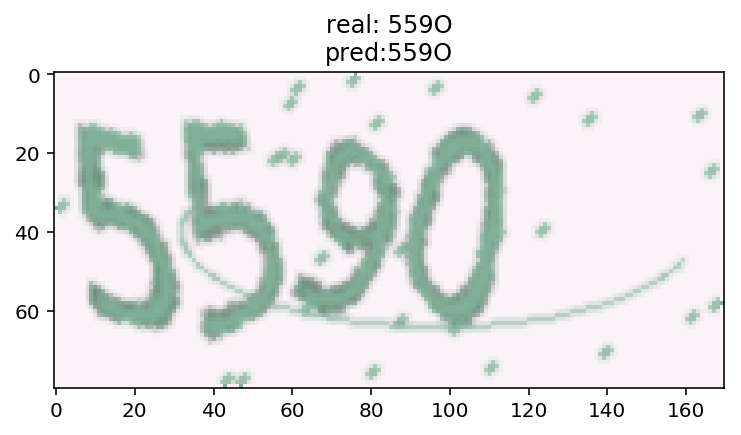

In [120]:
#check if it works
X,y = next(gen(1))
y_pred = model.predict(X, batch_size = None, verbose =0, steps = None)
plt.title('real: %s\npred:%s' %(decode(y), decode(y_pred)))
plt.imshow(X[0],cmap = 'gray')

In [135]:
#calculating accuracy of checking 10,000 images
correct = 0
for i in range(1,100000):
    X,y = next(gen(1))
    y_pred = model.predict(X, batch_size = None, verbose =0, steps = None)
    if str(decode(y)) != str(decode(y_pred)):
            correct += 0
    else:
            correct +=1
    

In [136]:
#accuarcy
correct/100000

0.9186